# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from functions import *

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

params2 = {'font.size': 12,
           'figure.figsize': (15.,6.),
           'axes.labelsize': 18,
           'xtick.labelsize': 18,
           'ytick.labelsize': 18
          }

params3 = {'font.size': 12,
           'figure.figsize': (15.,15.),
           'axes.labelsize': 18,
           'xtick.labelsize': 18,
           'ytick.labelsize': 18
          }

#palette = ['#66c2a5', '#fc8d62', '#8da0cb']
palette = ['#8856a7', '#1c9099', '#fec44f']
#palette_darker = ['#46af8e', '#fb6930', '#6a83bb']
palette_darker = ['#8856a7', '#1c9099', '#fec44f']
palette2 = ['#a6611a', '#018571']

In [3]:
plt.rcParams.update(params)
#plt.rcParams['text.usetex']=True

# Importing data

In [4]:
data_raw = pd.read_csv('../../Data/GALEXFUV_to_SPIRE500_VACs.csv')

In [5]:
# BPT diagrams
data_BPT1 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OI] 6300/Halpha)
data_BPT2 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['OIB_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([SII] 6716+6731/Halpha)
data_BPT3 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['SIIB_FLUX']>0) & 
                     (data_raw['SIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OII] 3726/Hbeta)
data_Stasinska1 = data_raw[(data_raw['HB_FLUX'] > 0) & 
                           (data_raw['OIIIR_FLUX'] > 0) & 
                           (data_raw['OIIB_FLUX'] > 0)]

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['HA_EW']>0)]

# Classification

In [6]:
# WHAN classification
SF = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) < -0.4) & (data_WHAN['HA_EW'] > 3)]
sAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 6)]
wAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 3) 
                 & (data_WHAN['HA_EW'] < 6)]

retired_and_passive = data_WHAN[(data_WHAN['HA_EW'] < 3)]
passive = data_WHAN[(data_WHAN['HA_EW'] < 0.5) & (data_WHAN['NIIR_EW'] < 0.5)]
retired = data_WHAN[((data_WHAN['HA_EW'] < 3) & (data_WHAN['NIIR_EW'] > 0.5)) | 
                    (data_WHAN['HA_EW'] < 3) & (data_WHAN['HA_EW'] > 0.5)]

orange_dots = data_WHAN[(data_WHAN['HA_EW'] < 0.5) | (data_WHAN['NIIR_EW'] < 0.5)]
unclassified = data_raw[(data_raw['HA_FLUX']<=0) |
                (data_raw['NIIR_FLUX']<=0) |
                (data_raw['HA_EW']<=0)]

print('WHAN classification')
print('Star forming:', len(SF))
print('Strong AGN:', len(sAGN))
print('Weak AGN:', len(wAGN))
print('Retired:', len(retired))
print('Passive:', len(passive))
print('Unclassified:', len(data_raw)-len(data_WHAN), " should be equal to ", len(unclassified))

WHAN classification
Star forming: 34209
Strong AGN: 22360
Weak AGN: 6115
Retired: 14435
Passive: 551
Unclassified: 41798  should be equal to  41798


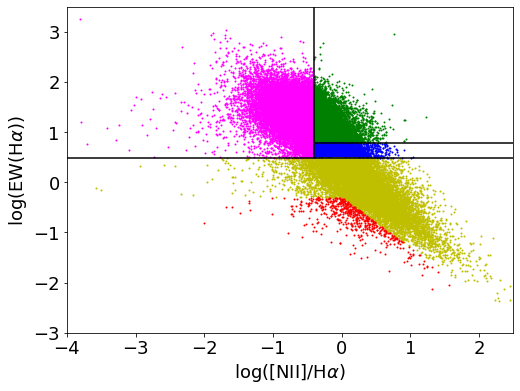

In [7]:
# checking WHAN classification
plt.plot(np.log10(SF['NIIR_FLUX']/SF['HA_FLUX']), np.log10(SF['HA_EW']), ls='', marker='o', markersize=1, 
         c='magenta')
plt.plot(np.log10(sAGN['NIIR_FLUX']/sAGN['HA_FLUX']), np.log10(sAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='g')
plt.plot(np.log10(wAGN['NIIR_FLUX']/wAGN['HA_FLUX']), np.log10(wAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='b')
plt.plot(np.log10(retired['NIIR_FLUX']/retired['HA_FLUX']), np.log10(retired['HA_EW']), ls='', marker='o', 
         markersize=1, c='y')
plt.plot(np.log10(passive['NIIR_FLUX']/passive['HA_FLUX']), np.log10(passive['HA_EW']), ls='', marker='o', 
         markersize=1, c='red')
#plt.plot(np.log10(orange_dots['NIIR_FLUX']/orange_dots['HA_FLUX']), np.log10(orange_dots['HA_EW']), ls='', 
#         marker='o', markersize=1, c='orange', alpha=0.2)

plt.axhline(np.log10(3), c='k')
plt.axhline(np.log10(6), xmin=0.555, xmax=1, c='k')
plt.axvline(-0.4, ymin=0.54, c='k')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

In [8]:
SF_class = {}
SF_class['CATAID'] = SF['CATAID'].values
SF_class['WHAN classification'] = 'SF'

SF_class_df = pd.DataFrame(SF_class)


sAGN_class = {}
sAGN_class['CATAID'] = sAGN['CATAID'].values
sAGN_class['WHAN classification'] = 'sAGN'

sAGN_class_df = pd.DataFrame(sAGN_class)


wAGN_class = {}
wAGN_class['CATAID'] = wAGN['CATAID'].values
wAGN_class['WHAN classification'] = 'wAGN'

wAGN_class_df = pd.DataFrame(wAGN_class)


retired_class = {}
retired_class['CATAID'] = retired['CATAID'].values
retired_class['WHAN classification'] = 'retired'

retired_class_df = pd.DataFrame(retired_class)


passive_class = {}
passive_class['CATAID'] = passive['CATAID'].values
passive_class['WHAN classification'] = 'passive'

passive_class_df = pd.DataFrame(passive_class)


unclassified_class = {}
unclassified_class['CATAID'] = unclassified['CATAID'].values
unclassified_class['WHAN classification'] = 'unclassified'

unclassified_class_df = pd.DataFrame(unclassified_class)


classification = pd.concat([SF_class_df, sAGN_class_df, wAGN_class_df, retired_class_df, passive_class_df, unclassified_class_df])
classification_sorted = classification.sort_values(by=['CATAID'])
classification_sorted

CATAID WHAN classification
3690     14283                sAGN
6791     14295        unclassified
5901     14296                  SF
1048     14300                wAGN
6810     14301        unclassified
...        ...                 ...
6114   3021557                wAGN
41794  3021558        unclassified
41795  3021559        unclassified
41797  3021560        unclassified
14434  3021561             retired

[119468 rows x 2 columns]

In [9]:
# BPT classification
sf = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
              (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 10)]
seyfert = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                   ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
liners = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                  ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
composite = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 0.4)]
unclassified_bpt = data_raw[(data_raw['HA_FLUX']<=0) | 
                            (data_raw['HB_FLUX']<=0) |
                            (data_raw['NIIR_FLUX']<=0) |
                            (data_raw['OIIIR_FLUX']<=0)]

print('BPT classification')
print('Star forming:', len(sf))
print('Seyfert:', len(seyfert))
print('LINERs:', len(liners))
print('Composite:', len(composite))
print('Unclassified:', len(data_raw)-len(data_BPT1), " should be equal to ", len(unclassified_bpt))

BPT classification
Star forming: 19324
Seyfert: 7269
LINERs: 2383
Composite: 26350
Unclassified: 64142  should be equal to  64142


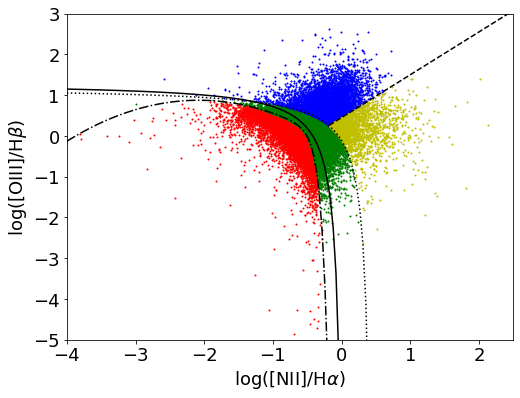

In [10]:
# checking BPT classification
plt.plot(np.log10(sf['NIIR_FLUX']/sf['HA_FLUX']), 
         np.log10(sf['OIIIR_FLUX']/sf['HB_FLUX']), ls='', marker='o', markersize=1, c='r')
plt.plot(np.log10(composite['NIIR_FLUX']/composite['HA_FLUX']), 
         np.log10(composite['OIIIR_FLUX']/composite['HB_FLUX']), ls='', marker='o', markersize=1, c='g')
plt.plot(np.log10(seyfert['NIIR_FLUX']/seyfert['HA_FLUX']), 
         np.log10(seyfert['OIIIR_FLUX']/seyfert['HB_FLUX']), ls='', marker='o', markersize=1, c='b')
plt.plot(np.log10(liners['NIIR_FLUX']/liners['HA_FLUX']), 
         np.log10(liners['OIIIR_FLUX']/liners['HB_FLUX']), ls='', marker='o', markersize=1, c='y')

xx1 = np.linspace(-4, 0.4, 100)
xx2 = np.linspace(-4, 0, 100)
xx3 = np.linspace(-4, 0, 100)
xx4 = np.linspace(-0.18, 2.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

In [11]:
sf_class = {}
sf_class['CATAID'] = sf['CATAID'].values
sf_class['BPT classification'] = 'SF'

sf_class_df = pd.DataFrame(sf_class)


seyfert_class = {}
seyfert_class['CATAID'] = seyfert['CATAID'].values
seyfert_class['BPT classification'] = 'seyfert'

seyfert_class_df = pd.DataFrame(seyfert_class)


liners_class = {}
liners_class['CATAID'] = liners['CATAID'].values
liners_class['BPT classification'] = 'LINERs'

liners_class_df = pd.DataFrame(liners_class)


composite_class = {}
composite_class['CATAID'] = composite['CATAID'].values
composite_class['BPT classification'] = 'composite'

composite_class_df = pd.DataFrame(composite_class)


unclassified_bpt_class = {}
unclassified_bpt_class['CATAID'] = unclassified_bpt['CATAID'].values
unclassified_bpt_class['BPT classification'] = 'unclassified'

unclassified_bpt_class_df = pd.DataFrame(unclassified_bpt_class)


classification_bpt = pd.concat([sf_class_df, seyfert_class_df, liners_class_df, composite_class_df, unclassified_bpt_class_df])
classification_bpt_sorted = classification_bpt.sort_values(by=['CATAID'])
classification_bpt_sorted

CATAID BPT classification
4387     14283          composite
10740    14295       unclassified
3222     14296                 SF
10763    14300       unclassified
10770    14301       unclassified
...        ...                ...
26349  3021557          composite
64137  3021558       unclassified
64138  3021559       unclassified
64140  3021560       unclassified
64141  3021561       unclassified

[119468 rows x 2 columns]

# UV classification

In [12]:
UV_class = data_raw[(data_raw['ABMagDFA_GALEXNUV'] > 0) & 
                    (data_raw['ABMagDFA_GALEXFUV'] > 0) & 
                    (data_raw['ABMagDFA_SDSSr'] > 0)]

RSF = UV_class[(UV_class['ABMagDFA_GALEXNUV']-UV_class['ABMagDFA_SDSSr'] < 5.4)]
UVweak = UV_class[(UV_class['ABMagDFA_GALEXNUV']-UV_class['ABMagDFA_SDSSr'] > 5.4) & 
                    ((UV_class['ABMagDFA_GALEXFUV']-UV_class['ABMagDFA_GALEXNUV'] > 0.9) | 
                    (UV_class['ABMagDFA_GALEXFUV']-UV_class['ABMagDFA_SDSSr'] > 6.6))]
UVupturn = UV_class[(UV_class['ABMagDFA_GALEXNUV']-UV_class['ABMagDFA_SDSSr'] > 5.4) & 
                    (UV_class['ABMagDFA_GALEXFUV']-UV_class['ABMagDFA_GALEXNUV'] < 0.9) & 
                    (UV_class['ABMagDFA_GALEXFUV']-UV_class['ABMagDFA_SDSSr'] < 6.6)]
UVuncl = data_raw[(data_raw['ABMagDFA_GALEXNUV'] < 0) | 
                  (data_raw['ABMagDFA_GALEXFUV'] < 0) | 
                  (data_raw['ABMagDFA_SDSSr'] < 0)]


print('UV classification')
print('RSF:', len(RSF))
print('UV weak:', len(UVweak))
print('UV upturn:', len(UVupturn))
print('UV unclassified:', len(data_raw)-len(UV_class), ' should be equal to', len(UVuncl))
print('UV classivied:', len(RSF)+len(UVweak)+len(UVupturn), '(number of rows in classified_dataset.csv)')

UV classification
RSF: 76380
UV weak: 2524
UV upturn: 10927
UV unclassified: 29637  should be equal to 29637
UV classivied: 89831 (number of rows in classified_dataset.csv)


Text(0, 0.5, 'NUV-FUV')

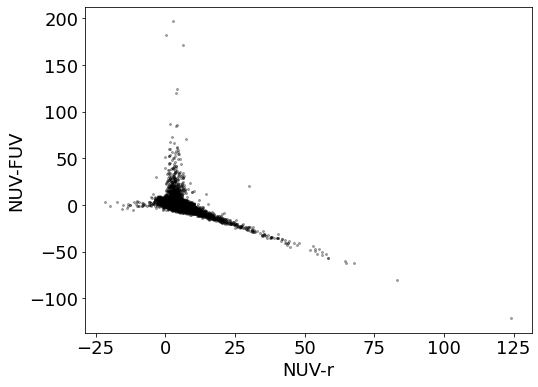

In [13]:
plt.plot(UV_class['ABMagDFA_GALEXNUV']-UV_class['ABMagDFA_SDSSr'], 
         UV_class['ABMagDFA_GALEXFUV']-UV_class['ABMagDFA_GALEXNUV'], 
         ls='', marker='o', markersize=2, c='k', alpha=0.3)

plt.xlabel('NUV-r')
plt.ylabel('NUV-FUV')

Text(0, 0.5, 'NUV-FUV')

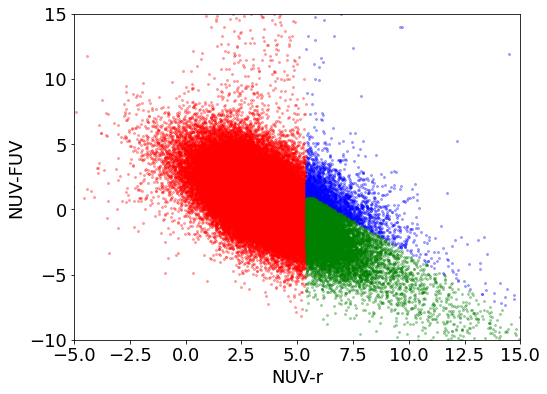

In [14]:
plt.plot(RSF['ABMagDFA_GALEXNUV']-RSF['ABMagDFA_SDSSr'], 
         RSF['ABMagDFA_GALEXFUV']-RSF['ABMagDFA_GALEXNUV'], 
         ls='', marker='o', markersize=2, c='r', alpha=0.3, label='RSF')
plt.plot(UVweak['ABMagDFA_GALEXNUV']-UVweak['ABMagDFA_SDSSr'], 
         UVweak['ABMagDFA_GALEXFUV']-UVweak['ABMagDFA_GALEXNUV'], 
         ls='', marker='o', markersize=2, c='b', alpha=0.3, label='UV weak')
plt.plot(UVupturn['ABMagDFA_GALEXNUV']-UVupturn['ABMagDFA_SDSSr'], 
         UVupturn['ABMagDFA_GALEXFUV']-UVupturn['ABMagDFA_GALEXNUV'], 
         ls='', marker='o', markersize=2, c='g', alpha=0.3, label='UV upturn')

plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel('NUV-r')
plt.ylabel('NUV-FUV')

In [15]:
RSF_class = {}
RSF_class['CATAID'] = RSF['CATAID'].values
RSF_class['UV classification'] = 'RSF'

RSF_class_df = pd.DataFrame(RSF_class)


UVweak_class = {}
UVweak_class['CATAID'] = UVweak['CATAID'].values
UVweak_class['UV classification'] = 'UV weak'

UVweak_class_df = pd.DataFrame(UVweak_class)


UVupturn_class = {}
UVupturn_class['CATAID'] = UVupturn['CATAID'].values
UVupturn_class['UV classification'] = 'UV upturn'

UVupturn_class_df = pd.DataFrame(UVupturn_class)


classification_UV = pd.concat([RSF_class_df, UVweak_class_df, UVupturn_class_df])
classification_UV_sorted = classification_UV.sort_values(by=['CATAID'])
classification_UV_sorted

CATAID UV classification
12207    14283               RSF
12232    14295               RSF
12241    14296               RSF
12267    14300               RSF
1931     14301         UV upturn
...        ...               ...
76374  3021552               RSF
76375  3021554               RSF
76376  3021556               RSF
76377  3021558               RSF
76379  3021561               RSF

[89831 rows x 2 columns]

In [16]:
final_classification = pd.merge(pd.merge(classification_sorted, classification_bpt_sorted, on='CATAID'), 
                                classification_UV_sorted, on='CATAID', how='right')
final_classification.to_csv('../../Data/classified_dataset.csv')

# Subsets with all the data

In [17]:
# NIIR OIIR
retired_NIIR_OIIR = retired[(retired['NIIR_FLUX'] > 0) & (retired['OIIR_FLUX'] > 0)]
passive_NIIR_OIIR = passive[(passive['NIIR_FLUX'] > 0) & (passive['OIIR_FLUX'] > 0)]
unclassified_NIIR_OIIR = unclassified[(unclassified['NIIR_FLUX'] > 0) & (unclassified['OIIR_FLUX'] > 0)]

# NIIR Halpha
NIIR_Ha_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['HA_FLUX'] > 0)]
NIIR_Ha_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['HA_FLUX'] > 0)]

# EW(OII 2326)
EW_OII_retired = retired[retired['OIIR_EW'] > 0]
EW_OII_passive = passive[passive['OIIR_EW'] > 0]

In [18]:
OIIIR_NIIR_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIR_NIIR_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIB_NIIR_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIB_NIIR_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIR_NIIR_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIR_NIIR_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIB_NIIR_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIB_NIIR_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIR_NIIR_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIR_NIIR_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIB_NIIR_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIB_NIIR_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

NIIB_NIIR_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
NIIB_NIIR_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIR_NIIR_retired = retired[(retired['SIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIR_NIIR_passive = passive[(passive['SIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIB_NIIR_retired = retired[(retired['SIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIB_NIIR_passive = passive[(passive['SIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIR_SII_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIR_SII_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIIB_SII_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIB_SII_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIR_SII_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIR_SII_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIB_SII_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIB_SII_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIR_SII_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIR_SII_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIB_SII_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIB_SII_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIR_SII_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIR_SII_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIB_SII_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIB_SII_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

# Subsets for UV upturn

In [19]:
classified_dataset = pd.merge(data_raw, final_classification, on='CATAID', how='right')
classified_dataset_UV = classified_dataset[(classified_dataset['UV classification'] == 'UV weak') | 
                                           (classified_dataset['UV classification'] == 'UV upturn')]

In [20]:
classified_dataset

LAMID   CATAID  DFAflux_GALEXFUV  DFAErr_GALEXFUV  \
0        14283    14283      4.959161e-06     5.106872e-07   
1        14295    14295      1.519702e-06     4.664399e-07   
2        14296    14296      2.564276e-06     4.848378e-07   
3        14300    14300      9.047083e-06     2.620990e-07   
4        14301    14301      3.783180e-06     4.420882e-07   
...        ...      ...               ...              ...   
89826  3021552  3021552      2.686798e-06     4.852861e-07   
89827  3021554  3021554      1.224447e-06     4.230899e-07   
89828  3021556  3021556      7.760184e-06     8.041947e-07   
89829  3021558  3021558      2.274809e-07     5.091504e-07   
89830  3021561  3021561      1.676689e-06     5.288210e-07   

       DeblendErr_GALEXFUV  ABMagDFA_GALEXFUV  ABMagErrDFA_GALEXFUV  \
0             5.621592e-08          22.161480              2.293512   
1             2.227008e-08          23.445604              5.061303   
2             1.941860e-08          22.877588              3.581608   
3             7.489817e-08          21.508728              1.828757   
4             3.998670e-08          22.455359              2.841986   
...                    ...                ...                   ...   
89826         7.675684e-08          22.826912              5.664395   
89827         2.948695e-08          23.680150              8.768570   
89828         1.216341e-07          21.675320              3.053431   
89829         2.018976e-08          25.507637             41.344063   
89830         2.600182e-08          23.338870              6.545708   

       MinApCorr_GALEXFUV  MaxApCorr_GALEXFUV PhotometryWarning_GALEXFUV  ...  \
0                1.303803            1.763267                        -    ...   
1                1.405684            1.867317                        -    ...   
2                1.300967            1.762854                        -    ...   
3                1.642948            2.071824                        -    ...   
4                1.286663            1.739219                        -    ...   
...                   ...                 ...                        ...  ...   
89826            1.399772            1.855544                        -    ...   
89827            1.433327            1.890142                        -    ...   
89828            1.179944            1.587543                        -    ...   
89829            1.246210            1.692332                        Q    ...   
89830            1.352022            1.807591                        -    ...   

       A_H_UKIDSS  A_K_UKIDSS  A_Z_VIKING  A_Y_VIKING  A_J_VIKING  A_H_VIKING  \
0         0.02121     0.01321     0.06275     0.04807     0.03405     0.02172   
1         0.01977     0.01231     0.05849     0.04481     0.03174     0.02025   
2         0.02135     0.01330     0.06317     0.04839     0.03428     0.02187   
3         0.01858     0.01157     0.05498     0.04212     0.02984     0.01903   
4         0.01766     0.01100     0.05225     0.04002     0.02835     0.01809   
...           ...         ...         ...         ...         ...         ...   
89826     0.02477     0.01543     0.07328     0.05614     0.03977     0.02537   
89827     0.02081     0.01296     0.06157     0.04717     0.03341     0.02131   
89828     0.02355     0.01467     0.06967     0.05337     0.03781     0.02412   
89829     0.01727     0.01076     0.05109     0.03914     0.02773     0.01769   
89830     0.01304     0.00812     0.03859     0.02956     0.02094     0.01336   

       A_K_VIKING  WHAN classification BPT classification  UV classification  
0         0.01424                 sAGN          composite                RSF  
1         0.01327         unclassified       unclassified                RSF  
2         0.01433                   SF                 SF                RSF  
3         0.01247                 wAGN       unclassified                RSF  
4         0.01185         unclassified       unclassified          UV 

In [21]:
UVup_retired = classified_dataset[(classified_dataset['UV classification'] == 'UV upturn') & 
                                  (classified_dataset['WHAN classification'] == 'retired')]
UVup_passive = classified_dataset[(classified_dataset['UV classification'] == 'UV upturn') & 
                                  (classified_dataset['WHAN classification'] == 'passive')]
UVup_unclassified = classified_dataset[(classified_dataset['UV classification'] == 'UV upturn') & 
                                       (classified_dataset['WHAN classification'] == 'unclassified')]

UVweak_retired = classified_dataset[(classified_dataset['UV classification'] == 'UV weak') & 
                                    (classified_dataset['WHAN classification'] == 'retired')]
UVweak_passive = classified_dataset[(classified_dataset['UV classification'] == 'UV weak') & 
                                    (classified_dataset['WHAN classification'] == 'passive')]
UVweak_unclassified = classified_dataset[(classified_dataset['UV classification'] == 'UV weak') & 
                                         (classified_dataset['WHAN classification'] == 'unclassified')]

In [22]:
UVup_BPT1r = UVup_retired[(UVup_retired['HA_FLUX']>0) &
                          (UVup_retired['HB_FLUX']>0) &
                          (UVup_retired['NIIR_FLUX']>0) &
                          (UVup_retired['OIIIR_FLUX']>0)]

UVup_BPT1p = UVup_passive[(UVup_passive['HA_FLUX']>0) &
                          (UVup_passive['HB_FLUX']>0) &
                          (UVup_passive['NIIR_FLUX']>0) &
                          (UVup_passive['OIIIR_FLUX']>0)]

UVup_BPT1u = UVup_unclassified[(UVup_unclassified['HA_FLUX']>0) &
                               (UVup_unclassified['HB_FLUX']>0) &
                               (UVup_unclassified['NIIR_FLUX']>0) &
                               (UVup_unclassified['OIIIR_FLUX']>0)]

UVup_BPT2r = UVup_retired[(UVup_retired['HA_FLUX']>0) &
                          (UVup_retired['HB_FLUX']>0) &
                          (UVup_retired['OIB_FLUX']>0) &
                          (UVup_retired['OIIIR_FLUX']>0)]

UVup_BPT2p = UVup_passive[(UVup_passive['HA_FLUX']>0) &
                          (UVup_passive['HB_FLUX']>0) &
                          (UVup_passive['OIB_FLUX']>0) &
                          (UVup_passive['OIIIR_FLUX']>0)]

UVup_BPT2u = UVup_unclassified[(UVup_unclassified['HA_FLUX']>0) &
                               (UVup_unclassified['HB_FLUX']>0) &
                               (UVup_unclassified['OIB_FLUX']>0) &
                               (UVup_unclassified['OIIIR_FLUX']>0)]

UVup_BPT3r = UVup_retired[(UVup_retired['HA_FLUX']>0) &
                          (UVup_retired['HB_FLUX']>0) &
                          (UVup_retired['SIIB_FLUX']>0) & 
                          (UVup_retired['SIIR_FLUX']>0) &
                          (UVup_retired['OIIIR_FLUX']>0)]

UVup_BPT3p = UVup_passive[(UVup_passive['HA_FLUX']>0) &
                          (UVup_passive['HB_FLUX']>0) &
                          (UVup_passive['SIIB_FLUX']>0) & 
                          (UVup_passive['SIIR_FLUX']>0) &
                          (UVup_passive['OIIIR_FLUX']>0)]

UVup_BPT3u = UVup_unclassified[(UVup_unclassified['HA_FLUX']>0) &
                               (UVup_unclassified['HB_FLUX']>0) &
                               (UVup_unclassified['SIIB_FLUX']>0) & 
                               (UVup_unclassified['SIIR_FLUX']>0) &
                               (UVup_unclassified['OIIIR_FLUX']>0)]

UVup_Stasinska1r = UVup_retired[(UVup_retired['HB_FLUX'] > 0) & 
                                (UVup_retired['OIIIR_FLUX'] > 0) & 
                                (UVup_retired['OIIB_FLUX'] > 0)]

UVup_Stasinska1p = UVup_passive[(UVup_passive['HB_FLUX'] > 0) & 
                                (UVup_passive['OIIIR_FLUX'] > 0) & 
                                (UVup_passive['OIIB_FLUX'] > 0)]

UVup_Stasinska1u = UVup_unclassified[(UVup_unclassified['HB_FLUX'] > 0) & 
                                     (UVup_unclassified['OIIIR_FLUX'] > 0) & 
                                     (UVup_unclassified['OIIB_FLUX'] > 0)]

In [23]:
# NIIR OIIR
UVup_retired_NIIR_OIIR = UVup_retired[(UVup_retired['NIIR_FLUX'] > 0) & (UVup_retired['OIIR_FLUX'] > 0)]
UVup_passive_NIIR_OIIR = UVup_passive[(UVup_passive['NIIR_FLUX'] > 0) & (UVup_passive['OIIR_FLUX'] > 0)]
UVup_unclassified_NIIR_OIIR = UVup_unclassified[(UVup_unclassified['NIIR_FLUX'] > 0) & 
                                                (UVup_unclassified['OIIR_FLUX'] > 0)]

# NIIR Halpha
UVup_NIIR_Ha_retired = UVup_retired[(UVup_retired['NIIR_FLUX'] > 0) & (UVup_retired['HA_FLUX'] > 0)]
UVup_NIIR_Ha_passive = UVup_passive[(UVup_passive['NIIR_FLUX'] > 0) & (UVup_passive['HA_FLUX'] > 0)]

# EW(OII 2326)
UVup_EW_OII_retired = UVup_retired[UVup_retired['OIIR_EW'] > 0]
UVup_EW_OII_passive = UVup_passive[UVup_passive['OIIR_EW'] > 0]

In [24]:
UVup_OIIIR_NIIR_retired = UVup_retired[(UVup_retired['OIIIR_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIIIR_NIIR_passive = UVup_passive[(UVup_passive['OIIIR_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIIIB_NIIR_retired = UVup_retired[(UVup_retired['OIIIB_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIIIB_NIIR_passive = UVup_passive[(UVup_passive['OIIIB_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIIR_NIIR_retired = UVup_retired[(UVup_retired['OIIR_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIIR_NIIR_passive = UVup_passive[(UVup_passive['OIIR_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIIB_NIIR_retired = UVup_retired[(UVup_retired['OIIB_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIIB_NIIR_passive = UVup_passive[(UVup_passive['OIIB_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIR_NIIR_retired = UVup_retired[(UVup_retired['OIR_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIR_NIIR_passive = UVup_passive[(UVup_passive['OIR_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIB_NIIR_retired = UVup_retired[(UVup_retired['OIB_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_OIB_NIIR_passive = UVup_passive[(UVup_passive['OIB_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_NIIB_NIIR_retired = UVup_retired[(UVup_retired['NIIB_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_NIIB_NIIR_passive = UVup_passive[(UVup_passive['NIIB_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_SIIR_NIIR_retired = UVup_retired[(UVup_retired['SIIR_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_SIIR_NIIR_passive = UVup_passive[(UVup_passive['SIIR_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_SIIB_NIIR_retired = UVup_retired[(UVup_retired['SIIB_FLUX'] > 0) & (UVup_retired['NIIR_FLUX'] > 0)]
UVup_SIIB_NIIR_passive = UVup_passive[(UVup_passive['SIIB_FLUX'] > 0) & (UVup_passive['NIIR_FLUX'] > 0)]

UVup_OIIIR_SII_retired = UVup_retired[(UVup_retired['OIIIR_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                      (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIIIR_SII_passive = UVup_passive[(UVup_passive['OIIIR_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                      (UVup_passive['SIIB_FLUX'] > 0)]

UVup_OIIIB_SII_retired = UVup_retired[(UVup_retired['OIIIB_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                      (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIIIB_SII_passive = UVup_passive[(UVup_passive['OIIIB_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                      (UVup_passive['SIIB_FLUX'] > 0)]

UVup_OIIR_SII_retired = UVup_retired[(UVup_retired['OIIR_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                     (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIIR_SII_passive = UVup_passive[(UVup_passive['OIIR_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                     (UVup_passive['SIIB_FLUX'] > 0)]

UVup_OIIB_SII_retired = UVup_retired[(UVup_retired['OIIB_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                     (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIIB_SII_passive = UVup_passive[(UVup_passive['OIIB_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                     (UVup_passive['SIIB_FLUX'] > 0)]

UVup_OIR_SII_retired = UVup_retired[(UVup_retired['OIR_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                    (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIR_SII_passive = UVup_passive[(UVup_passive['OIR_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                    (UVup_passive['SIIB_FLUX'] > 0)]

UVup_OIB_SII_retired = UVup_retired[(UVup_retired['OIB_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                    (UVup_retired['SIIB_FLUX'] > 0)]
UVup_OIB_SII_passive = UVup_passive[(UVup_passive['OIB_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                    (UVup_passive['SIIB_FLUX'] > 0)]

UVup_NIIR_SII_retired = UVup_retired[(UVup_retired['NIIR_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                     (UVup_retired['SIIB_FLUX'] > 0)]
UVup_NIIR_SII_passive = UVup_passive[(UVup_passive['NIIR_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                     (UVup_passive['SIIB_FLUX'] > 0)]

UVup_NIIB_SII_retired = UVup_retired[(UVup_retired['NIIB_FLUX'] > 0) & (UVup_retired['SIIR_FLUX'] > 0) & 
                                     (UVup_retired['SIIB_FLUX'] > 0)]
UVup_NIIB_SII_passive = UVup_passive[(UVup_passive['NIIB_FLUX'] > 0) & (UVup_passive['SIIR_FLUX'] > 0) & 
                                     (UVup_passive['SIIB_FLUX'] > 0)]

# More subsets

In [25]:
bins = np.arange(8, 12., 0.5)
retired.reset_index()
passive.reset_index()
unclassified.reset_index()

# A_FUV
A_FUV_025r = []
A_FUV_25r = []
A_FUV_50r = []
A_FUV_75r = []
A_FUV_975r = []
mass_50r = []

A_FUV_025p = []
A_FUV_25p = []
A_FUV_50p = []
A_FUV_75p = []
A_FUV_975p = []
mass_50p = []

A_FUV_025u = []
A_FUV_25u = []
A_FUV_50u = []
A_FUV_75u = []
A_FUV_975u = []
mass_50u = []

# A_NUV
A_NUV_025r = []
A_NUV_25r = []
A_NUV_50r = []
A_NUV_75r = []
A_NUV_975r = []

A_NUV_025p = []
A_NUV_25p = []
A_NUV_50p = []
A_NUV_75p = []
A_NUV_975p = []

A_NUV_025u = []
A_NUV_25u = []
A_NUV_50u = []
A_NUV_75u = []
A_NUV_975u = []

# A_r
A_r_025r = []
A_r_25r = []
A_r_50r = []
A_r_75r = []
A_r_975r = []

A_r_025p = []
A_r_25p = []
A_r_50p = []
A_r_75p = []
A_r_975p = []

A_r_025u = []
A_r_25u = []
A_r_50u = []
A_r_75u = []
A_r_975u = []

# A_KU
A_KU_025r = []
A_KU_25r = []
A_KU_50r = []
A_KU_75r = []
A_KU_975r = []

A_KU_025p = []
A_KU_25p = []
A_KU_50p = []
A_KU_75p = []
A_KU_975p = []

A_KU_025u = []
A_KU_25u = []
A_KU_50u = []
A_KU_75u = []
A_KU_975u = []

# A_KV
A_KV_025r = []
A_KV_25r = []
A_KV_50r = []
A_KV_75r = []
A_KV_975r = []

A_KV_025p = []
A_KV_25p = []
A_KV_50p = []
A_KV_75p = []
A_KV_975p = []

A_KV_025u = []
A_KV_25u = []
A_KV_50u = []
A_KV_75u = []
A_KV_975u = []

# A_HV
A_HV_025r = []
A_HV_25r = []
A_HV_50r = []
A_HV_75r = []
A_HV_975r = []

A_HV_025p = []
A_HV_25p = []
A_HV_50p = []
A_HV_75p = []
A_HV_975p = []

A_HV_025u = []
A_HV_25u = []
A_HV_50u = []
A_HV_75u = []
A_HV_975u = []

# A_JV
A_JV_025r = []
A_JV_25r = []
A_JV_50r = []
A_JV_75r = []
A_JV_975r = []

A_JV_025p = []
A_JV_25p = []
A_JV_50p = []
A_JV_75p = []
A_JV_975p = []

A_JV_025u = []
A_JV_25u = []
A_JV_50u = []
A_JV_75u = []
A_JV_975u = []

# A_YV
A_YV_025r = []
A_YV_25r = []
A_YV_50r = []
A_YV_75r = []
A_YV_975r = []

A_YV_025p = []
A_YV_25p = []
A_YV_50p = []
A_YV_75p = []
A_YV_975p = []

A_YV_025u = []
A_YV_25u = []
A_YV_50u = []
A_YV_75u = []
A_YV_975u = []

# A_ZV
A_ZV_025r = []
A_ZV_25r = []
A_ZV_50r = []
A_ZV_75r = []
A_ZV_975r = []

A_ZV_025p = []
A_ZV_25p = []
A_ZV_50p = []
A_ZV_75p = []
A_ZV_975p = []

A_ZV_025u = []
A_ZV_25u = []
A_ZV_50u = []
A_ZV_75u = []
A_ZV_975u = []

# W_3-W_2
retiredW = retired[(retired['ABMagDFA_WISEW3'] > 0) & (retired['ABMagDFA_WISEW2'] > 0)]
retiredW.reset_index()
passiveW = passive[(passive['ABMagDFA_WISEW3'] > 0) & (passive['ABMagDFA_WISEW2'] > 0)]
passiveW.reset_index()
unclassifiedW = unclassified[(unclassified['ABMagDFA_WISEW3'] > 0) & (unclassified['ABMagDFA_WISEW2'] > 0)]
unclassifiedW.reset_index()

UVup_retiredW = UVup_retired[(UVup_retired['ABMagDFA_WISEW3'] > 0) & (UVup_retired['ABMagDFA_WISEW2'] > 0)]
UVup_retiredW.reset_index()
UVup_passiveW = UVup_passive[(UVup_passive['ABMagDFA_WISEW3'] > 0) & (UVup_passive['ABMagDFA_WISEW2'] > 0)]
UVup_passiveW.reset_index()
UVup_unclassifiedW = UVup_unclassified[(UVup_unclassified['ABMagDFA_WISEW3'] > 0) & 
                                       (UVup_unclassified['ABMagDFA_WISEW2'] > 0)]
UVup_unclassifiedW.reset_index()

UVweak_retiredW = UVweak_retired[(UVweak_retired['ABMagDFA_WISEW3'] > 0) & (UVweak_retired['ABMagDFA_WISEW2'] > 0)]
UVweak_retiredW.reset_index()
UVweak_passiveW = UVweak_passive[(UVweak_passive['ABMagDFA_WISEW3'] > 0) & (UVweak_passive['ABMagDFA_WISEW2'] > 0)]
UVweak_passiveW.reset_index()
UVweak_unclassifiedW = UVweak_unclassified[(UVweak_unclassified['ABMagDFA_WISEW3'] > 0) & 
                                       (UVweak_unclassified['ABMagDFA_WISEW2'] > 0)]
UVweak_unclassifiedW.reset_index()

W3W2_025r = []
W3W2_25r = []
W3W2_50r = []
W3W2_75r = []
W3W2_975r = []
massW_50r = []

W3W2_025p = []
W3W2_25p = []
W3W2_50p = []
W3W2_75p = []
W3W2_975p = []
massW_50p = []

W3W2_025u = []
W3W2_25u = []
W3W2_50u = []
W3W2_75u = []
W3W2_975u = []
massW_50u = []

# NUV-r
retiredN = retired[(retired['ABMagDFA_GALEXNUV'] > 0) & (retired['ABMagDFA_SDSSr'] > 0)]
retiredN.reset_index()
passiveN = passive[(passive['ABMagDFA_GALEXNUV'] > 0) & (passive['ABMagDFA_SDSSr'] > 0)]
passiveN.reset_index()
unclassifiedN = unclassified[(unclassified['ABMagDFA_GALEXNUV'] > 0) & (unclassified['ABMagDFA_SDSSr'] > 0)]
unclassifiedN.reset_index()

UVup_retiredN = UVup_retired[(UVup_retired['ABMagDFA_GALEXNUV'] > 0) & (UVup_retired['ABMagDFA_SDSSr'] > 0)]
UVup_retiredN.reset_index()
UVup_passiveN = UVup_passive[(UVup_passive['ABMagDFA_GALEXNUV'] > 0) & (UVup_passive['ABMagDFA_SDSSr'] > 0)]
UVup_passiveN.reset_index()
UVup_unclassifiedN = UVup_unclassified[(UVup_unclassified['ABMagDFA_GALEXNUV'] > 0) & 
                                       (UVup_unclassified['ABMagDFA_SDSSr'] > 0)]
UVup_unclassifiedN.reset_index()

NUVr_025r = []
NUVr_25r = []
NUVr_50r = []
NUVr_75r = []
NUVr_975r = []
massN_50r = []

NUVr_025p = []
NUVr_25p = []
NUVr_50p = []
NUVr_75p = []
NUVr_975p = []
massN_50p = []

NUVr_025u = []
NUVr_25u = []
NUVr_50u = []
NUVr_75u = []
NUVr_975u = []
massN_50u = []

# Z/Z_sun
Z_025r = []
Z_25r = []
Z_50r = []
Z_75r = []
Z_975r = []

Z_025p = []
Z_25p = []
Z_50p = []
Z_75p = []
Z_975p = []

Z_025u = []
Z_25u = []
Z_50u = []
Z_75u = []
Z_975u = []

# Dn4000
retiredD = retired[(retired['D4000N'] > 0)]
retiredD.reset_index()
passiveD = passive[(passive['D4000N'] > 0)]
passiveD.reset_index()
unclassifiedD = unclassified[(unclassified['D4000N'] > 0)]
unclassifiedD.reset_index()

UVup_retiredD = UVup_retired[(UVup_retired['D4000N'] > 0)]
UVup_retiredD.reset_index()
UVup_passiveD = UVup_passive[(UVup_passive['D4000N'] > 0)]
UVup_passiveD.reset_index()
UVup_unclassifiedD = UVup_unclassified[(UVup_unclassified['D4000N'] > 0)]
UVup_unclassifiedD.reset_index()

Dn4000_025r = []
Dn4000_25r = []
Dn4000_50r = []
Dn4000_75r = []
Dn4000_975r = []
massD_50r = []

Dn4000_025p = []
Dn4000_25p = []
Dn4000_50p = []
Dn4000_75p = []
Dn4000_975p = []
massD_50p = []

Dn4000_025u = []
Dn4000_25u = []
Dn4000_50u = []
Dn4000_75u = []
Dn4000_975u = []
massD_50u = []

# dust mass
dust_025r = []
dust_25r = []
dust_50r = []
dust_75r = []
dust_975r = []

dust_025p = []
dust_25p = []
dust_50p = []
dust_75p = []
dust_975p = []

dust_025u = []
dust_25u = []
dust_50u = []
dust_75u = []
dust_975u = []

In [26]:
for i in bins:
    # A_FUV
    A_FUVr = []
    mass_r = []
    
    A_FUVu = []
    mass_u = []
    
    # A_NUV
    A_NUVr = []
    A_NUVu = []
    
    # A_r
    A_rr = []
    A_ru = []
    
    # A_KU
    A_KUr = []
    A_KUu = []
    
    # A_KV
    A_KVr = []
    A_KVu = []
    
    # A_HV
    A_HVr = []
    A_HVu = []
    
    # A_JV
    A_JVr = []
    A_JVu = []
    
    # A_YV
    A_YVr = []
    A_YVu = []
    
    # A_ZV
    A_ZVr = []
    A_ZVu = []
    
    # W3-W2
    W3W2r = []
    W3W2u = []
    massW_r = []
    massW_u = []
    
    # NUV-r
    NUVrr = []
    NUVru = []
    massN_r = []
    massN_u = []
    
    # Z/Z_sun
    Zr = []
    Zu = []
    
    # Dn4000
    Dn4000r = []
    Dn4000u = []
    massD_r = []
    massD_u = []
    
    # dust mass
    dust_r = []
    dust_u = []
    
    for j in range(0, len(retired)):
        if (retired['mass_stellar_best_fit'][retired.index[j]] > 10**i) & (retired['mass_stellar_best_fit'][retired.index[j]] <= 10**(i+0.5)):
            A_FUVr.append(retired['A_FUV'][retired.index[j]])
            mass_r.append(retired['mass_stellar_best_fit'][retired.index[j]])
            
            A_NUVr.append(retired['A_NUV'][retired.index[j]])
            A_rr.append(retired['A_r'][retired.index[j]])
            A_KUr.append(retired['A_K_UKIDSS'][retired.index[j]])
            A_KVr.append(retired['A_K_VIKING'][retired.index[j]])
            A_HVr.append(retired['A_H_VIKING'][retired.index[j]])
            A_JVr.append(retired['A_J_VIKING'][retired.index[j]])
            A_YVr.append(retired['A_Y_VIKING'][retired.index[j]])
            A_ZVr.append(retired['A_Z_VIKING'][retired.index[j]])
            Zr.append(retired['metalicity_Z_Zo_percentile50'][retired.index[j]])
            dust_r.append(retired['mass_dust_best_fit'][retired.index[j]])
        
    for j in range(0, len(retiredW)):
        if (retiredW['mass_stellar_best_fit'][retiredW.index[j]] > 10**i) & (retiredW['mass_stellar_best_fit'][retiredW.index[j]] <= 10**(i+0.5)):
            W3W2r.append(retiredW['ABMagDFA_WISEW3'][retiredW.index[j]]-retiredW['ABMagDFA_WISEW2'][retiredW.index[j]])
            massW_r.append(retiredW['mass_stellar_best_fit'][retiredW.index[j]])
            
    for j in range(0, len(retiredN)):
        if (retiredN['mass_stellar_best_fit'][retiredN.index[j]] > 10**i) & (retiredN['mass_stellar_best_fit'][retiredN.index[j]] <= 10**(i+0.5)):
            NUVrr.append(retiredN['ABMagDFA_GALEXNUV'][retiredN.index[j]]-retiredN['ABMagDFA_SDSSr'][retiredN.index[j]])
            massN_r.append(retiredN['mass_stellar_best_fit'][retiredN.index[j]])
            
    for j in range(0, len(retiredD)):
        if (retiredD['mass_stellar_best_fit'][retiredD.index[j]] > 10**i) & (retiredD['mass_stellar_best_fit'][retiredD.index[j]] <= 10**(i+0.5)):
            Dn4000r.append(retiredD['D4000N'][retiredD.index[j]])
            massD_r.append(retiredD['mass_stellar_best_fit'][retiredD.index[j]])
            
    A_FUVr_df = pd.DataFrame(A_FUVr)
    A_FUV_025r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    mass_r_df = pd.DataFrame(mass_r)
    mass_50r.append(mass_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVr_df = pd.DataFrame(A_NUVr)
    A_NUV_025r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_rr_df = pd.DataFrame(A_rr)
    A_r_025r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUr_df = pd.DataFrame(A_KUr)
    A_KU_025r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVr_df = pd.DataFrame(A_KVr)
    A_KV_025r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_HVr_df = pd.DataFrame(A_HVr)
    A_HV_025r.append(A_HVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_HV_25r.append(A_HVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_HV_50r.append(A_HVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_HV_75r.append(A_HVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_HV_975r.append(A_HVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_JVr_df = pd.DataFrame(A_JVr)
    A_JV_025r.append(A_JVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_JV_25r.append(A_JVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_JV_50r.append(A_JVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_JV_75r.append(A_JVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_JV_975r.append(A_JVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_YVr_df = pd.DataFrame(A_YVr)
    A_YV_025r.append(A_YVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_YV_25r.append(A_YVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_YV_50r.append(A_YVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_YV_75r.append(A_YVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_YV_975r.append(A_YVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_ZVr_df = pd.DataFrame(A_ZVr)
    A_ZV_025r.append(A_ZVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_ZV_25r.append(A_ZVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_ZV_50r.append(A_ZVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_ZV_75r.append(A_ZVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_ZV_975r.append(A_ZVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2r_df = pd.DataFrame(W3W2r)
    W3W2_025r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_r_df = pd.DataFrame(massW_r)
    massW_50r.append(massW_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVrr_df = pd.DataFrame(NUVrr)
    NUVr_025r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_r_df = pd.DataFrame(massN_r)
    massN_50r.append(massN_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zr_df = pd.DataFrame(Zr)
    Z_025r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000r_df = pd.DataFrame(Dn4000r)
    Dn4000_025r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_r_df = pd.DataFrame(massD_r)
    massD_50r.append(massD_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    dust_r_df = pd.DataFrame(dust_r)
    dust_025r.append(dust_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    dust_25r.append(dust_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    dust_50r.append(dust_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    dust_75r.append(dust_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    dust_975r.append(dust_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    for j in range(0, len(unclassified)):
        if (unclassified['mass_stellar_best_fit'][unclassified.index[j]] > 10**i) & (unclassified['mass_stellar_best_fit'][unclassified.index[j]] <= 10**(i+0.5)):
            A_FUVu.append(unclassified['A_FUV'][unclassified.index[j]])
            mass_u.append(unclassified['mass_stellar_best_fit'][unclassified.index[j]])
            
            A_NUVu.append(unclassified['A_NUV'][unclassified.index[j]])
            A_ru.append(unclassified['A_r'][unclassified.index[j]])
            A_KUu.append(unclassified['A_K_UKIDSS'][unclassified.index[j]])
            A_KVu.append(unclassified['A_K_VIKING'][unclassified.index[j]])
            A_HVu.append(unclassified['A_H_VIKING'][unclassified.index[j]])
            A_JVu.append(unclassified['A_J_VIKING'][unclassified.index[j]])
            A_YVu.append(unclassified['A_Y_VIKING'][unclassified.index[j]])
            A_ZVu.append(unclassified['A_Z_VIKING'][unclassified.index[j]])
            Zu.append(unclassified['metalicity_Z_Zo_percentile50'][unclassified.index[j]])
            dust_u.append(unclassified['mass_dust_best_fit'][unclassified.index[j]])
            
    for j in range(0, len(unclassifiedW)):
        if (unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]] > 10**i) & (unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]] <= 10**(i+0.5)):
            W3W2u.append(unclassifiedW['ABMagDFA_WISEW3'][unclassifiedW.index[j]]-unclassifiedW['ABMagDFA_WISEW2'][unclassifiedW.index[j]])
            massW_u.append(unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]])
            
    for j in range(0, len(unclassifiedN)):
        if (unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]] > 10**i) & (unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]] <= 10**(i+0.5)):
            NUVru.append(unclassifiedN['ABMagDFA_GALEXNUV'][unclassifiedN.index[j]]-unclassifiedN['ABMagDFA_SDSSr'][unclassifiedN.index[j]])
            massN_u.append(unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]])
    
    for j in range(0, len(unclassifiedD)):
        if (unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]] > 10**i) & (unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]] <= 10**(i+0.5)):
            Dn4000u.append(unclassifiedD['D4000N'][unclassifiedD.index[j]])
            massD_u.append(unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]])
    
    A_FUVu_df = pd.DataFrame(A_FUVu)
    A_FUV_025u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    mass_u_df = pd.DataFrame(mass_u)
    mass_50u.append(mass_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVu_df = pd.DataFrame(A_NUVu)
    A_NUV_025u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_ru_df = pd.DataFrame(A_ru)
    A_r_025u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUu_df = pd.DataFrame(A_KUu)
    A_KU_025u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVu_df = pd.DataFrame(A_KVu)
    A_KV_025u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_HVu_df = pd.DataFrame(A_HVu)
    A_HV_025u.append(A_HVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_HV_25u.append(A_HVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_HV_50u.append(A_HVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_HV_75u.append(A_HVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_HV_975u.append(A_HVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_JVu_df = pd.DataFrame(A_JVu)
    A_JV_025u.append(A_JVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_JV_25u.append(A_JVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_JV_50u.append(A_JVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_JV_75u.append(A_JVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_JV_975u.append(A_JVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_YVu_df = pd.DataFrame(A_YVu)
    A_YV_025u.append(A_YVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_YV_25u.append(A_YVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_YV_50u.append(A_YVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_YV_75u.append(A_YVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_YV_975u.append(A_YVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_ZVu_df = pd.DataFrame(A_ZVu)
    A_ZV_025u.append(A_ZVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_ZV_25u.append(A_ZVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_ZV_50u.append(A_ZVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_ZV_75u.append(A_ZVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_ZV_975u.append(A_ZVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2u_df = pd.DataFrame(W3W2u)
    W3W2_025u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_u_df = pd.DataFrame(massW_u)
    massW_50u.append(massW_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVru_df = pd.DataFrame(NUVru)
    NUVr_025u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_u_df = pd.DataFrame(massN_u)
    massN_50u.append(massN_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zu_df = pd.DataFrame(Zu)
    Z_025u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000u_df = pd.DataFrame(Dn4000u)
    Dn4000_025u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_u_df = pd.DataFrame(massD_u)
    massD_50u.append(massD_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    dust_u_df = pd.DataFrame(dust_u)
    dust_025u.append(dust_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    dust_25u.append(dust_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    dust_50u.append(dust_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    dust_75u.append(dust_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    dust_975u.append(dust_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    

bins = np.arange(9, 12., 0.5)
for i in bins:
    # A_FUV
    A_FUVp = []
    mass_p = []
    
    # A_NUV
    A_NUVp = []
    
    # A_r
    A_rp = []
    
    # A_KU
    A_KUp = []
    
    # A_KV
    A_KVp = []
    
    # A_HV
    A_HVp = []
    
    # A_JV
    A_JVp = []
    
    # A_YV
    A_YVp = []
    
    # A_ZV
    A_ZVp = []
    
    # W3-W2
    W3W2p = []
    massW_p = []
    
    # NUV-r
    NUVrp = []
    massN_p = []
    
    # Z/Z_sun
    Zp = []
    
    # Dn4000
    Dn4000p = []
    massD_p = []
    
    # dust mass
    dust_p = []
    
    for j in range(0, len(passive)):
        if (passive['mass_stellar_best_fit'][passive.index[j]] > 10**i) & (passive['mass_stellar_best_fit'][passive.index[j]] <= 10**(i+0.5)):
            A_FUVp.append(passive['A_FUV'][passive.index[j]])
            mass_p.append(passive['mass_stellar_best_fit'][passive.index[j]])
            
            A_NUVp.append(passive['A_NUV'][passive.index[j]])
            A_rp.append(passive['A_r'][passive.index[j]])
            A_KUp.append(passive['A_K_UKIDSS'][passive.index[j]])
            A_KVp.append(passive['A_K_VIKING'][passive.index[j]])
            A_HVp.append(passive['A_H_VIKING'][passive.index[j]])
            A_JVp.append(passive['A_J_VIKING'][passive.index[j]])
            A_YVp.append(passive['A_Y_VIKING'][passive.index[j]])
            A_ZVp.append(passive['A_Z_VIKING'][passive.index[j]])
            Zp.append(passive['metalicity_Z_Zo_percentile50'][passive.index[j]])
            dust_p.append(passive['mass_dust_best_fit'][passive.index[j]])
            
    for j in range(0, len(passiveW)):
        if (passiveW['mass_stellar_best_fit'][passiveW.index[j]] > 10**i) & (passiveW['mass_stellar_best_fit'][passiveW.index[j]] <= 10**(i+0.5)):
            W3W2p.append(passiveW['ABMagDFA_WISEW3'][passiveW.index[j]]-passiveW['ABMagDFA_WISEW2'][passiveW.index[j]])
            massW_p.append(passiveW['mass_stellar_best_fit'][passiveW.index[j]])
            
    for j in range(0, len(passiveN)):
        if (passiveN['mass_stellar_best_fit'][passiveN.index[j]] > 10**i) & (passiveN['mass_stellar_best_fit'][passiveN.index[j]] <= 10**(i+0.5)):
            NUVrp.append(passiveN['ABMagDFA_GALEXNUV'][passiveN.index[j]]-passiveN['ABMagDFA_SDSSr'][passiveN.index[j]])
            massN_p.append(passiveN['mass_stellar_best_fit'][passiveN.index[j]])
    
    for j in range(0, len(passiveD)):
        if (passiveD['mass_stellar_best_fit'][passiveD.index[j]] > 10**i) & (passiveD['mass_stellar_best_fit'][passiveD.index[j]] <= 10**(i+0.5)):
            Dn4000p.append(passiveD['D4000N'][passiveD.index[j]])
            massD_p.append(passiveD['mass_stellar_best_fit'][passiveD.index[j]])
    
    A_FUVp_df = pd.DataFrame(A_FUVp)
    A_FUV_025p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])

    mass_p_df = pd.DataFrame(mass_p)
    mass_50p.append(mass_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVp_df = pd.DataFrame(A_NUVp)
    A_NUV_025p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_rp_df = pd.DataFrame(A_rp)
    A_r_025p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUp_df = pd.DataFrame(A_KUp)
    A_KU_025p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVp_df = pd.DataFrame(A_KVp)
    A_KV_025p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_HVp_df = pd.DataFrame(A_HVp)
    A_HV_025p.append(A_HVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_HV_25p.append(A_HVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_HV_50p.append(A_HVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_HV_75p.append(A_HVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_HV_975p.append(A_HVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_JVp_df = pd.DataFrame(A_JVp)
    A_JV_025p.append(A_JVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_JV_25p.append(A_JVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_JV_50p.append(A_JVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_JV_75p.append(A_JVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_JV_975p.append(A_JVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_YVp_df = pd.DataFrame(A_YVp)
    A_YV_025p.append(A_YVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_YV_25p.append(A_YVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_YV_50p.append(A_YVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_YV_75p.append(A_YVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_YV_975p.append(A_YVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_ZVp_df = pd.DataFrame(A_ZVp)
    A_ZV_025p.append(A_ZVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_ZV_25p.append(A_ZVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_ZV_50p.append(A_ZVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_ZV_75p.append(A_ZVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_ZV_975p.append(A_ZVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2p_df = pd.DataFrame(W3W2p)
    W3W2_025p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_p_df = pd.DataFrame(massW_p)
    massW_50p.append(massW_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVrp_df = pd.DataFrame(NUVrp)
    NUVr_025p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_p_df = pd.DataFrame(massN_p)
    massN_50p.append(massN_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zp_df = pd.DataFrame(Zp)
    Z_025p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000p_df = pd.DataFrame(Dn4000p)
    Dn4000_025p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_p_df = pd.DataFrame(massD_p)
    massD_50p.append(massD_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    dust_p_df = pd.DataFrame(dust_p)
    dust_025p.append(dust_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    dust_25p.append(dust_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    dust_50p.append(dust_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    dust_75p.append(dust_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    dust_975p.append(dust_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])

# BPT diagram

In [27]:
plt.rcParams.update(params2)

In [28]:
x1 = data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']
y1 = data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']

x1uv_r = UVup_BPT1r['NIIR_FLUX']/UVup_BPT1r['HA_FLUX']
y1uv_r = UVup_BPT1r['OIIIR_FLUX']/UVup_BPT1r['HB_FLUX']

x1uv_p = UVup_BPT1p['NIIR_FLUX']/UVup_BPT1p['HA_FLUX']
y1uv_p = UVup_BPT1p['OIIIR_FLUX']/UVup_BPT1p['HB_FLUX']

x1uv_u = UVup_BPT1u['NIIR_FLUX']/UVup_BPT1u['HA_FLUX']
y1uv_u = UVup_BPT1u['OIIIR_FLUX']/UVup_BPT1u['HB_FLUX']

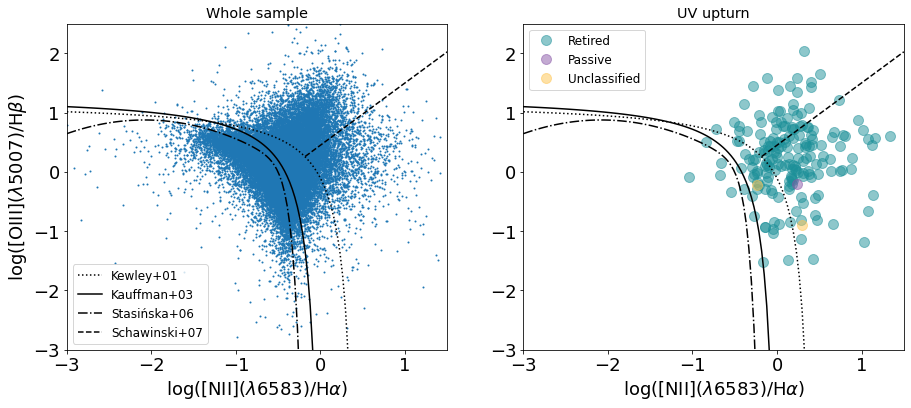

In [29]:
plt.subplot(1,2,1)
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-3,2.5)
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.log10(x1uv_r), np.log10(y1uv_r), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[1], 
         label='Retired')
plt.plot(np.log10(x1uv_p), np.log10(y1uv_p), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[0], 
         label='Passive')
plt.plot(np.log10(x1uv_u), np.log10(y1uv_u), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[2], 
         label='Unclassified')

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k')

plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.xlim(-3,1.5)
plt.ylim(-3,2.5)
plt.title('UV upturn')
plt.legend()

plt.show()

In [30]:
x2 = data_BPT2['OIB_FLUX']/data_BPT2['HA_FLUX']
y2 = data_BPT2['OIIIR_FLUX']/data_BPT2['HB_FLUX']

x2uv_r = UVup_BPT2r['OIB_FLUX']/UVup_BPT2r['HA_FLUX']
y2uv_r = UVup_BPT2r['OIIIR_FLUX']/UVup_BPT2r['HB_FLUX']

x2uv_p = UVup_BPT2p['OIB_FLUX']/UVup_BPT2p['HA_FLUX']
y2uv_p = UVup_BPT2p['OIIIR_FLUX']/UVup_BPT2p['HB_FLUX']

x2uv_u = UVup_BPT2u['OIB_FLUX']/UVup_BPT2u['HA_FLUX']
y2uv_u = UVup_BPT2u['OIIIR_FLUX']/UVup_BPT2u['HB_FLUX']

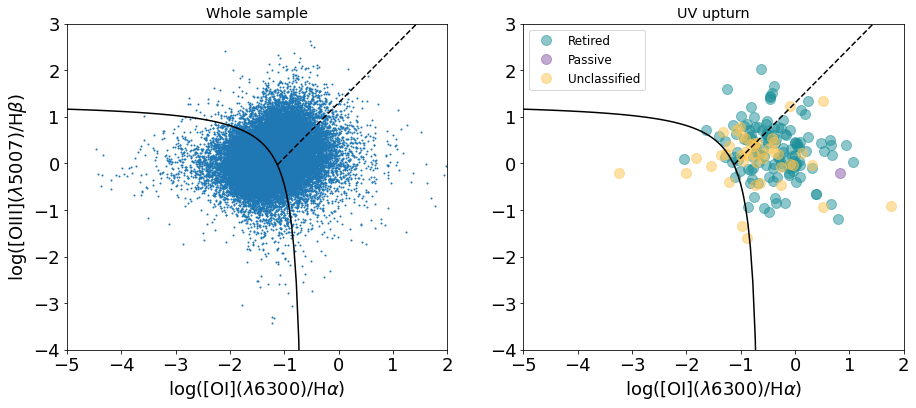

In [31]:
plt.subplot(1,2,1)
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)

x0 = np.linspace(-5, -0.6, 100)
plt.plot(x0, main_AGN_BPT2(x0), c='k')

x0 = np.linspace(-1.12, 2, 100)
plt.plot(x0, LINER_SY2_BPT2(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{OI}](\lambda 6300)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-5,2)
plt.ylim(-4,3)
plt.title('Whole sample')

plt.subplot(1,2,2)
plt.plot(np.log10(x2uv_r), np.log10(y2uv_r), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[1], 
         label='Retired')
plt.plot(np.log10(x2uv_p), np.log10(y2uv_p), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[0], 
         label='Passive')
plt.plot(np.log10(x2uv_u), np.log10(y2uv_u), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[2], 
         label='Unclassified')

x0 = np.linspace(-5, -0.6, 100)
plt.plot(x0, main_AGN_BPT2(x0), c='k')

x0 = np.linspace(-1.12, 2, 100)
plt.plot(x0, LINER_SY2_BPT2(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{OI}](\lambda 6300)/\mathrm{H}\alpha)$')
plt.xlim(-5,2)
plt.ylim(-4,3)
plt.title('UV upturn')
plt.legend()

plt.show()

In [32]:
x3 = (data_BPT3['SIIR_FLUX']+data_BPT3['SIIB_FLUX'])/data_BPT3['HA_FLUX']
y3 = data_BPT3['OIIIR_FLUX']/data_BPT3['HB_FLUX']

x3uv_r = (UVup_BPT3r['SIIR_FLUX']+UVup_BPT3r['SIIB_FLUX'])/UVup_BPT3r['HA_FLUX']
y3uv_r = UVup_BPT3r['OIIIR_FLUX']/UVup_BPT3r['HB_FLUX']

x3uv_p = (UVup_BPT3p['SIIR_FLUX']+UVup_BPT3p['SIIB_FLUX'])/UVup_BPT3p['HA_FLUX']
y3uv_p = UVup_BPT3p['OIIIR_FLUX']/UVup_BPT3p['HB_FLUX']

x3uv_u = (UVup_BPT3u['SIIR_FLUX']+UVup_BPT3u['SIIB_FLUX'])/UVup_BPT3u['HA_FLUX']
y3uv_u = UVup_BPT3u['OIIIR_FLUX']/UVup_BPT3u['HB_FLUX']

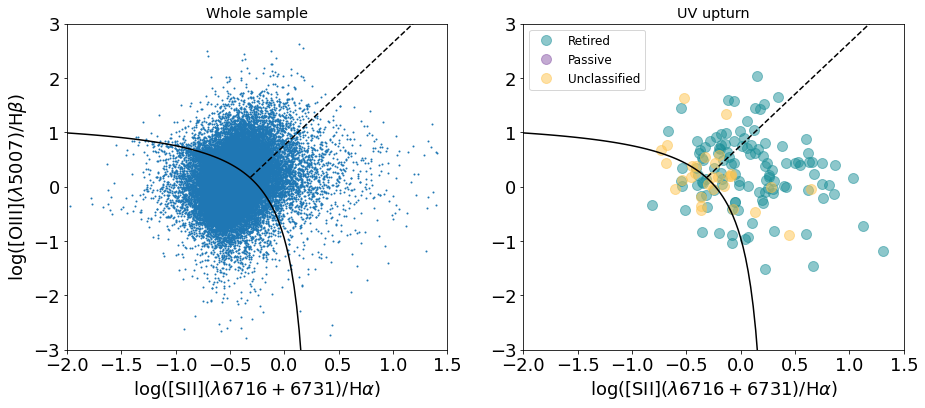

In [33]:
plt.subplot(1,2,1)
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)

x0 = np.linspace(-2, 0.3, 100)
plt.plot(x0, main_AGN_BPT3(x0), c='k')

x0 = np.linspace(-0.31, 1.5, 100)
plt.plot(x0, LINER_SY2_BPT3(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{SII}](\lambda 6716+6731)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2,1.5)
plt.ylim(-3,3)
plt.title('Whole sample')

plt.subplot(1,2,2)
plt.plot(np.log10(x3uv_r), np.log10(y3uv_r), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[1], 
         label='Retired')
plt.plot(np.log10(x3uv_p), np.log10(y3uv_p), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[0], 
         label='Passive')
plt.plot(np.log10(x3uv_u), np.log10(y3uv_u), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[2], 
         label='Unclassified')

x0 = np.linspace(-2, 0.3, 100)
plt.plot(x0, main_AGN_BPT3(x0), c='k')

x0 = np.linspace(-0.31, 1.5, 100)
plt.plot(x0, LINER_SY2_BPT3(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{SII}](\lambda 6716+6731)/\mathrm{H}\alpha)$')
plt.xlim(-2,1.5)
plt.ylim(-3,3)
plt.title('UV upturn')
plt.legend()

plt.show()

In [34]:
x4 = data_Stasinska1['OIIB_FLUX']/data_Stasinska1['HB_FLUX']
y4 = data_Stasinska1['OIIIR_FLUX']/data_Stasinska1['HB_FLUX']

x4uv_r = UVup_Stasinska1r['OIIB_FLUX']/UVup_Stasinska1r['HB_FLUX']
y4uv_r = UVup_Stasinska1r['OIIIR_FLUX']/UVup_Stasinska1r['HB_FLUX']

x4uv_p = UVup_Stasinska1p['OIIB_FLUX']/UVup_Stasinska1p['HB_FLUX']
y4uv_p = UVup_Stasinska1p['OIIIR_FLUX']/UVup_Stasinska1p['HB_FLUX']

x4uv_u = UVup_Stasinska1u['OIIB_FLUX']/UVup_Stasinska1u['HB_FLUX']
y4uv_u = UVup_Stasinska1u['OIIIR_FLUX']/UVup_Stasinska1u['HB_FLUX']

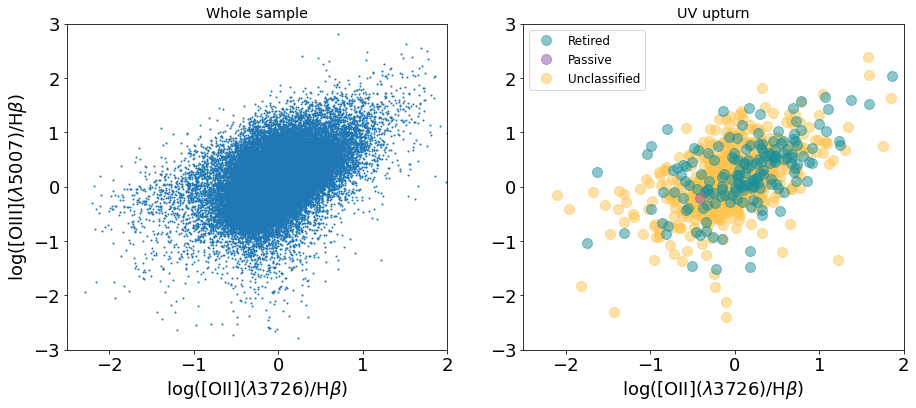

In [35]:
plt.subplot(1,2,1)
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{OII}](\lambda 3726)/\mathrm{H}\beta)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2.5,2)
plt.ylim(-3,3)
plt.title('Whole sample')

plt.subplot(1,2,2)
plt.plot(np.log10(x4uv_r), np.log10(y4uv_r), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[1], 
         label='Retired', zorder=10)
plt.plot(np.log10(x4uv_p), np.log10(y4uv_p), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[0], 
         label='Passive', zorder=15)
plt.plot(np.log10(x4uv_u), np.log10(y4uv_u), ls='', marker='o', markersize=10, alpha=0.5, c=palette_darker[2], 
         label='Unclassified', zorder=5)
plt.xlabel(r'$\log([\mathrm{OII}](\lambda 3726)/\mathrm{H}\beta)$')
plt.xlim(-2.5,2)
plt.ylim(-3,3)
plt.title('UV upturn')
plt.legend()

plt.show()

# WHAN diagram

In [36]:
plt.rcParams.update(params)

In [37]:
x5 = data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']
y5 = data_WHAN['HA_EW']

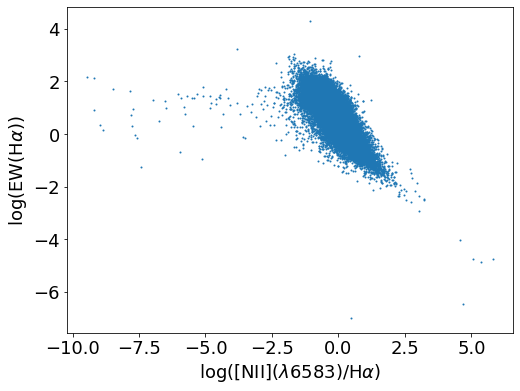

In [38]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.show()

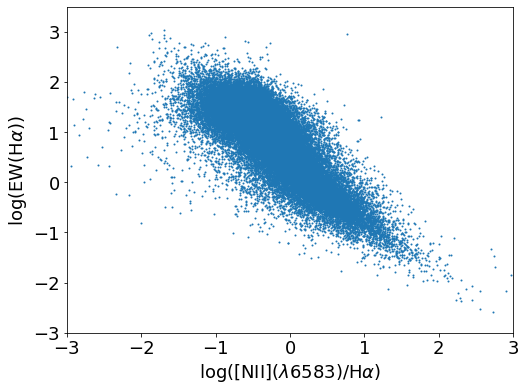

In [39]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,3)
plt.ylim(-3,3.5)
plt.show()

# Spectra

In [40]:
l_pivot = [1535, 2301, 3557, 4702, 6175, 7491, 8946, 8800, 10213, 12525, 16433, 21503, 
           3.37*10**4, 4.62*10**4, 12.1*10**4, 22.8*10**4, 101*10**4, 161*10**4, 249*10**4, 357*10**4, 504*10**4]
flux = [max(data_raw['DFAflux_GALEXFUV']), max(data_raw['DFAflux_GALEXNUV']), max(data_raw['DFAflux_SDSSu']), 
        max(data_raw['DFAflux_SDSSg']), max(data_raw['DFAflux_SDSSr']), max(data_raw['DFAflux_SDSSi']), 
        max(data_raw['DFAflux_SDSSz']), max(data_raw['DFAflux_VIKINGZ']), max(data_raw['DFAflux_VIKINGY']), 
        max(data_raw['DFAflux_VIKINGJ']), max(data_raw['DFAflux_VIKINGH']), max(data_raw['DFAflux_VIKINGK']), 
        max(data_raw['DFAflux_WISEW1']), max(data_raw['DFAflux_WISEW2']), max(data_raw['DFAflux_WISEW3']), 
        max(data_raw['DFAflux_WISEW4']), max(data_raw['DFAflux_PACS100']), max(data_raw['DFAflux_PACS160']), 
        max(data_raw['DFAflux_SPIRE250']), max(data_raw['DFAflux_SPIRE350']), max(data_raw['DFAflux_SPIRE500'])]

Text(0, 0.5, '$\\log(F)$ (Jy)')

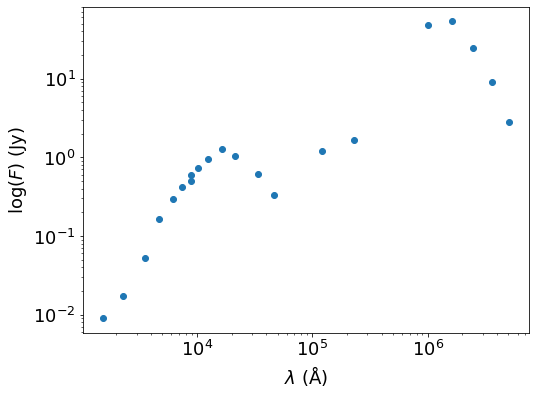

In [41]:
plt.scatter(l_pivot, flux)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ ($\mathrm{\AA}$)')
plt.ylabel(r'$\log(F)$ (Jy)')

# Plots

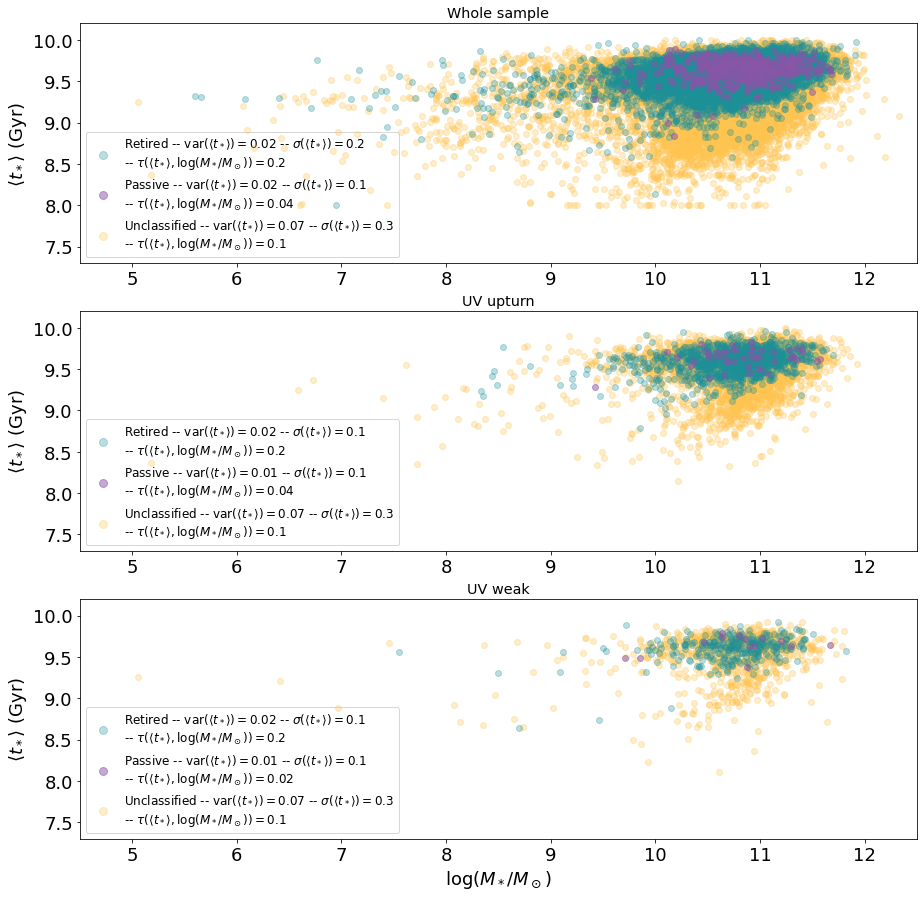

In [42]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ager_percentile50'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(retired['ager_percentile50'].values), np.std(retired['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #retired['ager_percentile50'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         retired['ager_percentile50'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #retired['ager_percentile50'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ager_percentile50'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(passive['ager_percentile50'].values), np.std(passive['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #passive['ager_percentile50'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.2f" % 
         passive['ager_percentile50'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #passive['ager_percentile50'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ager_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(unclassified['ager_percentile50'].values), 
          np.std(unclassified['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #unclassified['ager_percentile50'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         unclassified['ager_percentile50'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #unclassified['ager_percentile50'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=6)

plt.xlim(4.5,12.5)
plt.ylim(7.3,10.2)
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVup_retired['ager_percentile50'].values), np.std(UVup_retired['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_retired['ager_percentile50'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         UVup_retired['ager_percentile50'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_retired['ager_percentile50'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVup_passive['ager_percentile50'].values), np.std(UVup_passive['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['ager_percentile50'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.2f" % 
         UVup_passive['ager_percentile50'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['ager_percentile50'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVup_unclassified['ager_percentile50'].values), 
          np.std(UVup_unclassified['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_unclassified['ager_percentile50'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         UVup_unclassified['ager_percentile50'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'), 
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVup_unclassified['ager_percentile50'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=6)

plt.xlim(4.5,12.5)
plt.ylim(7.3,10.2)
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVweak_retired['ager_percentile50'].values), np.std(UVup_retired['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_retired['ager_percentile50'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         UVweak_retired['ager_percentile50'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_retired['ager_percentile50'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVweak_passive['ager_percentile50'].values), np.std(UVweak_passive['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['ager_percentile50'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.2f" % 
         UVweak_passive['ager_percentile50'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['ager_percentile50'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['ager_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(\left< t_* \right>)=$%.2f -- $\sigma(\left< t_* \right>)=$%.1f" % 
         (np.var(UVweak_unclassified['ager_percentile50'].values), 
          np.std(UVweak_unclassified['ager_percentile50'].values)) + 
         #"\n" r"-- $\rho(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_unclassified['ager_percentile50'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         UVweak_unclassified['ager_percentile50'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(\left< t_* \right>,\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_unclassified['ager_percentile50'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=6)

plt.xlim(4.5,12.5)
plt.ylim(7.3,10.2)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

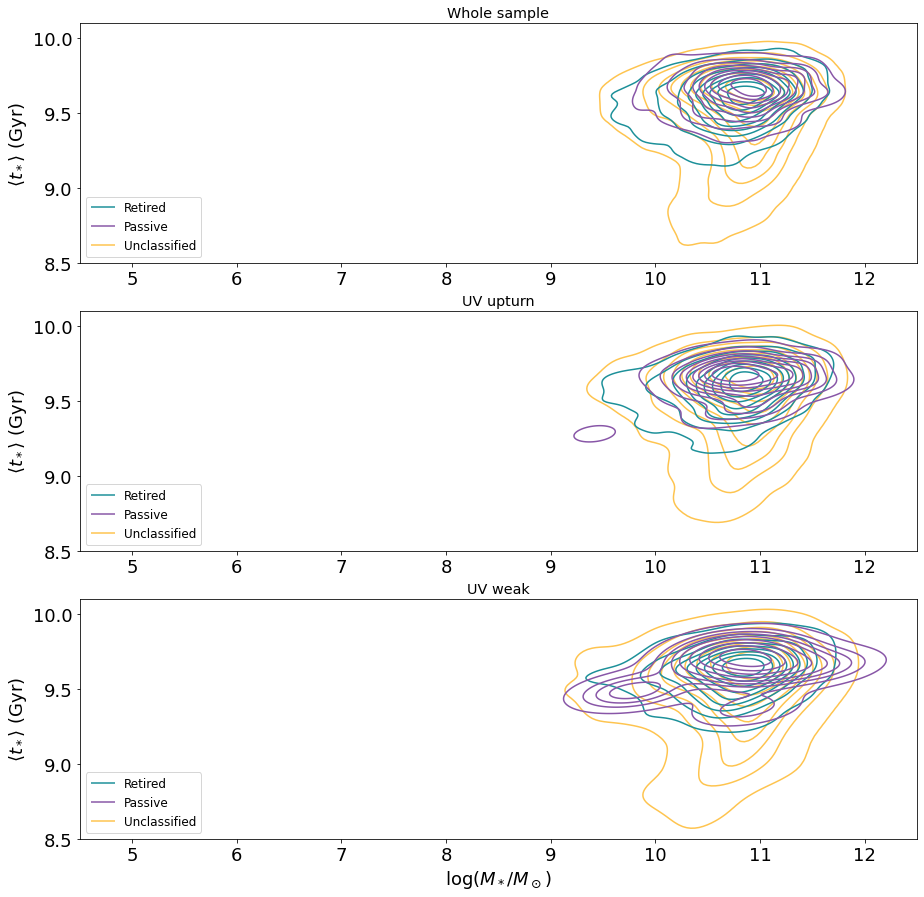

In [43]:
plt.subplot(3,1,1)
sns.kdeplot(x=np.log10(retired['mass_stellar_best_fit']), y=retired['ager_percentile50'], color=palette_darker[1], 
            label='Retired', zorder=10)
sns.kdeplot(x=np.log10(passive['mass_stellar_best_fit']), y=passive['ager_percentile50'], color=palette_darker[0], 
            label='Passive', zorder=15)
sns.kdeplot(x=np.log10(unclassified['mass_stellar_best_fit']), y=unclassified['ager_percentile50'], 
            color=palette_darker[2], label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(8.5,10.1)
plt.xlabel('')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('Whole sample')

plt.legend(loc='lower left')

plt.subplot(3,1,2)
sns.kdeplot(x=np.log10(UVup_retired['mass_stellar_best_fit']), y=UVup_retired['ager_percentile50'], 
            color=palette_darker[1], label='Retired', zorder=10)
sns.kdeplot(x=np.log10(UVup_passive['mass_stellar_best_fit']), y=UVup_passive['ager_percentile50'], 
            color=palette_darker[0], label='Passive', zorder=15)
sns.kdeplot(x=np.log10(UVup_unclassified['mass_stellar_best_fit']), y=UVup_unclassified['ager_percentile50'], 
            color=palette_darker[2], label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(8.5,10.1)
plt.xlabel('')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('UV upturn')

plt.legend(loc='lower left')

plt.subplot(3,1,3)
sns.kdeplot(x=np.log10(UVweak_retired['mass_stellar_best_fit']), y=UVweak_retired['ager_percentile50'], 
            color=palette_darker[1], label='Retired', zorder=10)
sns.kdeplot(x=np.log10(UVweak_passive['mass_stellar_best_fit']), y=UVweak_passive['ager_percentile50'], 
            color=palette_darker[0], label='Passive', zorder=15)
sns.kdeplot(x=np.log10(UVweak_unclassified['mass_stellar_best_fit']), y=UVweak_unclassified['ager_percentile50'], 
            color=palette_darker[2], label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(8.5,10.1)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')
plt.title('UV weak')

plt.legend(loc='lower left')

plt.show()

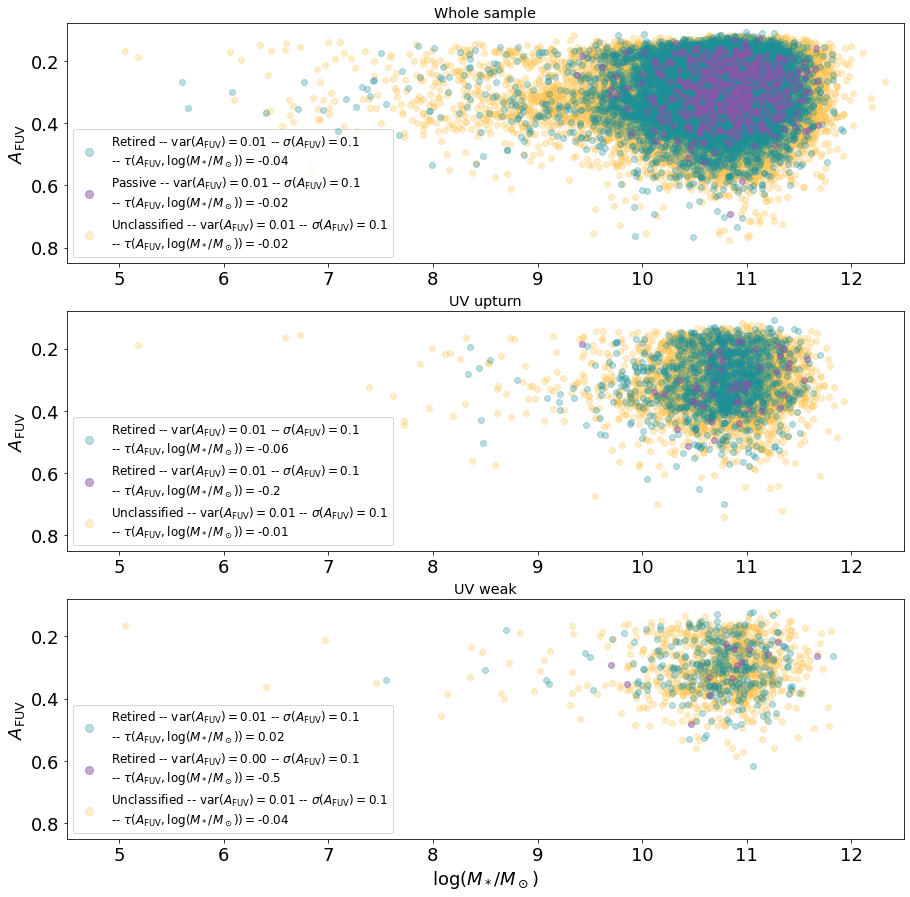

In [44]:
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(retired['A_FUV'].values), np.std(retired['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_FUV'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_FUV'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_FUV'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(passive['A_FUV'].values), np.std(passive['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_FUV'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_FUV'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_FUV'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(unclassified['A_FUV'].values), np.std(unclassified['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_FUV'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_FUV'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_FUV'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.08,0.85)
plt.gca().invert_yaxis()
plt.ylabel(r'$A_\mathrm{FUV}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVup_retired['A_FUV'].values), np.std(UVup_retired['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_FUV'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_FUV'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_FUV'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Retired -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVup_passive['A_FUV'].values), np.std(UVup_passive['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_FUV'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_FUV'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_FUV'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_FUV'], ls='', marker='o',
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVup_unclassified['A_FUV'].values), np.std(UVup_unclassified['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_FUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_FUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_FUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.08,0.85)
plt.gca().invert_yaxis()
plt.ylabel(r'$A_\mathrm{FUV}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    

plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_FUV'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVweak_retired['A_FUV'].values), np.std(UVweak_retired['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_FUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_FUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_FUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Retired -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVweak_passive['A_FUV'].values), np.std(UVweak_passive['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_FUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_FUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_FUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_FUV'], ls='', marker='o',
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{FUV})=$%.2f -- $\sigma(A_\mathrm{FUV})=$%.1f" % 
         (np.var(UVweak_unclassified['A_FUV'].values), np.std(UVweak_unclassified['A_FUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_FUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_FUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{FUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_FUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.08,0.85)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

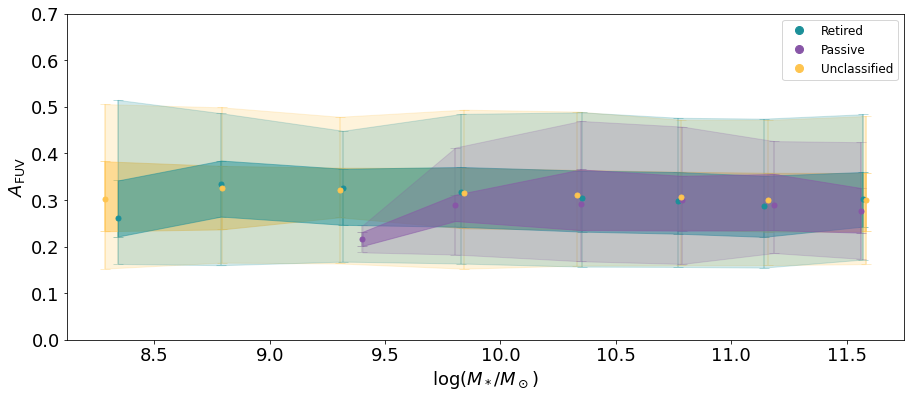

In [45]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_FUV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_FUV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_FUV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_FUV_50r, 
             yerr=[np.array(A_FUV_50r)-np.array(A_FUV_025r), np.array(A_FUV_975r)-np.array(A_FUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_FUV_50r, 
             yerr=[np.array(A_FUV_50r)-np.array(A_FUV_25r), np.array(A_FUV_75r)-np.array(A_FUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_FUV_25r, A_FUV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_FUV_025r, A_FUV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_FUV_50p, 
             yerr=[np.array(A_FUV_50p)-np.array(A_FUV_025p), np.array(A_FUV_975p)-np.array(A_FUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_FUV_50p, 
             yerr=[np.array(A_FUV_50p)-np.array(A_FUV_25p), np.array(A_FUV_75p)-np.array(A_FUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_FUV_25p, A_FUV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_FUV_025p, A_FUV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_FUV_50u, 
             yerr=[np.array(A_FUV_50u)-np.array(A_FUV_025u), np.array(A_FUV_975u)-np.array(A_FUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_FUV_50u, 
             yerr=[np.array(A_FUV_50u)-np.array(A_FUV_25u), np.array(A_FUV_75u)-np.array(A_FUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_FUV_25u, A_FUV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_FUV_025u, A_FUV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.7])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


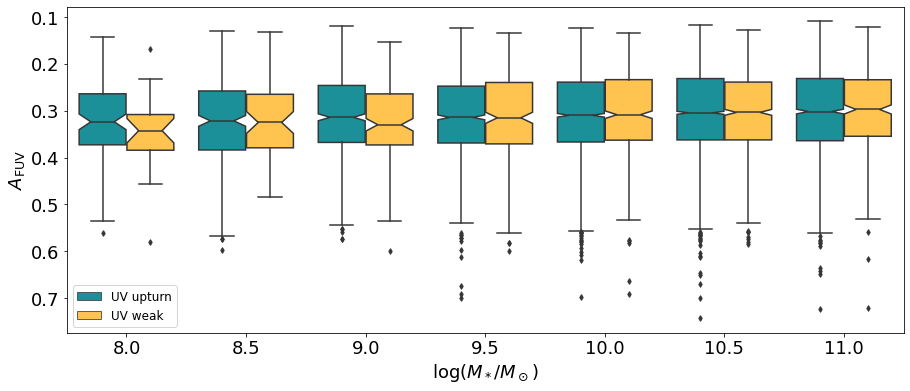

In [46]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_FUV', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')
plt.gca().invert_yaxis()
plt.show()

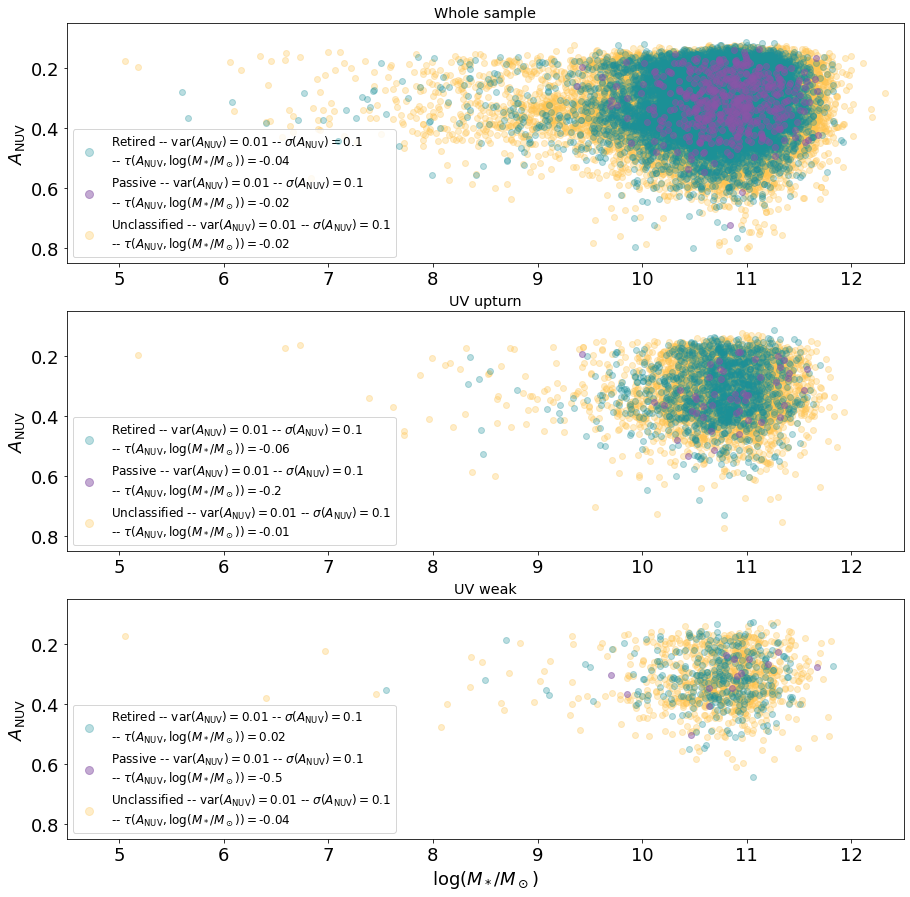

In [47]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(retired['A_NUV'].values), np.std(retired['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_NUV'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_NUV'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_NUV'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(passive['A_NUV'].values), np.std(passive['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_NUV'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_NUV'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_NUV'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(unclassified['A_NUV'].values), np.std(unclassified['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_NUV'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_NUV'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_NUV'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.05, 0.85)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_\mathrm{NUV}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVup_retired['A_NUV'].values), np.std(UVup_retired['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_NUV'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_NUV'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_NUV'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVup_passive['A_NUV'].values), np.std(UVup_passive['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_NUV'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_NUV'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_NUV'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_NUV'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVup_unclassified['A_NUV'].values), np.std(UVup_unclassified['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_NUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_NUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_NUV'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.05, 0.85)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_\mathrm{NUV}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVweak_retired['A_NUV'].values), np.std(UVweak_retired['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_NUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_NUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_NUV'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVweak_passive['A_NUV'].values), np.std(UVweak_passive['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_NUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_NUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_NUV'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_NUV'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{NUV})=$%.2f -- $\sigma(A_\mathrm{NUV})=$%.1f" % 
         (np.var(UVweak_unclassified['A_NUV'].values), np.std(UVweak_unclassified['A_NUV'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_NUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_NUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{NUV},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_NUV'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.05, 0.85)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

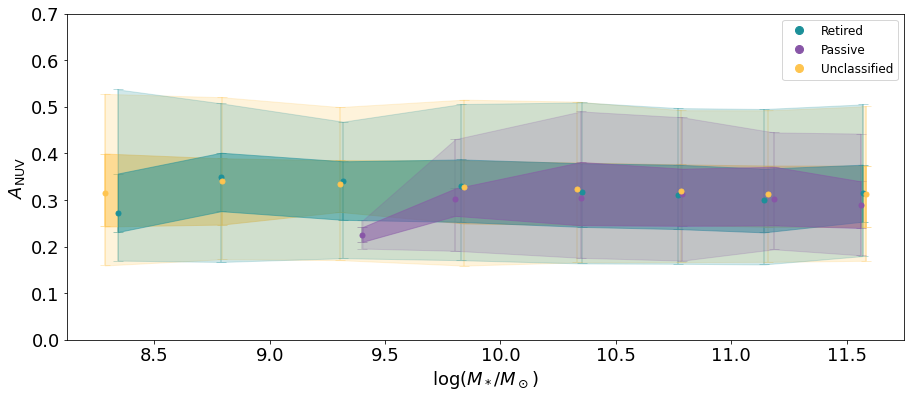

In [48]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_NUV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_NUV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_NUV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_NUV_50r, 
             yerr=[np.array(A_NUV_50r)-np.array(A_NUV_025r), np.array(A_NUV_975r)-np.array(A_NUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_NUV_50r, 
             yerr=[np.array(A_NUV_50r)-np.array(A_NUV_25r), np.array(A_NUV_75r)-np.array(A_NUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_NUV_25r, A_NUV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_NUV_025r, A_NUV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_NUV_50p, 
             yerr=[np.array(A_NUV_50p)-np.array(A_NUV_025p), np.array(A_NUV_975p)-np.array(A_NUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_NUV_50p, 
             yerr=[np.array(A_NUV_50p)-np.array(A_NUV_25p), np.array(A_NUV_75p)-np.array(A_NUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_NUV_25p, A_NUV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_NUV_025p, A_NUV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_NUV_50u, 
             yerr=[np.array(A_NUV_50u)-np.array(A_NUV_025u), np.array(A_NUV_975u)-np.array(A_NUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_NUV_50u, 
             yerr=[np.array(A_NUV_50u)-np.array(A_NUV_25u), np.array(A_NUV_75u)-np.array(A_NUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_NUV_25u, A_NUV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_NUV_025u, A_NUV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.7])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


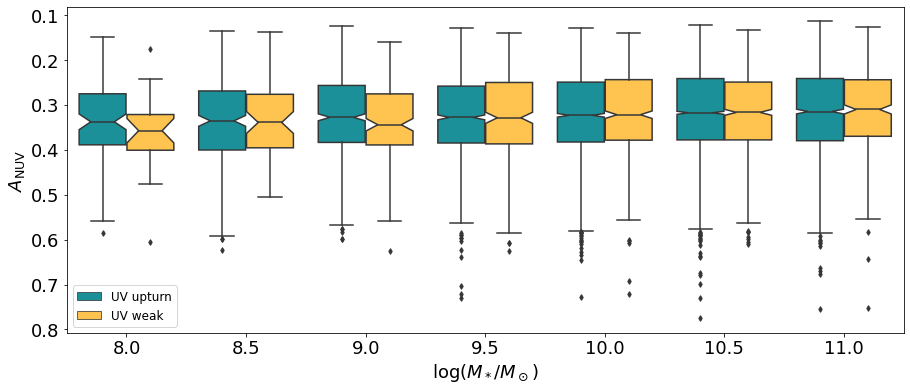

In [49]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_NUV', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')
plt.gca().invert_yaxis()
plt.show()

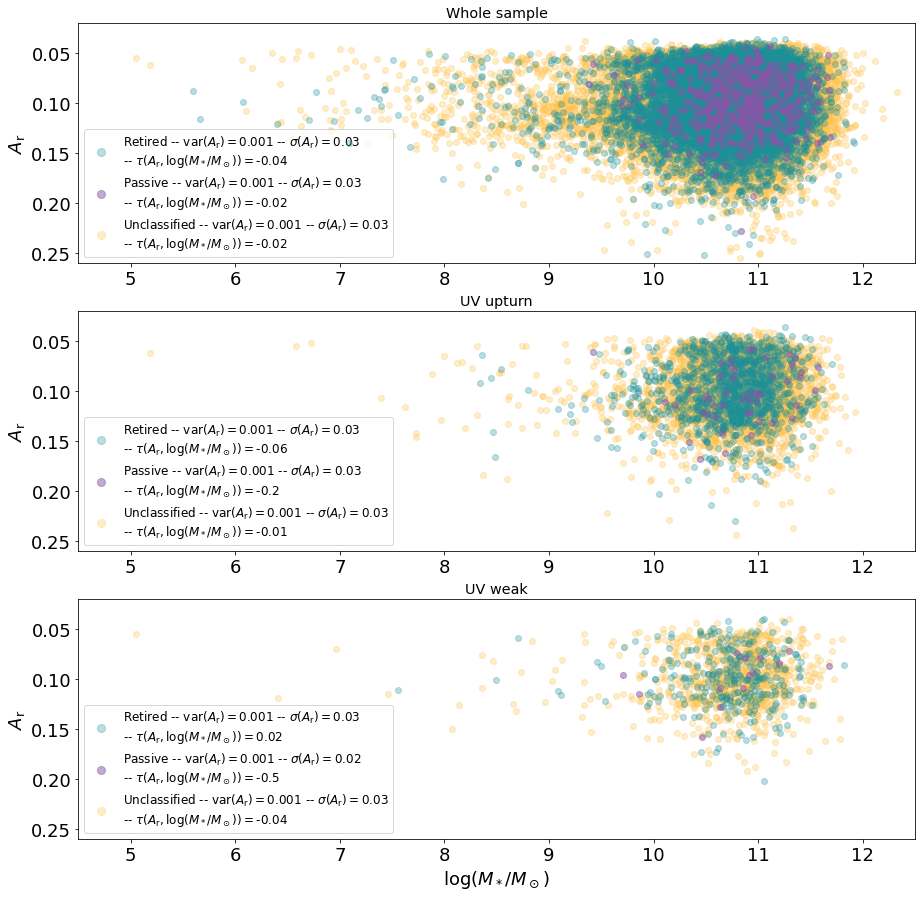

In [50]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(retired['A_r'].values), np.std(retired['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_r'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_r'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_r'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(passive['A_r'].values), np.std(passive['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_r'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_r'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_r'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(unclassified['A_r'].values), np.std(unclassified['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_r'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_r'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_r'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.02, 0.26)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\rm{r}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVup_retired['A_r'].values), np.std(UVup_retired['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_r'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_r'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_r'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVup_passive['A_r'].values), np.std(UVup_passive['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_r'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_r'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_r'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_r'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVup_unclassified['A_r'].values), np.std(UVup_unclassified['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_r'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_r'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_r'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.02, 0.26)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\rm{r}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVweak_retired['A_r'].values), np.std(UVweak_retired['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_r'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_r'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_r'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVweak_passive['A_r'].values), np.std(UVweak_passive['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_r'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_r'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_r'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_r'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_\mathrm{r})=$%.3f -- $\sigma(A_\mathrm{r})=$%.2f" % 
         (np.var(UVweak_unclassified['A_r'].values), np.std(UVweak_unclassified['A_r'].values)) + 
         #"\n" r"-- $\rho(A_\mathrm{r},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_r'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_r'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_\mathrm{r},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_r'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5, 12.5)
plt.ylim(0.02, 0.26)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\rm{r}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.show()

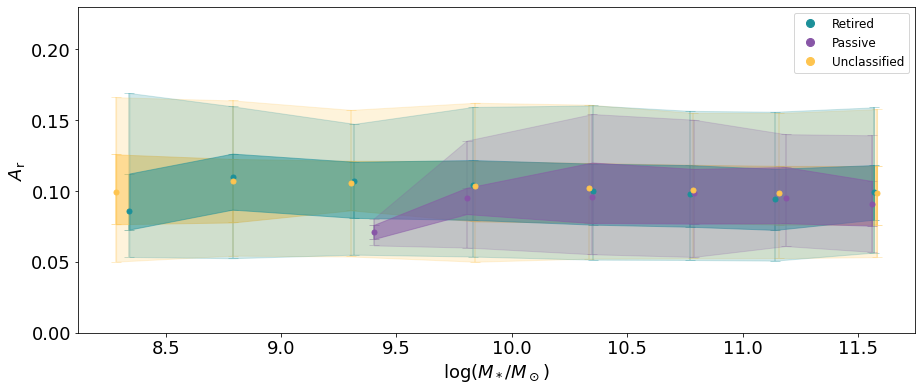

In [51]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_r_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_r_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_r_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_r_50r, 
             yerr=[np.array(A_r_50r)-np.array(A_r_025r), np.array(A_r_975r)-np.array(A_r_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_r_50r, 
             yerr=[np.array(A_r_50r)-np.array(A_r_25r), np.array(A_r_75r)-np.array(A_r_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_r_25r, A_r_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_r_025r, A_r_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_r_50p, 
             yerr=[np.array(A_r_50p)-np.array(A_r_025p), np.array(A_r_975p)-np.array(A_r_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_r_50p, 
             yerr=[np.array(A_r_50p)-np.array(A_r_25p), np.array(A_r_75p)-np.array(A_r_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_r_25p, A_r_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_r_025p, A_r_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_r_50u, 
             yerr=[np.array(A_r_50u)-np.array(A_r_025u), np.array(A_r_975u)-np.array(A_r_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_r_50u, 
             yerr=[np.array(A_r_50u)-np.array(A_r_25u), np.array(A_r_75u)-np.array(A_r_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_r_25u, A_r_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_r_025u, A_r_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\rm{r}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.23])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


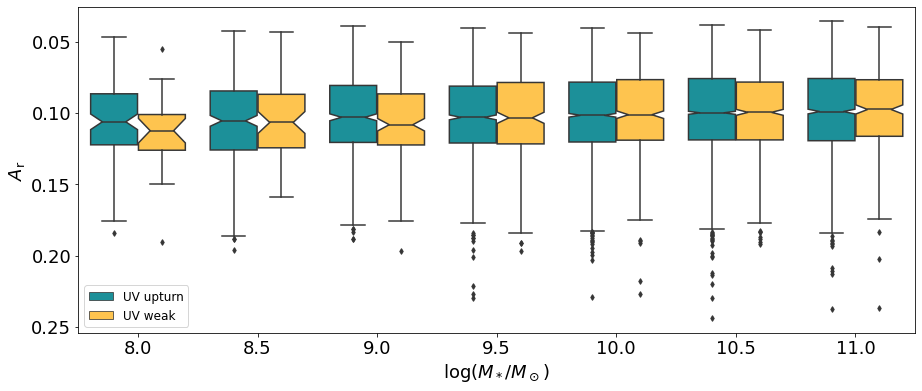

In [52]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_r', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{r}$')
plt.gca().invert_yaxis()
plt.show()

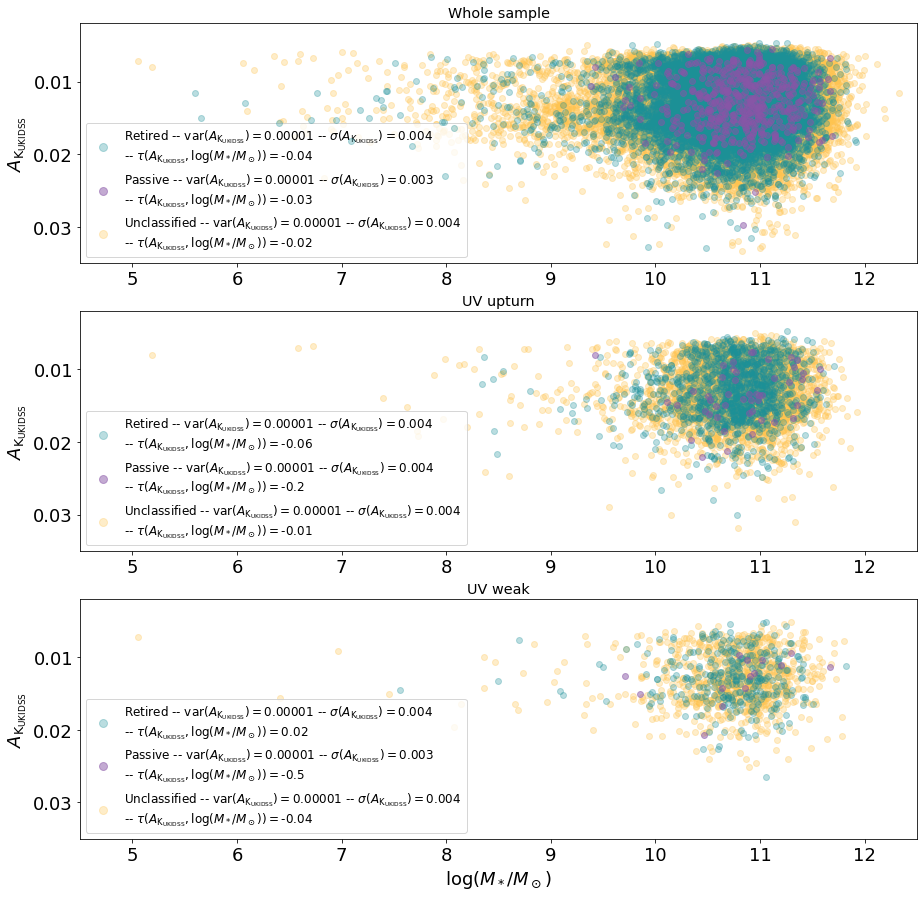

In [53]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_UKIDSS'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(retired['A_K_UKIDSS'].values), np.std(retired['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_K_UKIDSS'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_K_UKIDSS'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_K_UKIDSS'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_UKIDSS'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(passive['A_K_UKIDSS'].values), np.std(passive['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_K_UKIDSS'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_K_UKIDSS'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_K_UKIDSS'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(unclassified['A_K_UKIDSS'].values), np.std(unclassified['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_K_UKIDSS'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_K_UKIDSS'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_K_UKIDSS'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002, 0.035)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{UKIDSS}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVup_retired['A_K_UKIDSS'].values), np.std(UVup_retired['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_K_UKIDSS'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_K_UKIDSS'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_K_UKIDSS'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVup_passive['A_K_UKIDSS'].values), np.std(UVup_passive['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_K_UKIDSS'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_K_UKIDSS'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_K_UKIDSS'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_K_UKIDSS'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVup_unclassified['A_K_UKIDSS'].values), np.std(UVup_unclassified['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_K_UKIDSS'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_K_UKIDSS'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_K_UKIDSS'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002, 0.035)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{UKIDSS}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVweak_retired['A_K_UKIDSS'].values), np.std(UVweak_retired['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_K_UKIDSS'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_K_UKIDSS'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_K_UKIDSS'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVweak_passive['A_K_UKIDSS'].values), np.std(UVweak_passive['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_K_UKIDSS'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_K_UKIDSS'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_K_UKIDSS'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_K_UKIDSS'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{UKIDSS}})=$%.3f" % 
         (np.var(UVweak_unclassified['A_K_UKIDSS'].values), np.std(UVweak_unclassified['A_K_UKIDSS'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_K_UKIDSS'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_K_UKIDSS'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{UKIDSS}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_K_UKIDSS'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002, 0.035)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{UKIDSS}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

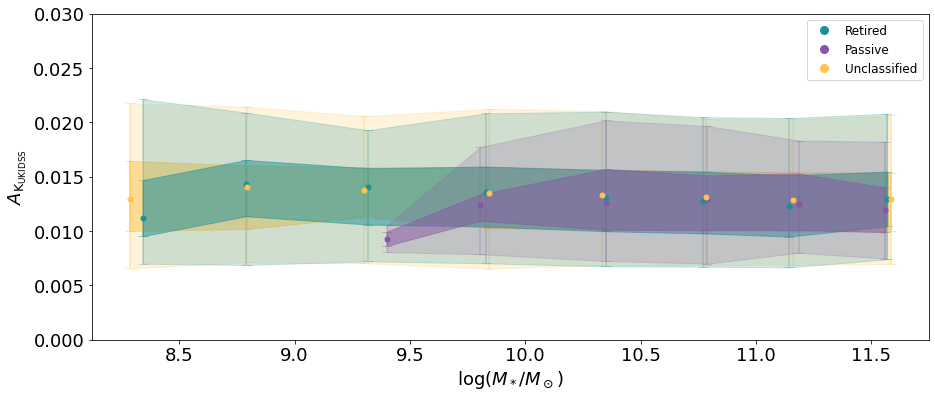

In [54]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_KU_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_KU_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_KU_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_KU_50r, 
             yerr=[np.array(A_KU_50r)-np.array(A_KU_025r), np.array(A_KU_975r)-np.array(A_KU_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_KU_50r, 
             yerr=[np.array(A_KU_50r)-np.array(A_KU_25r), np.array(A_KU_75r)-np.array(A_KU_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_KU_25r, A_KU_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_KU_025r, A_KU_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_KU_50p, 
             yerr=[np.array(A_KU_50p)-np.array(A_KU_025p), np.array(A_KU_975p)-np.array(A_KU_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_KU_50p, 
             yerr=[np.array(A_KU_50p)-np.array(A_KU_25p), np.array(A_KU_75p)-np.array(A_KU_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_KU_25p, A_KU_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_KU_025p, A_KU_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_KU_50u, 
             yerr=[np.array(A_KU_50u)-np.array(A_KU_025u), np.array(A_KU_975u)-np.array(A_KU_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_KU_50u, 
             yerr=[np.array(A_KU_50u)-np.array(A_KU_25u), np.array(A_KU_75u)-np.array(A_KU_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_KU_25u, A_KU_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_KU_025u, A_KU_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{UKIDSS}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.03])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


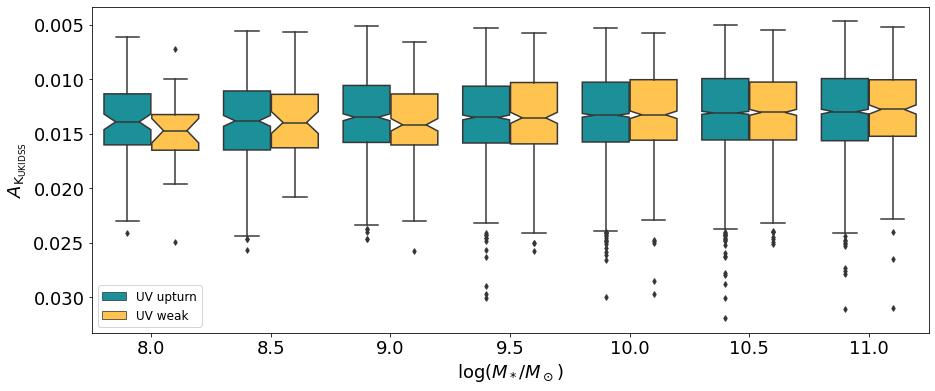

In [55]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_K_UKIDSS', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{UKIDSS}}$')
plt.gca().invert_yaxis()
plt.show()

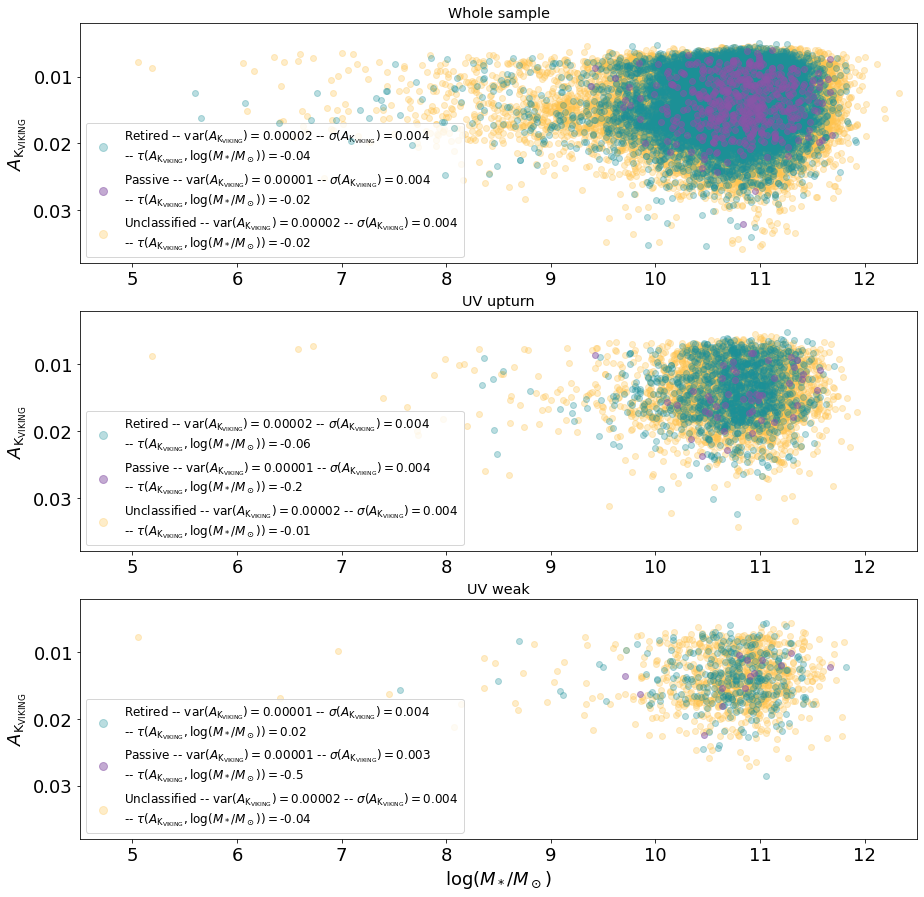

In [56]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(retired['A_K_VIKING'].values), np.std(retired['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_K_VIKING'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_K_VIKING'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_K_VIKING'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(passive['A_K_VIKING'].values), np.std(passive['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_K_VIKING'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_K_VIKING'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_K_VIKING'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(unclassified['A_K_VIKING'].values), np.std(unclassified['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_K_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_K_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_K_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002,0.038)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{VIKING}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_retired['A_K_VIKING'].values), np.std(UVup_retired['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_K_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_K_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_K_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_passive['A_K_VIKING'].values), np.std(UVup_passive['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_K_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_K_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_K_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_K_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_unclassified['A_K_VIKING'].values), np.std(UVup_unclassified['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_K_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_K_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_K_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002,0.038)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{VIKING}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_retired['A_K_VIKING'].values), np.std(UVweak_retired['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_K_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_K_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_K_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_passive['A_K_VIKING'].values), np.std(UVweak_passive['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_K_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_K_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_K_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_K_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{K}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{K}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_unclassified['A_K_VIKING'].values), np.std(UVweak_unclassified['A_K_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_K_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_K_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{K}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_K_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.002,0.038)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{VIKING}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

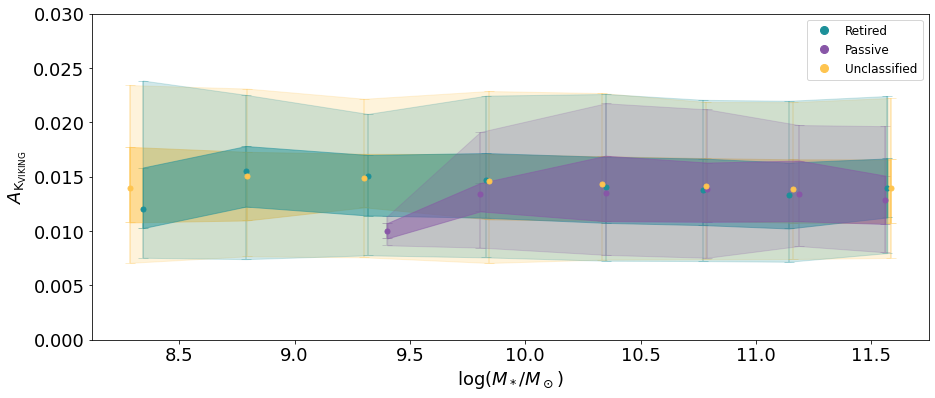

In [57]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_KV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_KV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_KV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_KV_50r, 
             yerr=[np.array(A_KV_50r)-np.array(A_KV_025r), np.array(A_KV_975r)-np.array(A_KV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_KV_50r, 
             yerr=[np.array(A_KV_50r)-np.array(A_KV_25r), np.array(A_KV_75r)-np.array(A_KV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_KV_25r, A_KV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_KV_025r, A_KV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_KV_50p, 
             yerr=[np.array(A_KV_50p)-np.array(A_KV_025p), np.array(A_KV_975p)-np.array(A_KV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_KV_50p, 
             yerr=[np.array(A_KV_50p)-np.array(A_KV_25p), np.array(A_KV_75p)-np.array(A_KV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_KV_25p, A_KV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_KV_025p, A_KV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_KV_50u, 
             yerr=[np.array(A_KV_50u)-np.array(A_KV_025u), np.array(A_KV_975u)-np.array(A_KV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_KV_50u, 
             yerr=[np.array(A_KV_50u)-np.array(A_KV_25u), np.array(A_KV_75u)-np.array(A_KV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_KV_25u, A_KV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_KV_025u, A_KV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.03])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


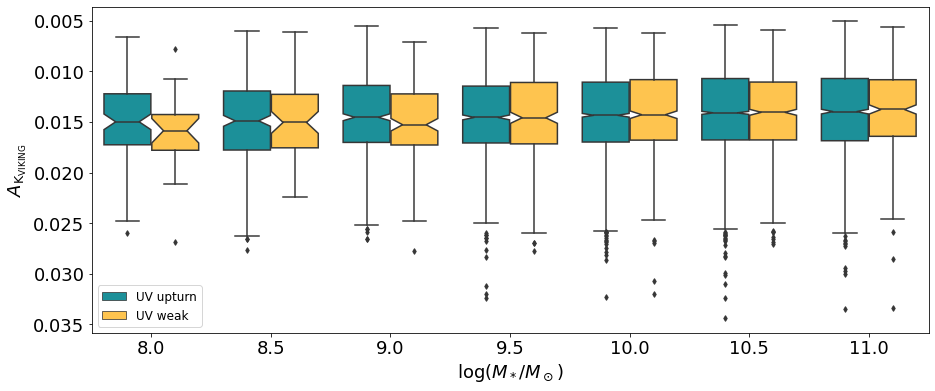

In [58]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_K_VIKING', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{K}_\mathrm{VIKING}}$')
plt.gca().invert_yaxis()
plt.show()

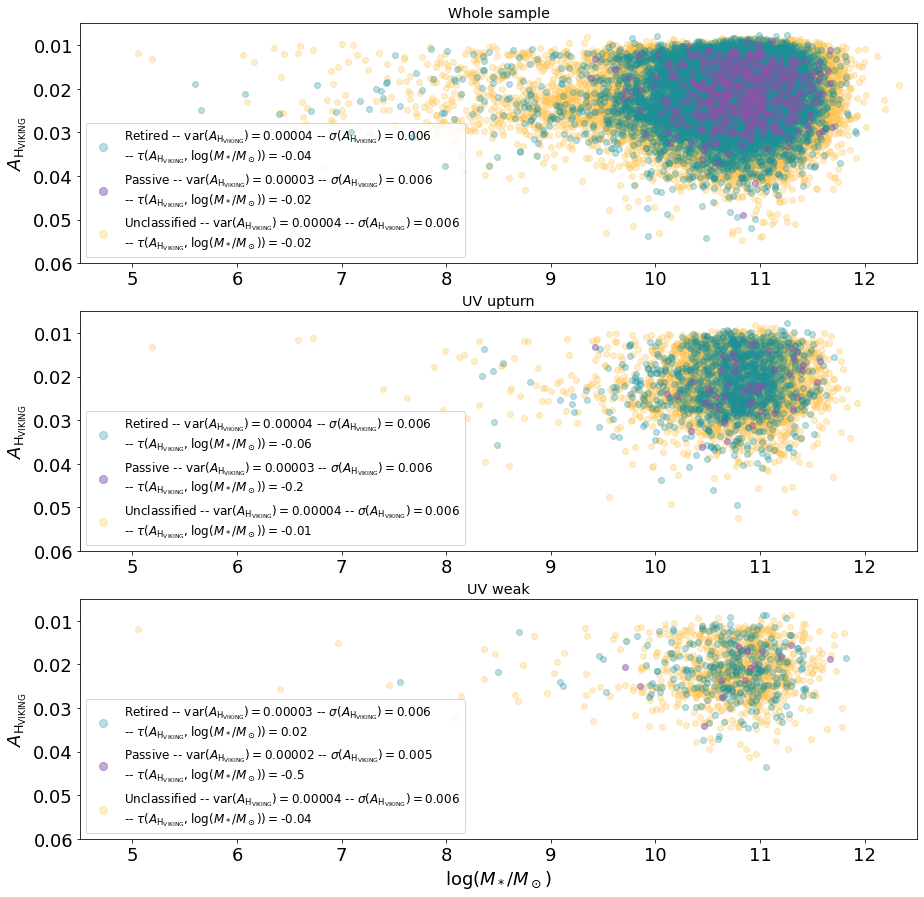

In [59]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_H_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(retired['A_H_VIKING'].values), np.std(retired['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_H_VIKING'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_H_VIKING'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_H_VIKING'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_H_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(passive['A_H_VIKING'].values), np.std(passive['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_H_VIKING'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_H_VIKING'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_H_VIKING'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_H_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(unclassified['A_H_VIKING'].values), np.std(unclassified['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_H_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_H_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_H_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.005,0.06)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{H}_\mathrm{VIKING}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_H_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_retired['A_H_VIKING'].values), np.std(UVup_retired['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_H_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_H_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_H_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_H_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_passive['A_H_VIKING'].values), np.std(UVup_passive['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_H_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_H_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_H_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_H_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVup_unclassified['A_H_VIKING'].values), np.std(UVup_unclassified['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_H_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_H_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_H_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.005,0.06)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{H}_\mathrm{VIKING}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_H_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_retired['A_H_VIKING'].values), np.std(UVweak_retired['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_H_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_H_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_H_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_H_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_passive['A_H_VIKING'].values), np.std(UVweak_passive['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_H_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_H_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_H_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_H_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{H}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{H}_\mathrm{VIKING}})=$%.3f" % 
         (np.var(UVweak_unclassified['A_H_VIKING'].values), np.std(UVweak_unclassified['A_H_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_H_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_H_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{H}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_H_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.005,0.06)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{H}_\mathrm{VIKING}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

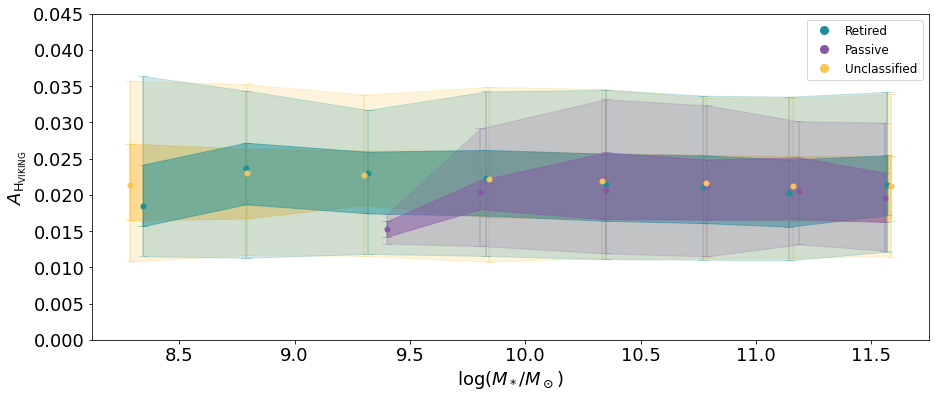

In [60]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_HV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_HV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_HV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_HV_50r, 
             yerr=[np.array(A_HV_50r)-np.array(A_HV_025r), np.array(A_HV_975r)-np.array(A_HV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_HV_50r, 
             yerr=[np.array(A_HV_50r)-np.array(A_HV_25r), np.array(A_HV_75r)-np.array(A_HV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_HV_25r, A_HV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_HV_025r, A_HV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_HV_50p, 
             yerr=[np.array(A_HV_50p)-np.array(A_HV_025p), np.array(A_HV_975p)-np.array(A_HV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_HV_50p, 
             yerr=[np.array(A_HV_50p)-np.array(A_HV_25p), np.array(A_HV_75p)-np.array(A_HV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_HV_25p, A_HV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_HV_025p, A_HV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_HV_50u, 
             yerr=[np.array(A_HV_50u)-np.array(A_HV_025u), np.array(A_HV_975u)-np.array(A_HV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_HV_50u, 
             yerr=[np.array(A_HV_50u)-np.array(A_HV_25u), np.array(A_HV_75u)-np.array(A_HV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_HV_25u, A_HV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_HV_025u, A_HV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{H}_\mathrm{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.045])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


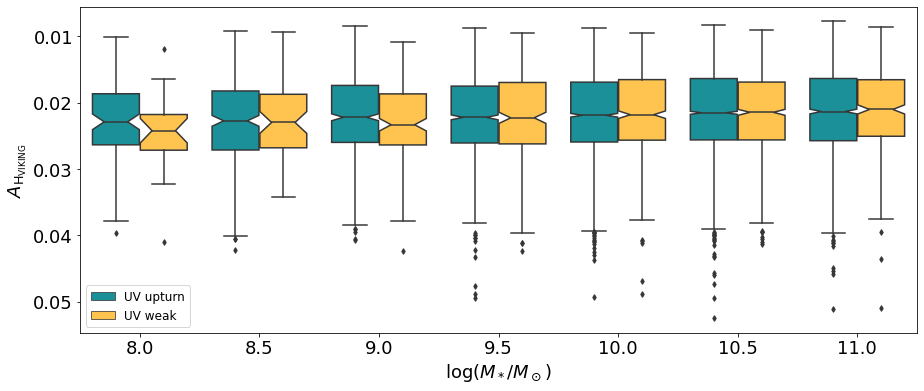

In [61]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_H_VIKING', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{H}_\mathrm{VIKING}}$')
plt.gca().invert_yaxis()
plt.show()

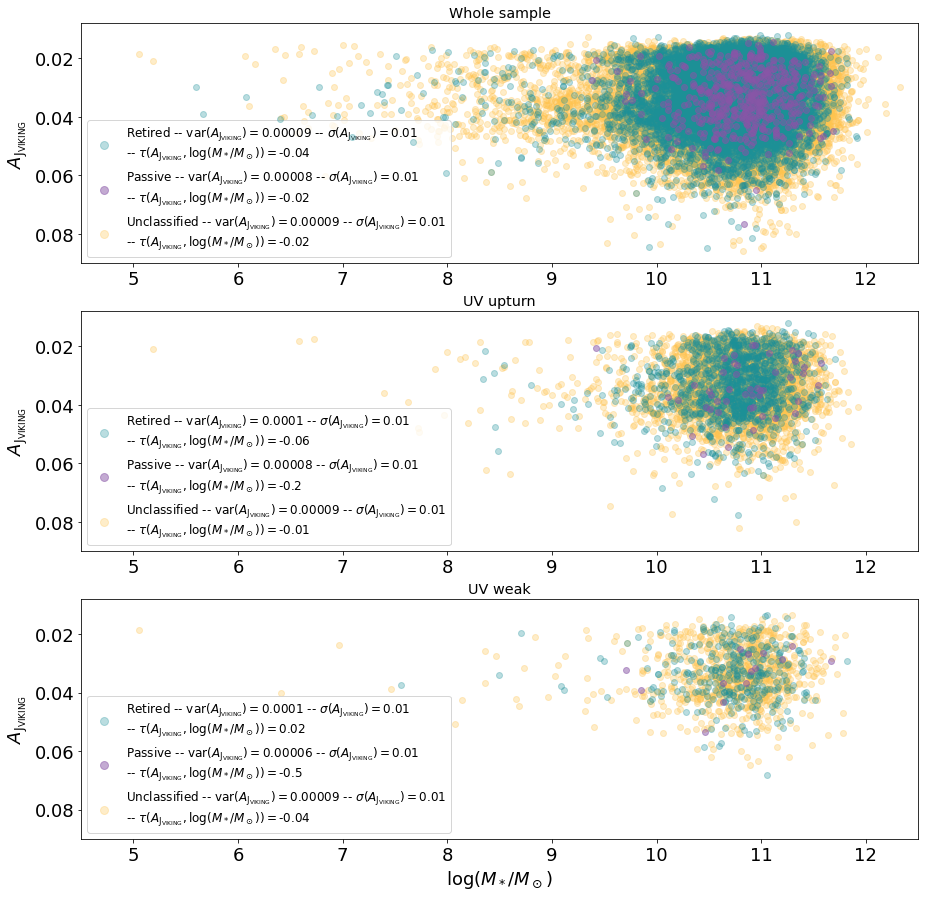

In [62]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_J_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(retired['A_J_VIKING'].values), np.std(retired['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_J_VIKING'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_J_VIKING'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_J_VIKING'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_J_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(passive['A_J_VIKING'].values), np.std(passive['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_J_VIKING'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_J_VIKING'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_J_VIKING'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_J_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(unclassified['A_J_VIKING'].values), np.std(unclassified['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_J_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_J_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_J_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.008,0.09)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{J}_\mathrm{VIKING}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_J_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_retired['A_J_VIKING'].values), np.std(UVup_retired['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_J_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_J_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_J_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_J_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_passive['A_J_VIKING'].values), np.std(UVup_passive['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_J_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_J_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_J_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_J_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_unclassified['A_J_VIKING'].values), np.std(UVup_unclassified['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_J_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_J_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_J_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.008,0.09)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{J}_\mathrm{VIKING}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_J_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_retired['A_J_VIKING'].values), np.std(UVweak_retired['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_J_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_J_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_J_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_J_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_passive['A_J_VIKING'].values), np.std(UVweak_passive['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_J_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_J_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_J_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_J_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{J}_\mathrm{VIKING}})=$%.5f -- $\sigma(A_{\mathrm{J}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_unclassified['A_J_VIKING'].values), np.std(UVweak_unclassified['A_J_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_J_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_J_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{J}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_J_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.008,0.09)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{J}_\mathrm{VIKING}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

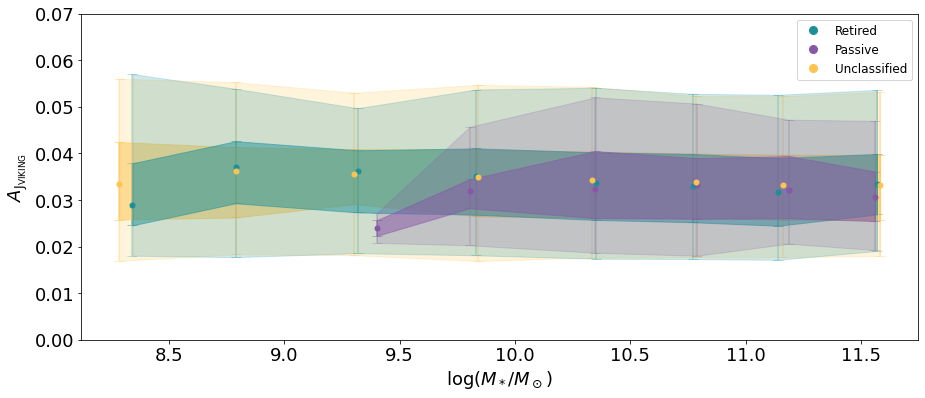

In [63]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_JV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_JV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_JV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_JV_50r, 
             yerr=[np.array(A_JV_50r)-np.array(A_JV_025r), np.array(A_JV_975r)-np.array(A_JV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_JV_50r, 
             yerr=[np.array(A_JV_50r)-np.array(A_JV_25r), np.array(A_JV_75r)-np.array(A_JV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_JV_25r, A_JV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_JV_025r, A_JV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_JV_50p, 
             yerr=[np.array(A_JV_50p)-np.array(A_JV_025p), np.array(A_JV_975p)-np.array(A_JV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_JV_50p, 
             yerr=[np.array(A_JV_50p)-np.array(A_JV_25p), np.array(A_JV_75p)-np.array(A_JV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_JV_25p, A_JV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_JV_025p, A_JV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_JV_50u, 
             yerr=[np.array(A_JV_50u)-np.array(A_JV_025u), np.array(A_JV_975u)-np.array(A_JV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_JV_50u, 
             yerr=[np.array(A_JV_50u)-np.array(A_JV_25u), np.array(A_JV_75u)-np.array(A_JV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_JV_25u, A_JV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_JV_025u, A_JV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{J}_\mathrm{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.07])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


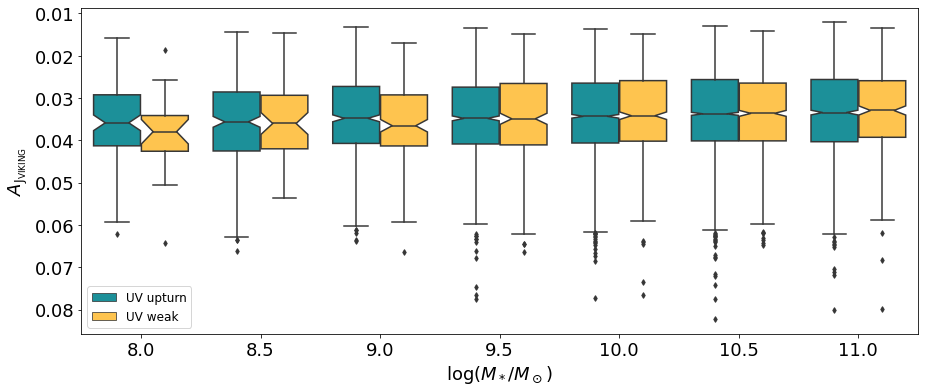

In [64]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_J_VIKING', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{J}_\mathrm{VIKING}}$')
plt.gca().invert_yaxis()
plt.show()

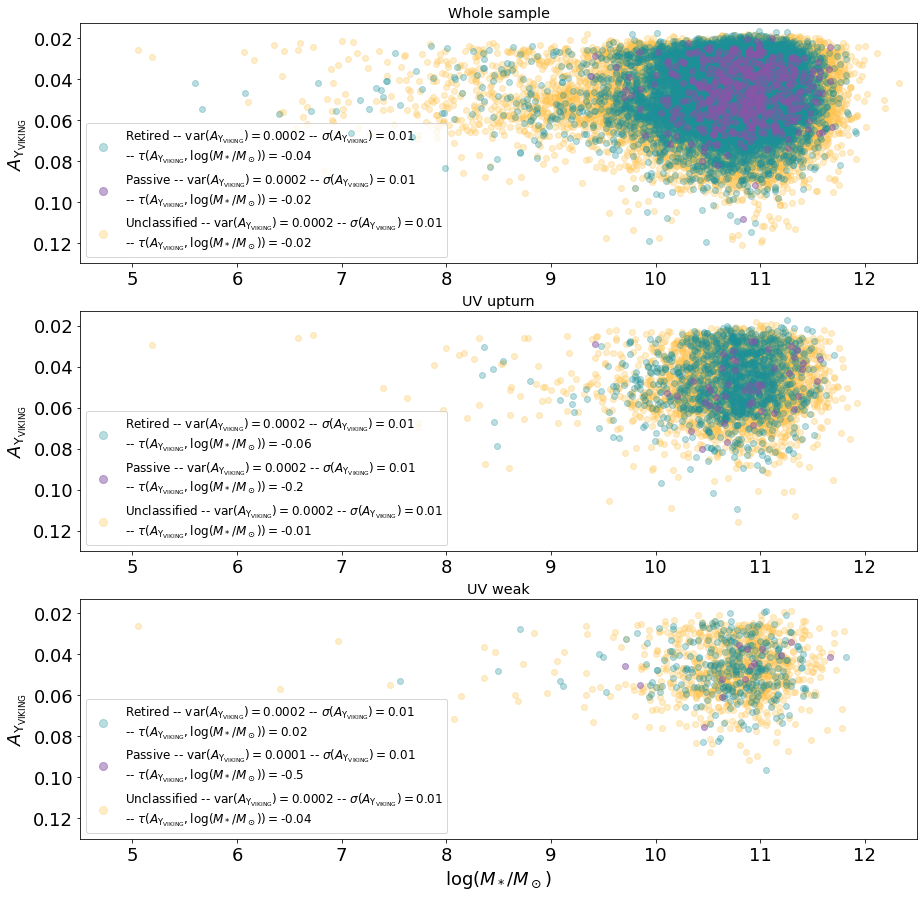

In [65]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_Y_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(retired['A_Y_VIKING'].values), np.std(retired['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_Y_VIKING'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_Y_VIKING'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_Y_VIKING'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_Y_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(passive['A_Y_VIKING'].values), np.std(passive['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_Y_VIKING'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_Y_VIKING'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_Y_VIKING'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_Y_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(unclassified['A_Y_VIKING'].values), np.std(unclassified['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_Y_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_Y_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_Y_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.013,0.13)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{Y}_\mathrm{VIKING}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_Y_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_retired['A_Y_VIKING'].values), np.std(UVup_retired['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_Y_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_Y_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_Y_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_Y_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_passive['A_Y_VIKING'].values), np.std(UVup_passive['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_Y_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_Y_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_Y_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_Y_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_unclassified['A_Y_VIKING'].values), np.std(UVup_unclassified['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_Y_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_Y_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_Y_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.013,0.13)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{Y}_\mathrm{VIKING}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_Y_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_retired['A_Y_VIKING'].values), np.std(UVweak_retired['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_Y_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_Y_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_Y_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_Y_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_passive['A_Y_VIKING'].values), np.std(UVweak_passive['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_Y_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_Y_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_Y_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_Y_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Y}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_unclassified['A_Y_VIKING'].values), np.std(UVweak_unclassified['A_Y_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_Y_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_Y_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Y}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_Y_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.013,0.13)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Y}_\mathrm{VIKING}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

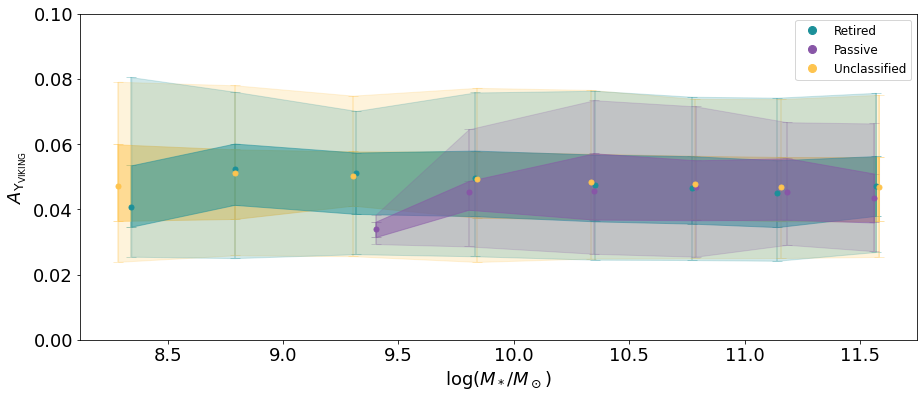

In [66]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_YV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_YV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_YV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_YV_50r, 
             yerr=[np.array(A_YV_50r)-np.array(A_YV_025r), np.array(A_YV_975r)-np.array(A_YV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_YV_50r, 
             yerr=[np.array(A_YV_50r)-np.array(A_YV_25r), np.array(A_YV_75r)-np.array(A_YV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_YV_25r, A_YV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_YV_025r, A_YV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_YV_50p, 
             yerr=[np.array(A_YV_50p)-np.array(A_YV_025p), np.array(A_YV_975p)-np.array(A_YV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_YV_50p, 
             yerr=[np.array(A_YV_50p)-np.array(A_YV_25p), np.array(A_YV_75p)-np.array(A_YV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_YV_25p, A_YV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_YV_025p, A_YV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_YV_50u, 
             yerr=[np.array(A_YV_50u)-np.array(A_YV_025u), np.array(A_YV_975u)-np.array(A_YV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_YV_50u, 
             yerr=[np.array(A_YV_50u)-np.array(A_YV_25u), np.array(A_YV_75u)-np.array(A_YV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_YV_25u, A_YV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_YV_025u, A_YV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Y}_\mathrm{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.1])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


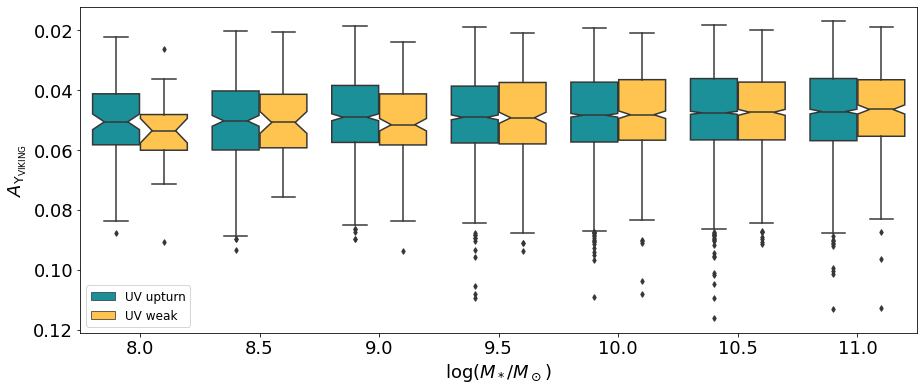

In [67]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_Y_VIKING', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Y}_\mathrm{VIKING}}$')
plt.gca().invert_yaxis()
plt.show()

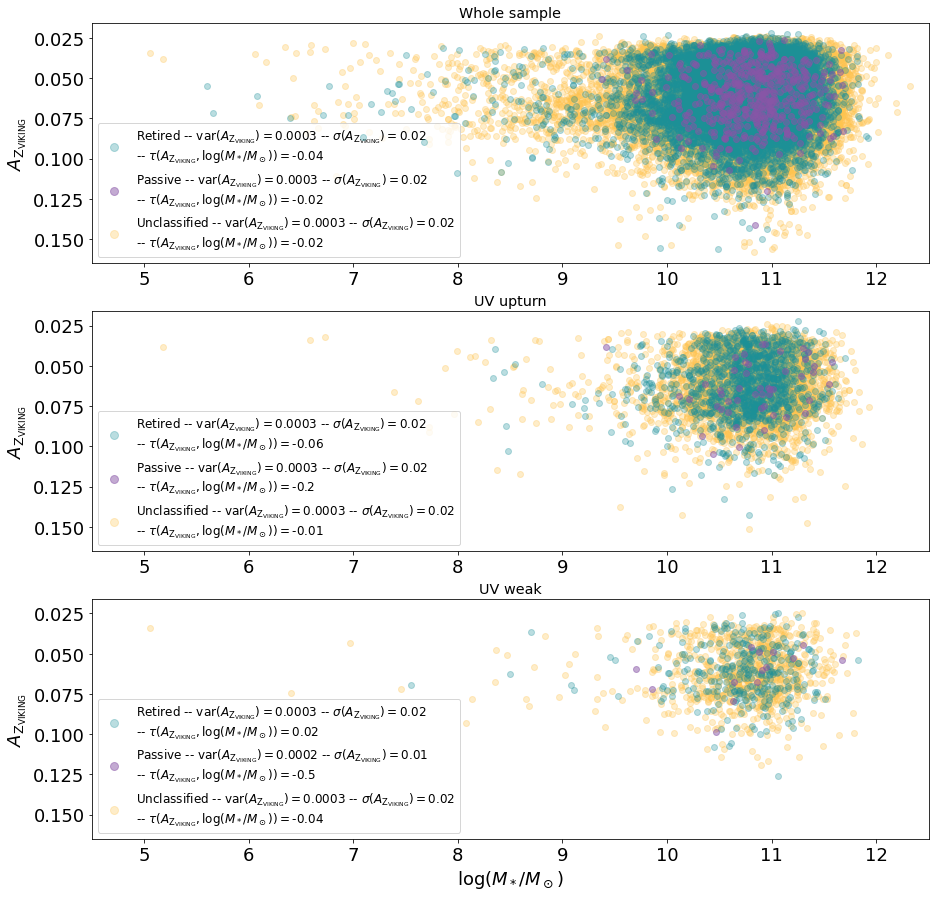

In [68]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_Z_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(retired['A_Z_VIKING'].values), np.std(retired['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_Z_VIKING'].corr(retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         retired['A_Z_VIKING'].corr(retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #retired['A_Z_VIKING'].corr(retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_Z_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(passive['A_Z_VIKING'].values), np.std(passive['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_Z_VIKING'].corr(passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         passive['A_Z_VIKING'].corr(passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #passive['A_Z_VIKING'].corr(passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_Z_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(unclassified['A_Z_VIKING'].values), np.std(unclassified['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_Z_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         unclassified['A_Z_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #unclassified['A_Z_VIKING'].corr(unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.016,0.165)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{Z}_\mathrm{VIKING}}$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['A_Z_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_retired['A_Z_VIKING'].values), np.std(UVup_retired['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_Z_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_retired['A_Z_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_retired['A_Z_VIKING'].corr(UVup_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['A_Z_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_passive['A_Z_VIKING'].values), np.std(UVup_passive['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_Z_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVup_passive['A_Z_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVup_passive['A_Z_VIKING'].corr(UVup_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['A_Z_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVup_unclassified['A_Z_VIKING'].values), np.std(UVup_unclassified['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVup_unclassified['A_Z_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVup_unclassified['A_Z_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVup_unclassified['A_Z_VIKING'].corr(UVup_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.016,0.165)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel(r'$A_{\mathrm{Z}_\mathrm{VIKING}}$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retired['mass_stellar_best_fit']), UVweak_retired['A_Z_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, 
         label=r"Retired -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_retired['A_Z_VIKING'].values), np.std(UVweak_retired['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_Z_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_retired['A_Z_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_retired['A_Z_VIKING'].corr(UVweak_retired['mass_stellar_best_fit'], method='spearman'), 
         zorder=10)
plt.plot(np.log10(UVweak_passive['mass_stellar_best_fit']), UVweak_passive['A_Z_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, 
         label=r"Passive -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_passive['A_Z_VIKING'].values), np.std(UVweak_passive['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_Z_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         UVweak_passive['A_Z_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.1f" % 
         #UVweak_passive['A_Z_VIKING'].corr(UVweak_passive['mass_stellar_best_fit'], method='spearman'), 
         zorder=15)
plt.plot(np.log10(UVweak_unclassified['mass_stellar_best_fit']), UVweak_unclassified['A_Z_VIKING'], ls='',
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, 
         label=r"Unclassified -- var$(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.4f -- $\sigma(A_{\mathrm{Z}_\mathrm{VIKING}})=$%.2f" % 
         (np.var(UVweak_unclassified['A_Z_VIKING'].values), np.std(UVweak_unclassified['A_Z_VIKING'].values)) + 
         #"\n" r"-- $\rho(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.3f" % 
         #UVweak_unclassified['A_Z_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='pearson') + 
         "\n" r"-- $\tau(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         UVweak_unclassified['A_Z_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='kendall'),
         #"\n" r"-- $\rho_S(A_{\mathrm{Z}_\mathrm{VIKING}},\log(M_*/M_\odot))=$%.2f" % 
         #UVweak_unclassified['A_Z_VIKING'].corr(UVweak_unclassified['mass_stellar_best_fit'], method='spearman'), 
         zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(0.016,0.165)
plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Z}_\mathrm{VIKING}}$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

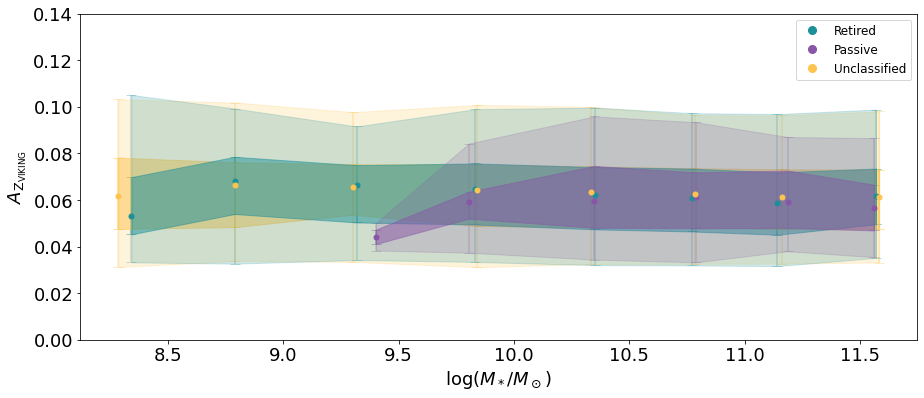

In [69]:
plt.rcParams.update(params2)
plt.plot(np.log10(mass_50r), A_ZV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_ZV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_ZV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_ZV_50r, 
             yerr=[np.array(A_ZV_50r)-np.array(A_ZV_025r), np.array(A_ZV_975r)-np.array(A_ZV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_ZV_50r, 
             yerr=[np.array(A_ZV_50r)-np.array(A_ZV_25r), np.array(A_ZV_75r)-np.array(A_ZV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_ZV_25r, A_ZV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_ZV_025r, A_ZV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_ZV_50p, 
             yerr=[np.array(A_ZV_50p)-np.array(A_ZV_025p), np.array(A_ZV_975p)-np.array(A_ZV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_ZV_50p, 
             yerr=[np.array(A_ZV_50p)-np.array(A_ZV_25p), np.array(A_ZV_75p)-np.array(A_ZV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_ZV_25p, A_ZV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_ZV_025p, A_ZV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_ZV_50u, 
             yerr=[np.array(A_ZV_50u)-np.array(A_ZV_025u), np.array(A_ZV_975u)-np.array(A_ZV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_ZV_50u, 
             yerr=[np.array(A_ZV_50u)-np.array(A_ZV_25u), np.array(A_ZV_75u)-np.array(A_ZV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_ZV_25u, A_ZV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_ZV_025u, A_ZV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.gca().invert_yaxis()
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Z}_\mathrm{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.14])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


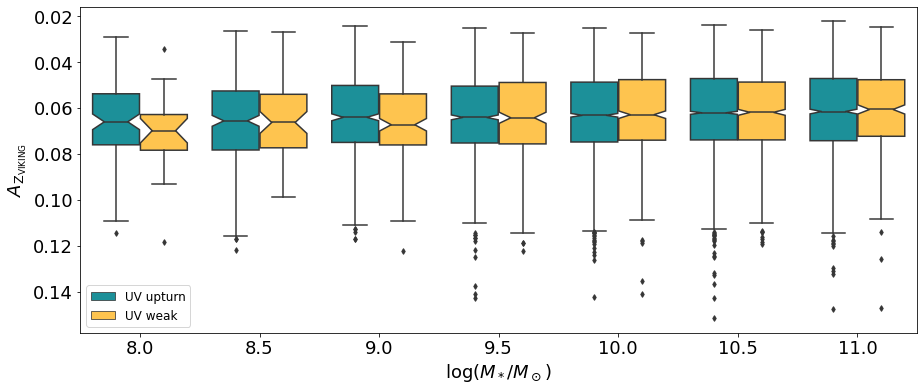

In [70]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='A_Z_VIKING', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{\mathrm{Z}_\mathrm{VIKING}}$')
plt.gca().invert_yaxis()
plt.show()

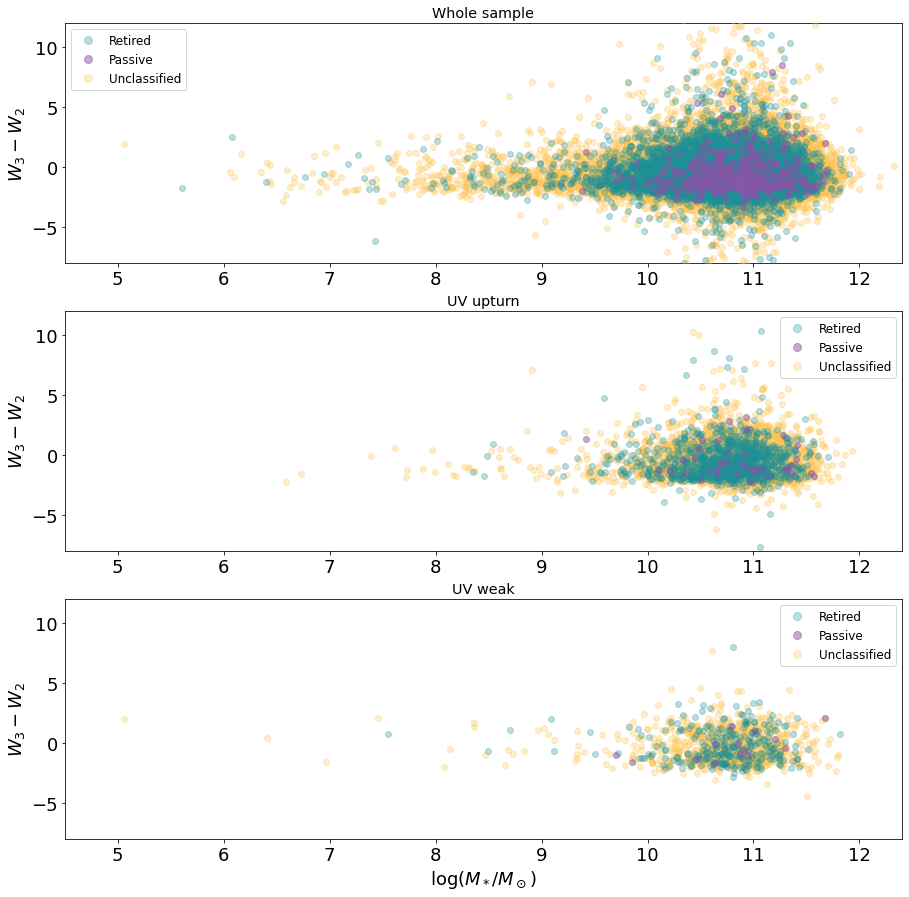

In [71]:
plt.rcParams.update(params3)
plt.subplot(3,1,1)
plt.plot(np.log10(retiredW['mass_stellar_best_fit']), retiredW['ABMagDFA_WISEW3']-retiredW['ABMagDFA_WISEW2'], 
         ls='', marker='o',  markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveW['mass_stellar_best_fit']), passiveW['ABMagDFA_WISEW3']-passiveW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedW['mass_stellar_best_fit']), 
         unclassifiedW['ABMagDFA_WISEW3']-unclassifiedW['ABMagDFA_WISEW2'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.4)
plt.ylim(-8,12)
plt.xlabel('')
plt.ylabel(r'$W_3-W_2$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

    
plt.subplot(3,1,2)
plt.plot(np.log10(UVup_retiredW['mass_stellar_best_fit']), 
         UVup_retiredW['ABMagDFA_WISEW3']-UVup_retiredW['ABMagDFA_WISEW2'], 
         ls='', marker='o',  markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passiveW['mass_stellar_best_fit']), 
         UVup_passiveW['ABMagDFA_WISEW3']-UVup_passiveW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassifiedW['mass_stellar_best_fit']), 
         UVup_unclassifiedW['ABMagDFA_WISEW3']-UVup_unclassifiedW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.4)
plt.ylim(-8,12)
plt.xlabel('')
plt.ylabel(r'$W_3-W_2$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
    
plt.subplot(3,1,3)
plt.plot(np.log10(UVweak_retiredW['mass_stellar_best_fit']), 
         UVweak_retiredW['ABMagDFA_WISEW3']-UVweak_retiredW['ABMagDFA_WISEW2'], 
         ls='', marker='o',  markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVweak_passiveW['mass_stellar_best_fit']), 
         UVweak_passiveW['ABMagDFA_WISEW3']-UVweak_passiveW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVweak_unclassifiedW['mass_stellar_best_fit']), 
         UVweak_unclassifiedW['ABMagDFA_WISEW3']-UVweak_unclassifiedW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.4)
plt.ylim(-8,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')
plt.title('UV weak')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

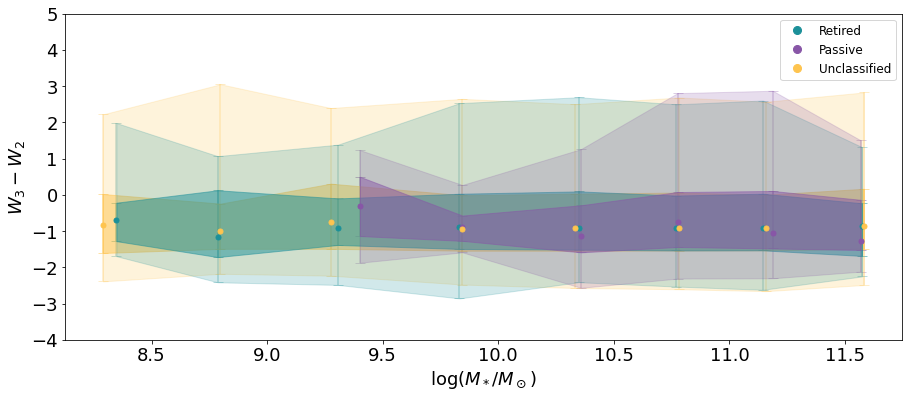

In [72]:
plt.rcParams.update(params2)
plt.plot(np.log10(massW_50r), W3W2_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massW_50p), W3W2_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massW_50u), W3W2_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massW_50r), W3W2_50r, 
             yerr=[np.array(W3W2_50r)-np.array(W3W2_025r), np.array(W3W2_975r)-np.array(W3W2_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massW_50r), W3W2_50r, 
             yerr=[np.array(W3W2_50r)-np.array(W3W2_25r), np.array(W3W2_75r)-np.array(W3W2_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massW_50r), W3W2_25r, W3W2_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massW_50r), W3W2_025r, W3W2_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massW_50p), W3W2_50p, 
             yerr=[np.array(W3W2_50p)-np.array(W3W2_025p), np.array(W3W2_975p)-np.array(W3W2_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massW_50p), W3W2_50p, 
             yerr=[np.array(W3W2_50p)-np.array(W3W2_25p), np.array(W3W2_75p)-np.array(W3W2_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massW_50p), W3W2_25p, W3W2_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massW_50p), W3W2_025p, W3W2_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massW_50u), W3W2_50u, 
             yerr=[np.array(W3W2_50u)-np.array(W3W2_025u), np.array(W3W2_975u)-np.array(W3W2_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massW_50u), W3W2_50u, 
             yerr=[np.array(W3W2_50u)-np.array(W3W2_25u), np.array(W3W2_75u)-np.array(W3W2_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massW_50u), W3W2_25u, W3W2_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massW_50u), W3W2_025u, W3W2_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-4,5])
plt.show()

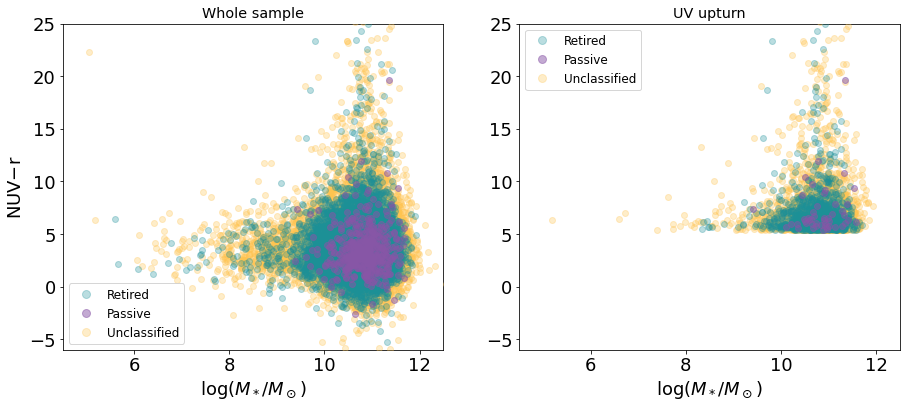

In [73]:
plt.subplot(1,2,1)
plt.plot(np.log10(retiredN['mass_stellar_best_fit']), retiredN['ABMagDFA_GALEXNUV']-retiredN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveN['mass_stellar_best_fit']), passiveN['ABMagDFA_GALEXNUV']-passiveN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedN['mass_stellar_best_fit']), 
         unclassifiedN['ABMagDFA_GALEXNUV']-unclassifiedN['ABMagDFA_SDSSr'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-6,25)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.subplot(1,2,2)
plt.plot(np.log10(UVup_retiredN['mass_stellar_best_fit']), 
         UVup_retiredN['ABMagDFA_GALEXNUV']-UVup_retiredN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passiveN['mass_stellar_best_fit']), 
         UVup_passiveN['ABMagDFA_GALEXNUV']-UVup_passiveN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassifiedN['mass_stellar_best_fit']), 
         UVup_unclassifiedN['ABMagDFA_GALEXNUV']-UVup_unclassifiedN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-6,25)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

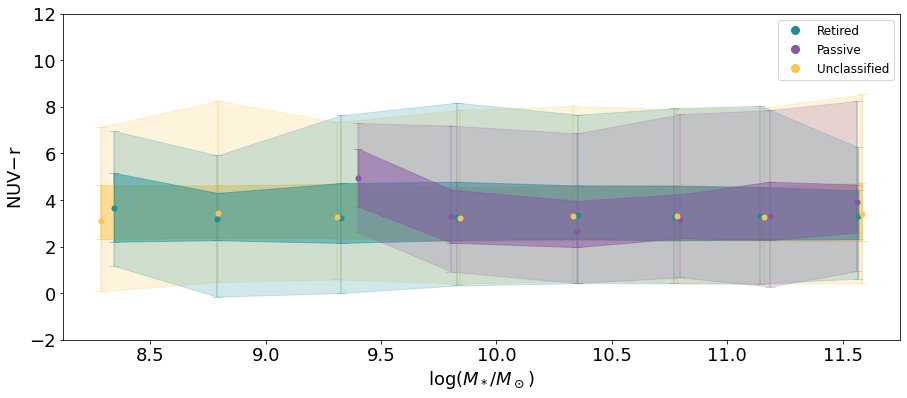

In [74]:
plt.plot(np.log10(massN_50r), NUVr_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massN_50p), NUVr_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massN_50u), NUVr_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massN_50r), NUVr_50r, 
             yerr=[np.array(NUVr_50r)-np.array(NUVr_025r), np.array(NUVr_975r)-np.array(NUVr_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massN_50r), NUVr_50r, 
             yerr=[np.array(NUVr_50r)-np.array(NUVr_25r), np.array(NUVr_75r)-np.array(NUVr_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massN_50r), NUVr_25r, NUVr_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massN_50r), NUVr_025r, NUVr_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massN_50p), NUVr_50p, 
             yerr=[np.array(NUVr_50p)-np.array(NUVr_025p), np.array(NUVr_975p)-np.array(NUVr_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massN_50p), NUVr_50p, 
             yerr=[np.array(NUVr_50p)-np.array(NUVr_25p), np.array(NUVr_75p)-np.array(NUVr_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massN_50p), NUVr_25p, NUVr_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massN_50p), NUVr_025p, NUVr_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massN_50u), NUVr_50u, 
             yerr=[np.array(NUVr_50u)-np.array(NUVr_025u), np.array(NUVr_975u)-np.array(NUVr_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massN_50u), NUVr_50u, 
             yerr=[np.array(NUVr_50u)-np.array(NUVr_25u), np.array(NUVr_75u)-np.array(NUVr_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massN_50u), NUVr_25u, NUVr_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massN_50u), NUVr_025u, NUVr_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-2,12])
plt.show()

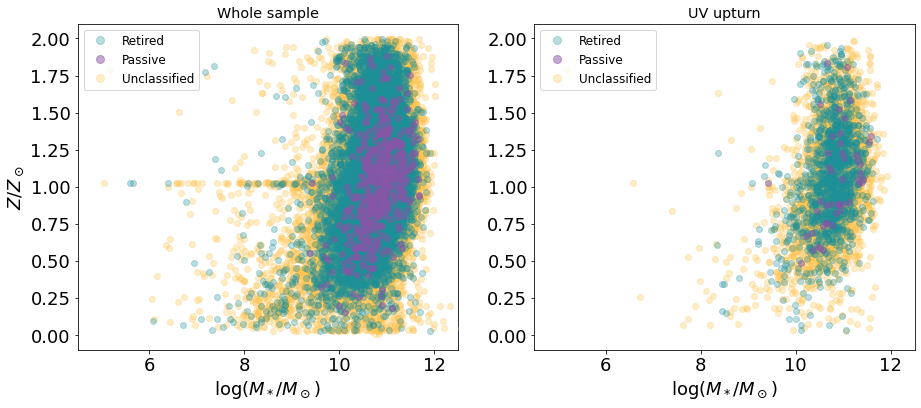

In [75]:
plt.subplot(1,2,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['metalicity_Z_Zo_percentile50'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-0.1,2.1)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(1,2,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), UVup_retired['metalicity_Z_Zo_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), UVup_passive['metalicity_Z_Zo_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), UVup_unclassified['metalicity_Z_Zo_percentile50'], 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-0.1,2.1)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

# This plot is important

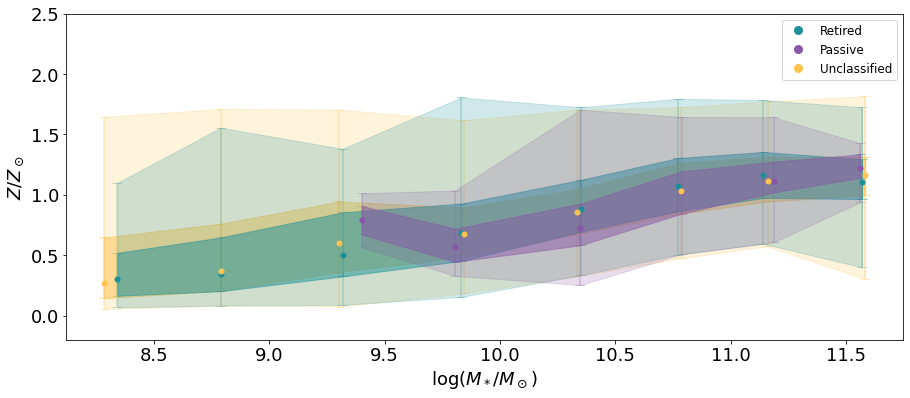

In [76]:
plt.plot(np.log10(mass_50r), Z_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), Z_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), Z_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), Z_50r, 
             yerr=[np.array(Z_50r)-np.array(Z_025r), np.array(Z_975r)-np.array(Z_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), Z_50r, 
             yerr=[np.array(Z_50r)-np.array(Z_25r), np.array(Z_75r)-np.array(Z_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), Z_25r, Z_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), Z_025r, Z_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), Z_50p, 
             yerr=[np.array(Z_50p)-np.array(Z_025p), np.array(Z_975p)-np.array(Z_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), Z_50p, 
             yerr=[np.array(Z_50p)-np.array(Z_25p), np.array(Z_75p)-np.array(Z_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), Z_25p, Z_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), Z_025p, Z_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), Z_50u, 
             yerr=[np.array(Z_50u)-np.array(Z_025u), np.array(Z_975u)-np.array(Z_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), Z_50u, 
             yerr=[np.array(Z_50u)-np.array(Z_25u), np.array(Z_75u)-np.array(Z_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), Z_25u, Z_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), Z_025u, Z_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-0.2,2.5])
plt.show()

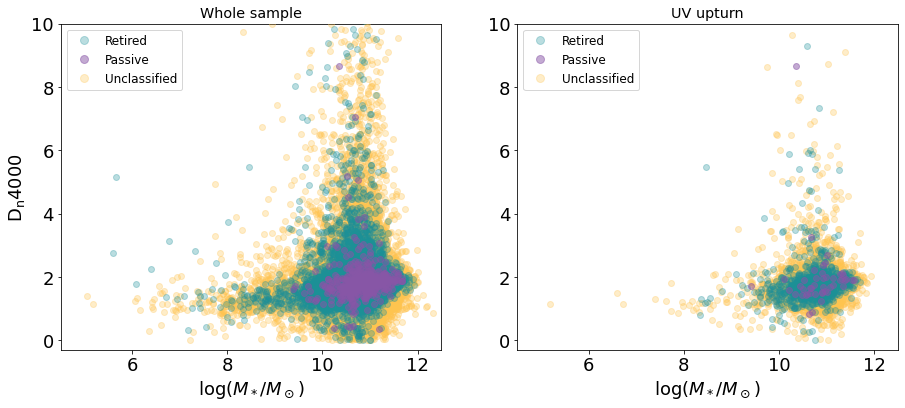

In [77]:
plt.subplot(1,2,1)
plt.plot(np.log10(retiredD['mass_stellar_best_fit']), retiredD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveD['mass_stellar_best_fit']), passiveD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedD['mass_stellar_best_fit']), unclassifiedD['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-0.3, 10)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.subplot(1,2,2)
plt.plot(np.log10(UVup_retiredD['mass_stellar_best_fit']), UVup_retiredD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passiveD['mass_stellar_best_fit']), UVup_passiveD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassifiedD['mass_stellar_best_fit']), UVup_unclassifiedD['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(4.5,12.5)
plt.ylim(-0.3, 10)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

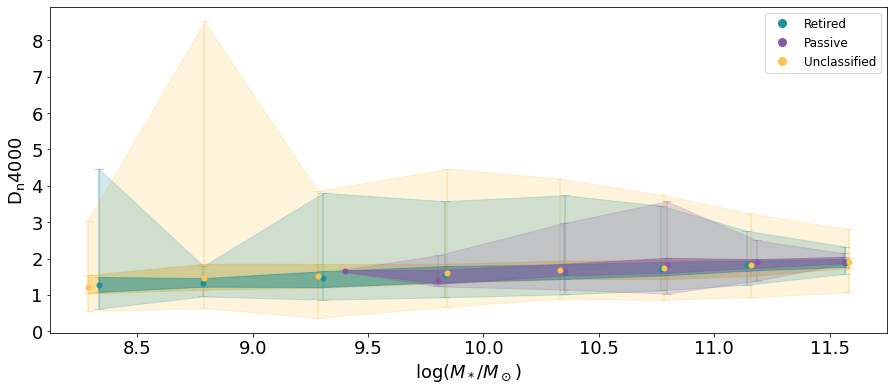

In [78]:
plt.plot(np.log10(massD_50r), Dn4000_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massD_50p), Dn4000_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massD_50u), Dn4000_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massD_50r), Dn4000_50r, 
             yerr=[np.array(Dn4000_50r)-np.array(Dn4000_025r), np.array(Dn4000_975r)-np.array(Dn4000_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massD_50r), Dn4000_50r, 
             yerr=[np.array(Dn4000_50r)-np.array(Dn4000_25r), np.array(Dn4000_75r)-np.array(Dn4000_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massD_50r), Dn4000_25r, Dn4000_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massD_50r), Dn4000_025r, Dn4000_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massD_50p), Dn4000_50p, 
             yerr=[np.array(Dn4000_50p)-np.array(Dn4000_025p), np.array(Dn4000_975p)-np.array(Dn4000_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massD_50p), Dn4000_50p, 
             yerr=[np.array(Dn4000_50p)-np.array(Dn4000_25p), np.array(Dn4000_75p)-np.array(Dn4000_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massD_50p), Dn4000_25p, Dn4000_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massD_50p), Dn4000_025p, Dn4000_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massD_50u), Dn4000_50u, 
             yerr=[np.array(Dn4000_50u)-np.array(Dn4000_025u), np.array(Dn4000_975u)-np.array(Dn4000_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massD_50u), Dn4000_50u, 
             yerr=[np.array(Dn4000_50u)-np.array(Dn4000_25u), np.array(Dn4000_75u)-np.array(Dn4000_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massD_50u), Dn4000_25u, Dn4000_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massD_50u), Dn4000_025u, Dn4000_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
#plt.ylim([-0.2,2.5])
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


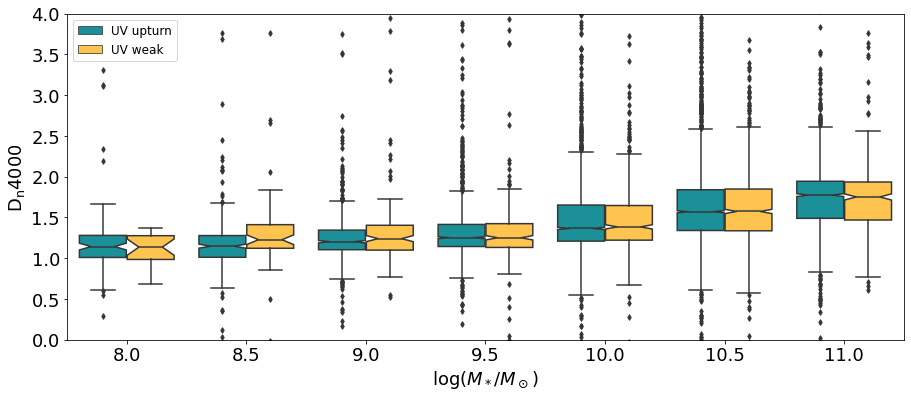

In [79]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='D4000N', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.ylim(0,4)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.show()

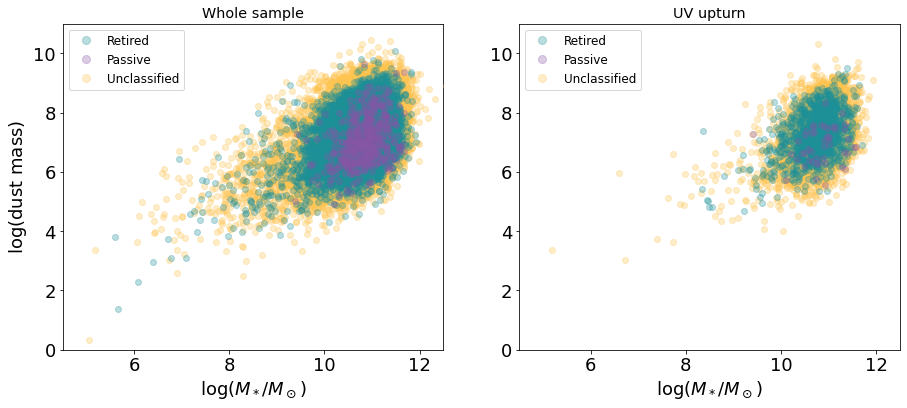

In [80]:
plt.subplot(1,2,1)
plt.plot(np.log10(retired['mass_stellar_best_fit']), np.log10(retired['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), np.log10(passive['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.3, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), np.log10(unclassified['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log$(dust mass)')
plt.xlim(4.5, 12.5)
plt.ylim(0,11)
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(1,2,2)
plt.plot(np.log10(UVup_retired['mass_stellar_best_fit']), np.log10(UVup_retired['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passive['mass_stellar_best_fit']), np.log10(UVup_passive['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.3, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassified['mass_stellar_best_fit']), np.log10(UVup_unclassified['mass_dust_best_fit']), 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.xlim(4.5, 12.5)
plt.ylim(0,11)
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

# This plot is important

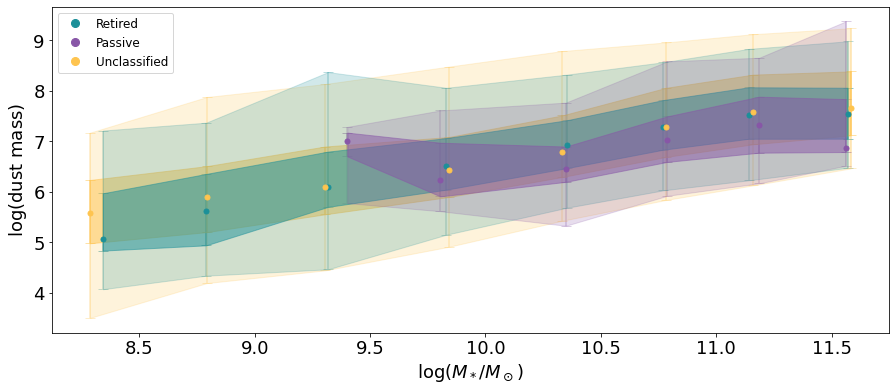

In [81]:
plt.plot(np.log10(mass_50r), np.log10(dust_50r), ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), np.log10(dust_50p), ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), np.log10(dust_50u), ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), np.log10(dust_50r), 
             yerr=[np.log10(np.array(dust_50r))-np.log10(np.array(dust_025r)), np.log10(np.array(dust_975r))-np.log10(np.array(dust_50r))], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), np.log10(dust_50r), 
             yerr=[np.log10(np.array(dust_50r))-np.log10(np.array(dust_25r)), np.log10(np.array(dust_75r))-np.log10(np.array(dust_50r))], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), np.log10(dust_25r), np.log10(dust_75r), color=palette[1], alpha=0.5, 
                 zorder=10)
plt.fill_between(np.log10(mass_50r), np.log10(dust_025r), np.log10(dust_975r), color=palette[1], alpha=0.2, 
                 zorder=10)

plt.errorbar(np.log10(mass_50p), np.log10(dust_50p), 
             yerr=[np.log10(np.array(dust_50p))-np.log10(np.array(dust_025p)), np.log10(np.array(dust_975p))-np.log10(np.array(dust_50p))], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), np.log10(dust_50p), 
             yerr=[np.log10(np.array(dust_50p))-np.log10(np.array(dust_25p)), np.log10(np.array(dust_75p))-np.log10(np.array(dust_50p))], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), np.log10(dust_25p), np.log10(dust_75p), color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), np.log10(dust_025p), np.log10(dust_975p), color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), np.log10(dust_50u), 
             yerr=[np.log10(np.array(dust_50u))-np.log10(np.array(dust_025u)), np.log10(np.array(dust_975u))-np.log10(np.array(dust_50u))], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), np.log10(dust_50u), 
             yerr=[np.log10(np.array(dust_50u))-np.log10(np.array(dust_25u)), np.log10(np.array(dust_75u))-np.log10(np.array(dust_50u))], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), np.log10(dust_25u), np.log10(dust_75u), color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), np.log10(dust_025u), np.log10(dust_975u), color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log$(dust mass)')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/klavdia/.local/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


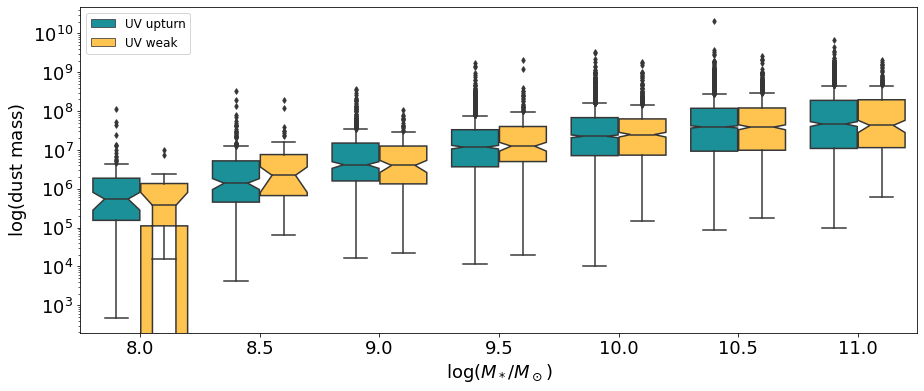

In [82]:
bins = np.arange(8, 12., 0.5)

mass_cut = pd.cut(np.log10(classified_dataset_UV['mass_stellar_best_fit']), bins = bins, labels=list(bins[0:-1]))

sns.boxplot(x=mass_cut, y='mass_dust_best_fit', hue='UV classification', notch=True, palette=palette_darker[1:3], 
            data=classified_dataset_UV, fliersize=4, saturation=1.)

plt.legend(loc='best')

plt.yscale('log')
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log$(dust mass)')
plt.show()

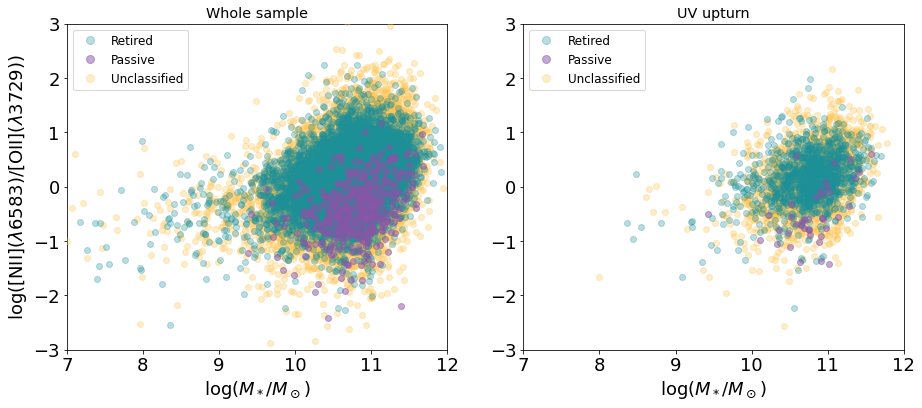

In [83]:
plt.subplot(1,2,1)
plt.plot(np.log10(retired_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(retired_NIIR_OIIR['NIIR_FLUX']/retired_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(passive_NIIR_OIIR['NIIR_FLUX']/passive_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(unclassified_NIIR_OIIR['NIIR_FLUX']/unclassified_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(7, 12)
plt.ylim(-3,3)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log([\mathrm{NII}](\lambda 6583)/[\mathrm{OII}](\lambda 3729))$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(1,2,2)
plt.plot(np.log10(UVup_retired_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(UVup_retired_NIIR_OIIR['NIIR_FLUX']/UVup_retired_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(UVup_passive_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(UVup_passive_NIIR_OIIR['NIIR_FLUX']/UVup_passive_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(UVup_unclassified_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(UVup_unclassified_NIIR_OIIR['NIIR_FLUX']/UVup_unclassified_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(7, 12)
plt.ylim(-3,3)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

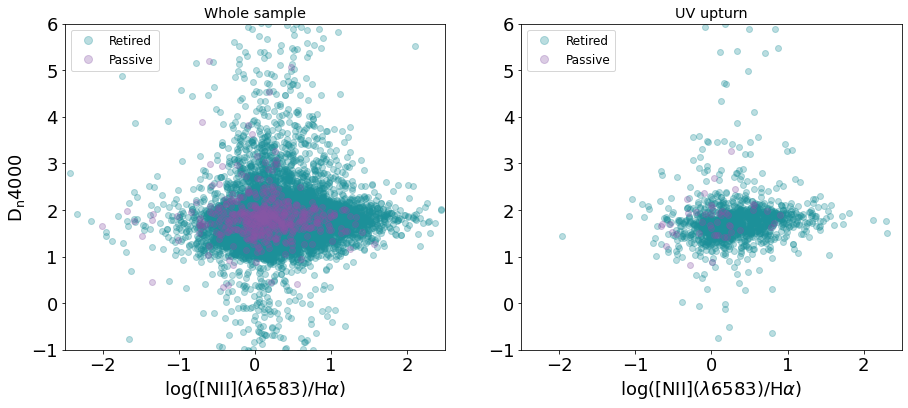

In [84]:
plt.subplot(1,2,1)
plt.plot(np.log10(NIIR_Ha_retired['NIIR_FLUX']/NIIR_Ha_retired['HA_FLUX']), NIIR_Ha_retired['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired')
plt.plot(np.log10(NIIR_Ha_passive['NIIR_FLUX']/NIIR_Ha_passive['HA_FLUX']), NIIR_Ha_passive['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[0], alpha=0.3, label='Passive')

plt.xlim(-2.5, 2.5)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(1,2,2)
plt.plot(np.log10(UVup_NIIR_Ha_retired['NIIR_FLUX']/UVup_NIIR_Ha_retired['HA_FLUX']), 
         UVup_NIIR_Ha_retired['D4000N'], ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, 
         label='Retired')
plt.plot(np.log10(UVup_NIIR_Ha_passive['NIIR_FLUX']/UVup_NIIR_Ha_passive['HA_FLUX']), 
         UVup_NIIR_Ha_passive['D4000N'], ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.3, 
         label='Passive')

plt.xlim(-2.5, 2.5)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

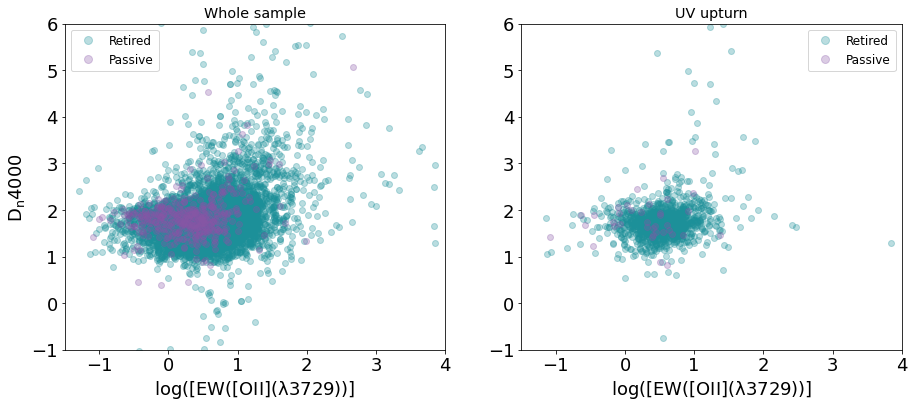

In [85]:
plt.subplot(1,2,1)
plt.plot(np.log10(EW_OII_retired['OIIR_EW']), EW_OII_retired['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired')
plt.plot(np.log10(EW_OII_passive['OIIR_EW']), EW_OII_passive['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.3, label='Passive')

plt.xlim(-1.5,4)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{EW([OII](\lambda 3729))}]$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.title('Whole sample')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.subplot(1,2,2)
plt.plot(np.log10(UVup_EW_OII_retired['OIIR_EW']), UVup_EW_OII_retired['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired')
plt.plot(np.log10(UVup_EW_OII_passive['OIIR_EW']), UVup_EW_OII_passive['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.3, label='Passive')

plt.xlim(-1.5,4)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{EW([OII](\lambda 3729))}]$')
plt.title('UV upturn')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

# Histograms/kdeplots

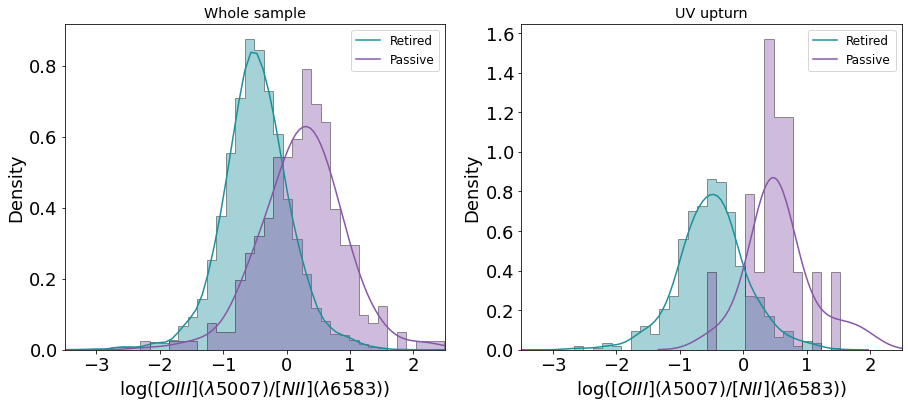

In [86]:
plt.subplot(1,2,1)
xr = OIIIR_NIIR_retired['OIIIR_FLUX']/OIIIR_NIIR_retired['NIIR_FLUX']
xp = OIIIR_NIIR_passive['OIIIR_FLUX']/OIIIR_NIIR_passive['NIIR_FLUX']

#bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)
bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIIR_NIIR_retired['OIIIR_FLUX']/UVup_OIIIR_NIIR_retired['NIIR_FLUX']
xp = UVup_OIIIR_NIIR_passive['OIIIR_FLUX']/UVup_OIIIR_NIIR_passive['NIIR_FLUX']

#bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)
bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

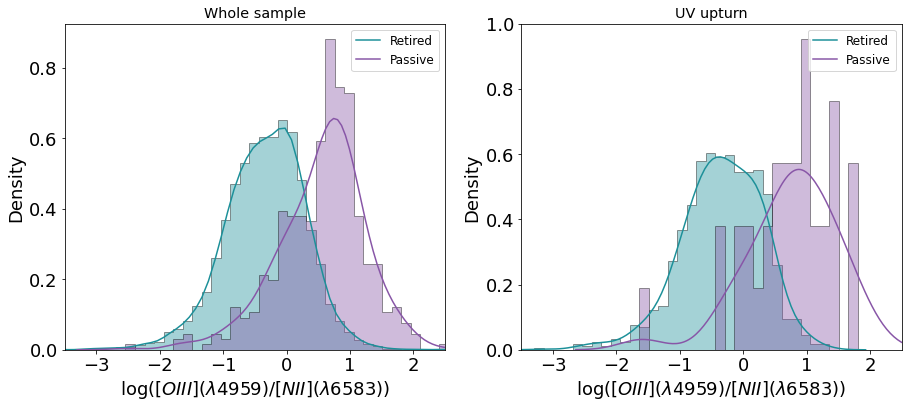

In [87]:
plt.subplot(1,2,1)
xr = OIIIB_NIIR_retired['OIIIB_FLUX']/OIIIB_NIIR_retired['NIIR_FLUX']
xp = OIIIB_NIIR_passive['OIIIB_FLUX']/OIIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIIB_NIIR_retired['OIIIB_FLUX']/UVup_OIIIB_NIIR_retired['NIIR_FLUX']
xp = UVup_OIIIB_NIIR_passive['OIIIB_FLUX']/UVup_OIIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

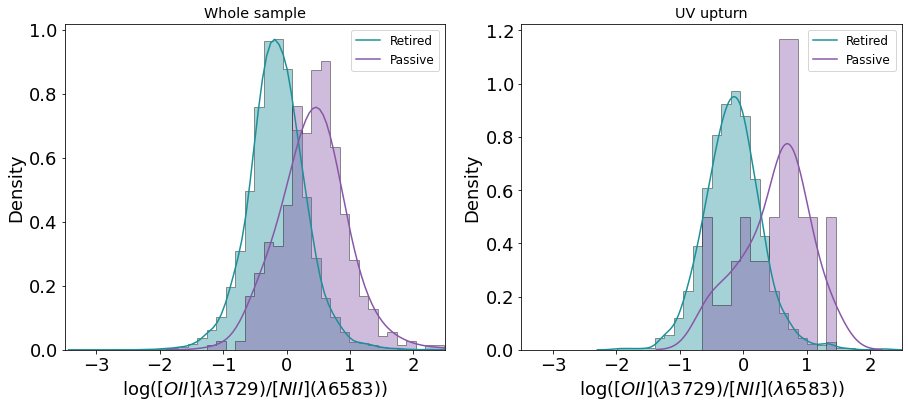

In [88]:
plt.subplot(1,2,1)
xr = OIIR_NIIR_retired['OIIR_FLUX']/OIIR_NIIR_retired['NIIR_FLUX']
xp = OIIR_NIIR_passive['OIIR_FLUX']/OIIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIR_NIIR_retired['OIIR_FLUX']/UVup_OIIR_NIIR_retired['NIIR_FLUX']
xp = UVup_OIIR_NIIR_passive['OIIR_FLUX']/UVup_OIIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

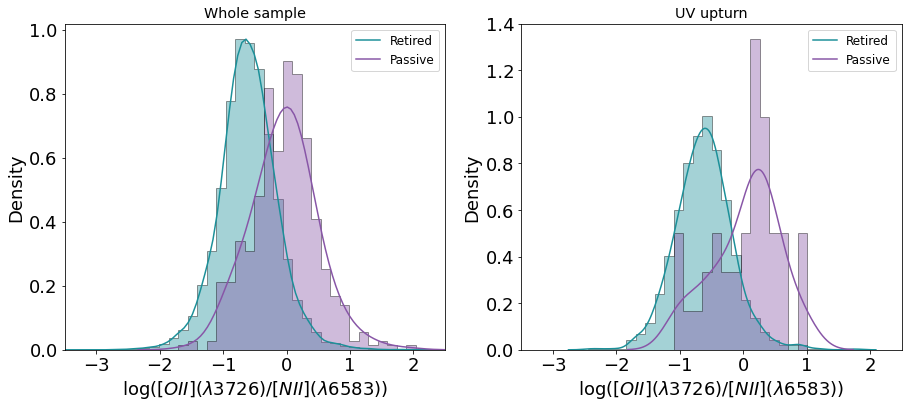

In [89]:
plt.subplot(1,2,1)
xr = OIIB_NIIR_retired['OIIB_FLUX']/OIIB_NIIR_retired['NIIR_FLUX']
xp = OIIB_NIIR_passive['OIIB_FLUX']/OIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIB_NIIR_retired['OIIB_FLUX']/UVup_OIIB_NIIR_retired['NIIR_FLUX']
xp = UVup_OIIB_NIIR_passive['OIIB_FLUX']/UVup_OIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

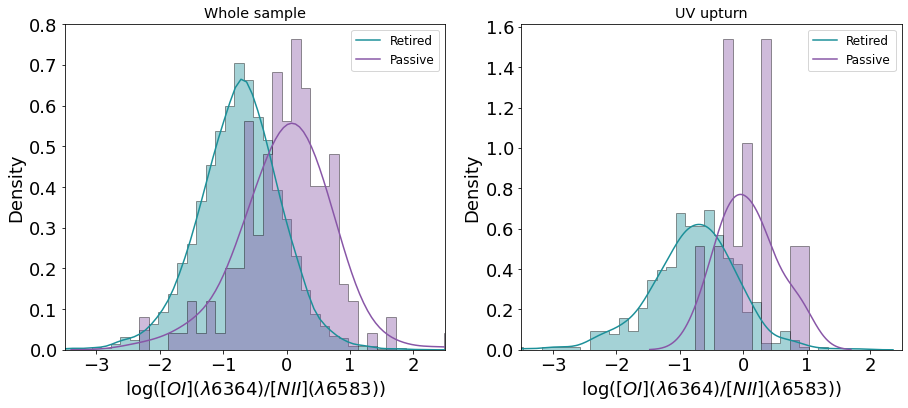

In [90]:
plt.subplot(1,2,1)
xr = OIR_NIIR_retired['OIR_FLUX']/OIR_NIIR_retired['NIIR_FLUX']
xp = OIR_NIIR_passive['OIR_FLUX']/OIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIR_NIIR_retired['OIR_FLUX']/UVup_OIR_NIIR_retired['NIIR_FLUX']
xp = UVup_OIR_NIIR_passive['OIR_FLUX']/UVup_OIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

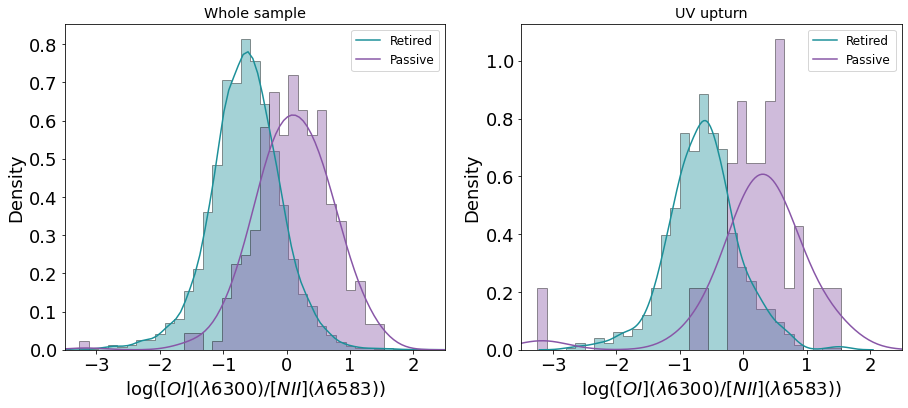

In [91]:
plt.subplot(1,2,1)
xr = OIB_NIIR_retired['OIB_FLUX']/OIB_NIIR_retired['NIIR_FLUX']
xp = OIB_NIIR_passive['OIB_FLUX']/OIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIB_NIIR_retired['OIB_FLUX']/UVup_OIB_NIIR_retired['NIIR_FLUX']
xp = UVup_OIB_NIIR_passive['OIB_FLUX']/UVup_OIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

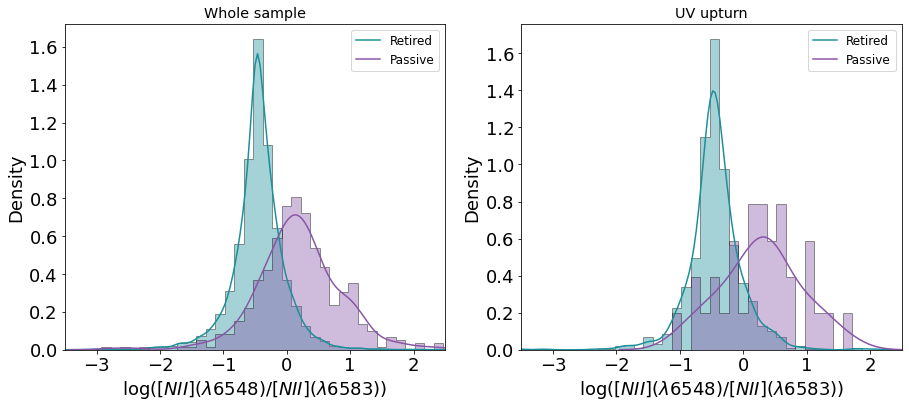

In [92]:
plt.subplot(1,2,1)
xr = NIIB_NIIR_retired['NIIB_FLUX']/NIIB_NIIR_retired['NIIR_FLUX']
xp = NIIB_NIIR_passive['NIIB_FLUX']/NIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_NIIB_NIIR_retired['NIIB_FLUX']/UVup_NIIB_NIIR_retired['NIIR_FLUX']
xp = UVup_NIIB_NIIR_passive['NIIB_FLUX']/UVup_NIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

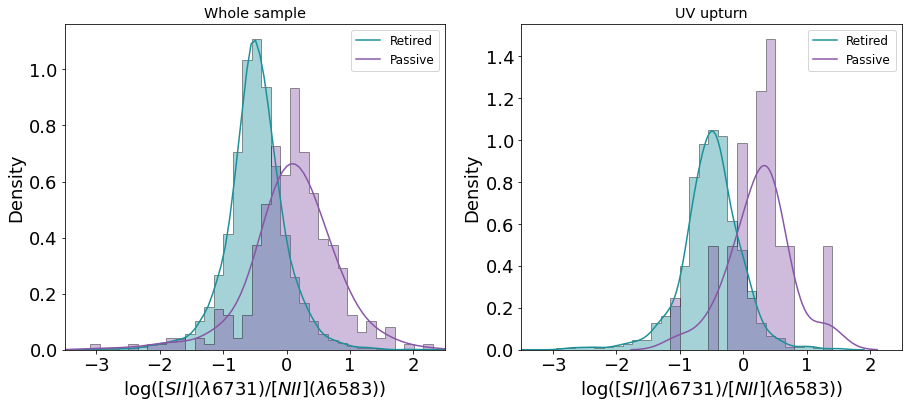

In [93]:
plt.subplot(1,2,1)
xr = SIIR_NIIR_retired['SIIR_FLUX']/SIIR_NIIR_retired['NIIR_FLUX']
xp = SIIR_NIIR_passive['SIIR_FLUX']/SIIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6731)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_SIIR_NIIR_retired['SIIR_FLUX']/UVup_SIIR_NIIR_retired['NIIR_FLUX']
xp = UVup_SIIR_NIIR_passive['SIIR_FLUX']/UVup_SIIR_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6731)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

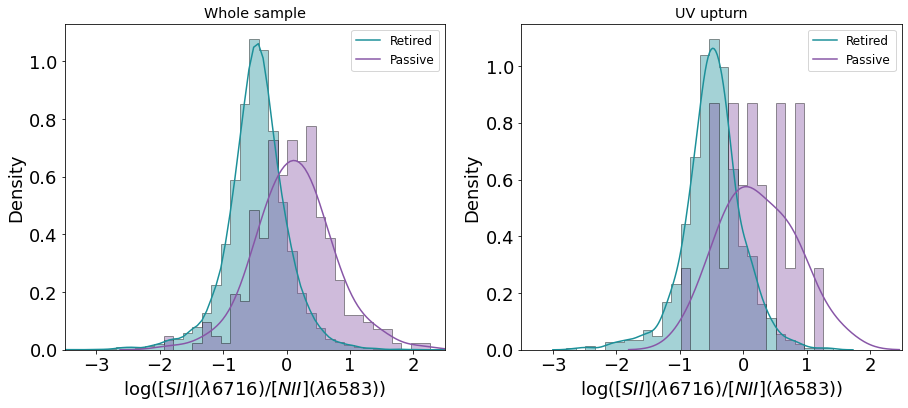

In [94]:
plt.subplot(1,2,1)
xr = SIIB_NIIR_retired['SIIB_FLUX']/SIIB_NIIR_retired['NIIR_FLUX']
xp = SIIB_NIIR_passive['SIIB_FLUX']/SIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6716)/[NII](\lambda 6583))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_SIIB_NIIR_retired['SIIB_FLUX']/UVup_SIIB_NIIR_retired['NIIR_FLUX']
xp = UVup_SIIB_NIIR_passive['SIIB_FLUX']/UVup_SIIB_NIIR_passive['NIIR_FLUX']

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6716)/[NII](\lambda 6583))$')
plt.title('UV upturn')
plt.legend()

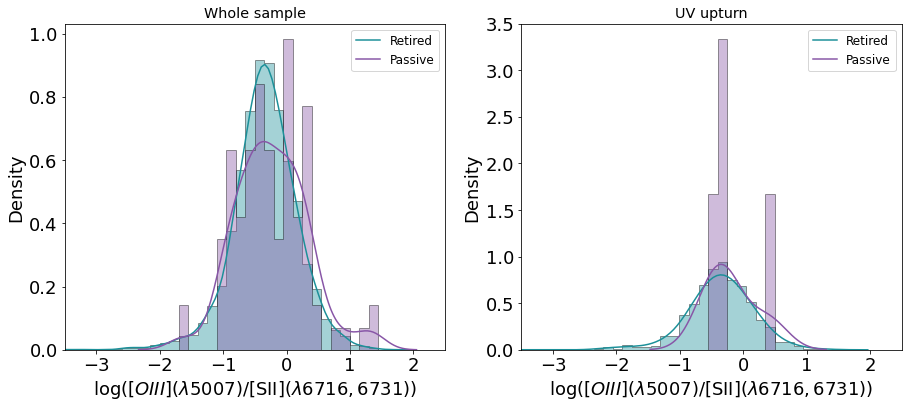

In [95]:
plt.subplot(1,2,1)
xr = OIIIR_SII_retired['OIIIR_FLUX']/(OIIIR_SII_retired['SIIR_FLUX']+OIIIR_SII_retired['SIIB_FLUX'])
xp = OIIIR_SII_passive['OIIIR_FLUX']/(OIIIR_SII_passive['SIIR_FLUX']+OIIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIIR_SII_retired['OIIIR_FLUX']/(UVup_OIIIR_SII_retired['SIIR_FLUX']+UVup_OIIIR_SII_retired['SIIB_FLUX'])
xp = UVup_OIIIR_SII_passive['OIIIR_FLUX']/(UVup_OIIIR_SII_passive['SIIR_FLUX']+UVup_OIIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

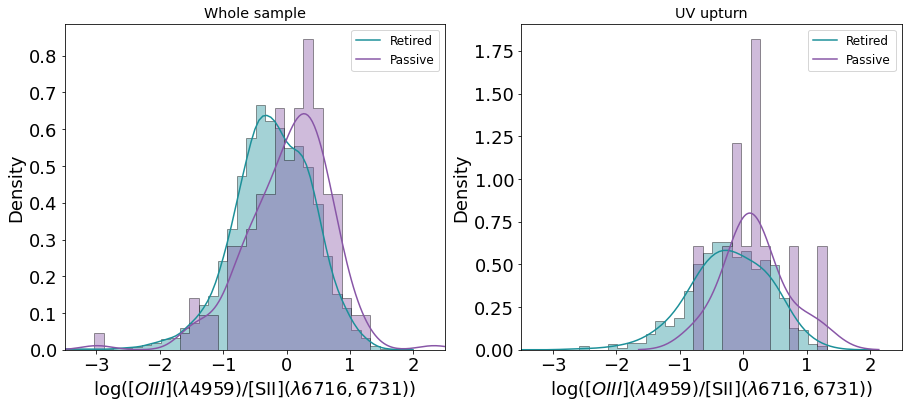

In [96]:
plt.subplot(1,2,1)
xr = OIIIB_SII_retired['OIIIB_FLUX']/(OIIIB_SII_retired['SIIR_FLUX']+OIIIB_SII_retired['SIIB_FLUX'])
xp = OIIIB_SII_passive['OIIIB_FLUX']/(OIIIB_SII_passive['SIIR_FLUX']+OIIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIIB_SII_retired['OIIIB_FLUX']/(UVup_OIIIB_SII_retired['SIIR_FLUX']+UVup_OIIIB_SII_retired['SIIB_FLUX'])
xp = UVup_OIIIB_SII_passive['OIIIB_FLUX']/(UVup_OIIIB_SII_passive['SIIR_FLUX']+UVup_OIIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

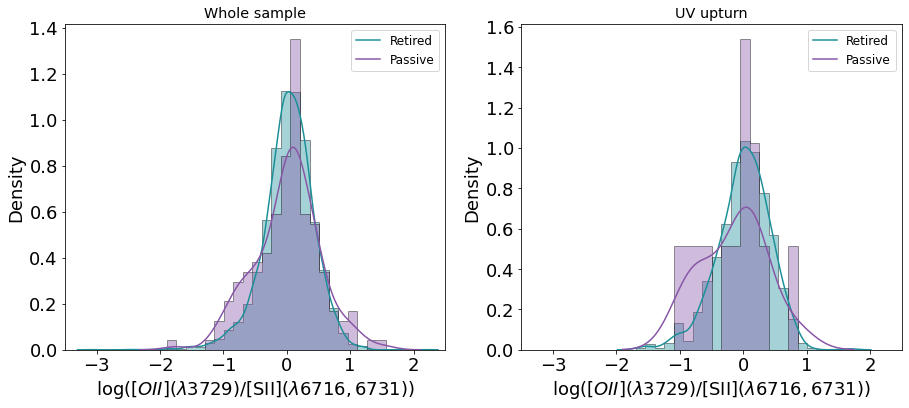

In [97]:
plt.subplot(1,2,1)
xr = OIIR_SII_retired['OIIR_FLUX']/(OIIR_SII_retired['SIIR_FLUX']+OIIR_SII_retired['SIIB_FLUX'])
xp = OIIR_SII_passive['OIIR_FLUX']/(OIIR_SII_passive['SIIR_FLUX']+OIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIR_SII_retired['OIIR_FLUX']/(UVup_OIIR_SII_retired['SIIR_FLUX']+UVup_OIIR_SII_retired['SIIB_FLUX'])
xp = UVup_OIIR_SII_passive['OIIR_FLUX']/(UVup_OIIR_SII_passive['SIIR_FLUX']+UVup_OIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

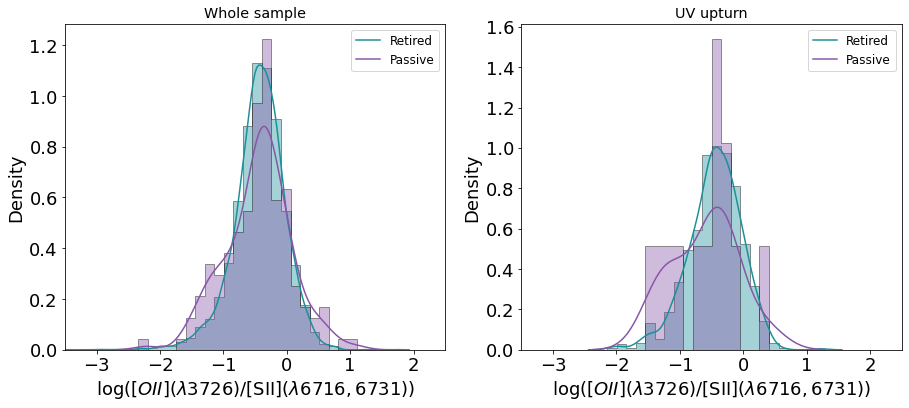

In [98]:
plt.subplot(1,2,1)
xr = OIIB_SII_retired['OIIB_FLUX']/(OIIB_SII_retired['SIIR_FLUX']+OIIB_SII_retired['SIIB_FLUX'])
xp = OIIB_SII_passive['OIIB_FLUX']/(OIIB_SII_passive['SIIR_FLUX']+OIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIIB_SII_retired['OIIB_FLUX']/(UVup_OIIB_SII_retired['SIIR_FLUX']+UVup_OIIB_SII_retired['SIIB_FLUX'])
xp = UVup_OIIB_SII_passive['OIIB_FLUX']/(UVup_OIIB_SII_passive['SIIR_FLUX']+UVup_OIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

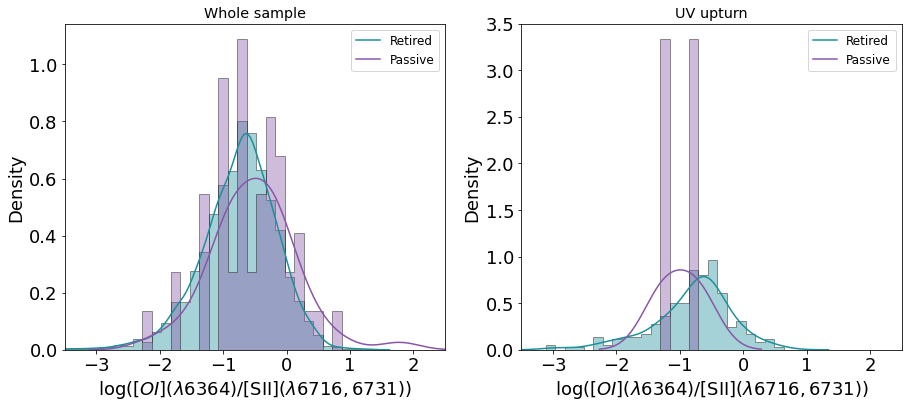

In [99]:
plt.subplot(1,2,1)
xr = OIR_SII_retired['OIR_FLUX']/(OIR_SII_retired['SIIR_FLUX']+OIR_SII_retired['SIIB_FLUX'])
xp = OIR_SII_passive['OIR_FLUX']/(OIR_SII_passive['SIIR_FLUX']+OIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIR_SII_retired['OIR_FLUX']/(UVup_OIR_SII_retired['SIIR_FLUX']+UVup_OIR_SII_retired['SIIB_FLUX'])
xp = UVup_OIR_SII_passive['OIR_FLUX']/(UVup_OIR_SII_passive['SIIR_FLUX']+UVup_OIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

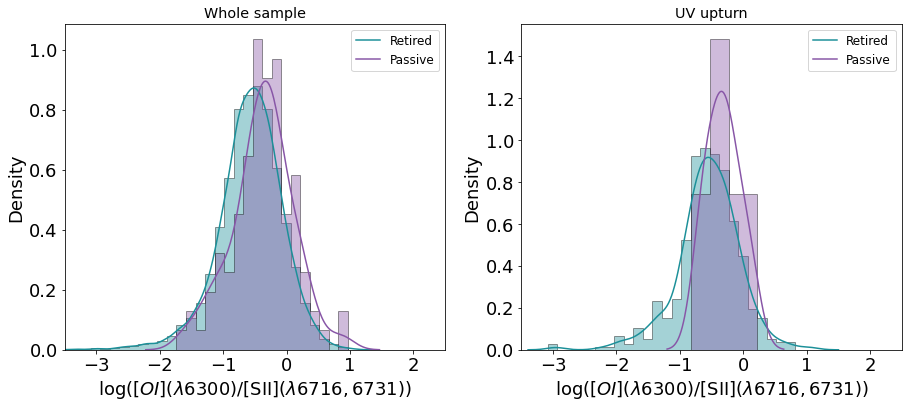

In [100]:
plt.subplot(1,2,1)
xr = OIB_SII_retired['OIB_FLUX']/(OIB_SII_retired['SIIR_FLUX']+OIB_SII_retired['SIIB_FLUX'])
xp = OIB_SII_passive['OIB_FLUX']/(OIB_SII_passive['SIIR_FLUX']+OIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_OIB_SII_retired['OIB_FLUX']/(UVup_OIB_SII_retired['SIIR_FLUX']+UVup_OIB_SII_retired['SIIB_FLUX'])
xp = UVup_OIB_SII_passive['OIB_FLUX']/(UVup_OIB_SII_passive['SIIR_FLUX']+UVup_OIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

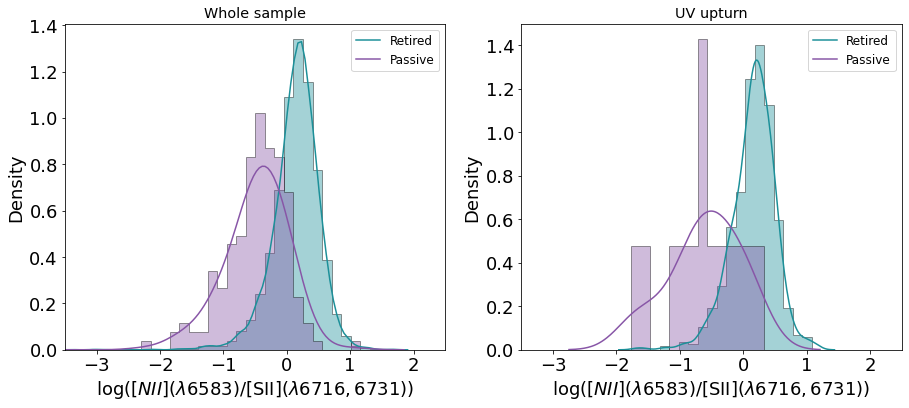

In [101]:
plt.subplot(1,2,1)
xr = NIIR_SII_retired['NIIR_FLUX']/(NIIR_SII_retired['SIIR_FLUX']+NIIR_SII_retired['SIIB_FLUX'])
xp = NIIR_SII_passive['NIIR_FLUX']/(NIIR_SII_passive['SIIR_FLUX']+NIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6583)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_NIIR_SII_retired['NIIR_FLUX']/(UVup_NIIR_SII_retired['SIIR_FLUX']+UVup_NIIR_SII_retired['SIIB_FLUX'])
xp = UVup_NIIR_SII_passive['NIIR_FLUX']/(UVup_NIIR_SII_passive['SIIR_FLUX']+UVup_NIIR_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6583)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()

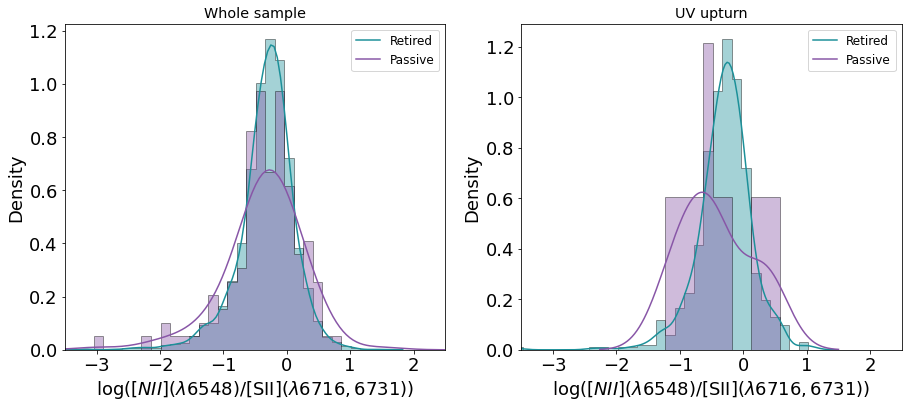

In [102]:
plt.subplot(1,2,1)
xr = NIIB_SII_retired['NIIB_FLUX']/(NIIB_SII_retired['SIIR_FLUX']+NIIB_SII_retired['SIIB_FLUX'])
xp = NIIB_SII_passive['NIIB_FLUX']/(NIIB_SII_passive['SIIR_FLUX']+NIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('Whole sample')
plt.legend()

plt.subplot(1,2,2)
xr = UVup_NIIB_SII_retired['NIIB_FLUX']/(UVup_NIIB_SII_retired['SIIR_FLUX']+UVup_NIIB_SII_retired['SIIB_FLUX'])
xp = UVup_NIIB_SII_passive['NIIB_FLUX']/(UVup_NIIB_SII_passive['SIIR_FLUX']+UVup_NIIB_SII_passive['SIIB_FLUX'])

bins = np.arange(min(min(np.log(xr)),min(np.log(xp))), max(max(np.log10(xr)),max(np.log10(xp))), 0.15)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')


n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.title('UV upturn')
plt.legend()